In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter
import random
%matplotlib inline
import os
os.chdir(r"C:\\Users\2112161\\OneDrive - Cognizant\Desktop\\DATA\\New folder\\scripsts python")
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,SVR
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostRegressor,AdaBoostClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from xgboost import XGBClassifier,XGBRegressor,XGBRFClassifier,XGBRFRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,mean_absolute_error,mean_squared_error,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans


NUMPY link https://www.youtube.com/watch?v=eiBFzfEhcdw

In [5]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ids = test["PassengerId"]

def clean(data):
    data = data.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)
    
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
        
    data.Embarked.fillna("U", inplace=True)
    return data

data = clean(data)
test = clean(test)

KeyError: 'PassengerId'

In [52]:
#!pip install mlxtend after this only able to instal decision boundaries

In [97]:
#pip install xgboost

In [10]:
#numpy array take list,sets and tuples as input
# a=[1,2,3],b=[1,2,3] c=a+b wont give 2,4,6 cuz in list + means concat so to add use numpy
a=np.array([[[1,2,3,4,5,6,7,8,9]]]).reshape(3,3)
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [13]:
np.ndim(a)

2

In [15]:
b=a.reshape(3,1,3)
b

array([[[1, 2, 3]],

       [[4, 5, 6]],

       [[7, 8, 9]]])

In [16]:
np.ndim(b)

3

In [18]:
np.ndim(np.array([[[[1,2,3,4,5,6,7,8,9]]]]))#4d array

4

In [19]:
np.shape(np.array([[[[1,2,3,4,5,6,7,8,9]]]]))#4d array

(1, 1, 1, 9)

In [26]:
np.shape(np.array([[1,2,3,4,5],[5,6,7,8,9]]))#2d array so if u use two or more list in array all shud have same # of elements

(2, 5)

In [2]:
x=np.array([1,2,3,4,5])
y=np.array([[1,2,3,4,5],[1,2,3,4,5]])
z=np.array([[[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]]])


In [31]:
x+y+z#this wont work due to diff dim

ValueError: operands could not be broadcast together with shapes (2,5) (1,3,5) 

In [52]:
z.size

15

In [53]:
print(len(x))#outpt is 5 cuz 5 element in 1d array but for more tha n1d array logic diff
print(len(y))#ouput is 2 cuz logic len(3darray)=no of (3-1)d array so y has two 2da array so 2
print(len(z))

5
2
1


In [5]:
print(np.shape(x))
print(np.shape(y))
print(np.shape(z))
#note in output 1st al is same as leng 5,2,1 as above 2nd val tel no of element shape of 1st val
#eg (1,3,5) tel there is 3d array(due to 3 values) which has one 2d array of dim 3 rows and 5 cols
# (2,5) tel its 2 d array with 2 rows and 5 cols or two 1d arrays and each array 5 elements

(5,)
(2, 5)
(1, 3, 5)


In [9]:
#to generate random arrays
np.random.randint(1,10,10)#for 1d

array([7, 4, 4, 9, 8, 6, 9, 1, 6, 1])

In [12]:
np.random.randint(1,10,(3,2))#for 2d

array([[5, 8],
       [4, 2],
       [9, 8]])

In [13]:
np.random.randint(1,10,(3,2,3))#for 3d

array([[[4, 5, 2],
        [2, 1, 9]],

       [[1, 7, 3],
        [6, 2, 6]],

       [[3, 9, 5],
        [6, 3, 3]]])

In [14]:
np.random.randint(100)#jus gives a single random from 1-99

60

In [18]:
# np.random.seed() THIS IS used inorde to get same random output every time bsee below

In [24]:
np.random.randint(100)#this without random seed

93

In [28]:
np.random.seed(11)#the arg can be any number
np.random.randint(100)#run this cell u'll get same o/p

25

In [35]:
np.random.seed(3)#if u change this arg and run o/pt will change but will o/p same if  runn this cell again and again
np.random.randint(1,10,2)

array([9, 4])

In [ ]:
#see below again same result even after many years o/pt will be same and seed can take value from 0 to 2**32-1

In [36]:
np.random.seed(3)#if u change this arg and run o/pt will change but will o/p same if  runn this cell again and again
np.random.randint(1,10,2)

array([9, 4])

In [42]:
np.random.seed(10)
np.random.uniform(1,10,2)#to get floating values

array([7.94188579, 1.18676754])

In [44]:
np.random.seed(10)
np.round(np.random.uniform(1,10,2),4)

array([7.9419, 1.1868])

In [47]:
np.ceil(2.33) and np.floor(4.29)

4.0

In [74]:
print(z[0,2,1])#to print elemnt of 3d array 
print(z)
print(z.shape)

2
[[[1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]]]
(1, 3, 5)


In [77]:
print(y.sum())
print(y.sum(axis=0))#0 menas column addtion
print(y.sum(axis=1))# rowsie
print(y)


30
[ 2  4  6  8 10]
[15 15]
[[1 2 3 4 5]
 [1 2 3 4 5]]


In [110]:
np.random.seed(2121)
y=np.random.randint(1,100,(2,3))
print(y.argmin()) #both these tels pos of max and min val
print(y.argmax())
print(y.argmin(axis=1)) #both these tels pos of max and min val
print(y.argmax(axis=0))
print(y.argmin(axis=1)) #both these tels pos of max and min val
print(y.argmax(axis=0))
y

5
0
[1 2]
[0 0 0]
[1 2]
[0 0 0]


array([[97, 77, 80],
       [12, 41,  8]])

In [90]:
y

array([[24,  4, 30],
       [17, 85, 83]])

In [111]:
#to change to dtype
y.astype('float32')

array([[97., 77., 80.],
       [12., 41.,  8.]], dtype=float32)

In [122]:
print(np.zeros((3,3),np.uint32),end='\n\n')
print(np.ones((3,3),np.uint32),end='\n\n')
print(np.identity(3,np.uint32),end='\n\n')

[[0 0 0]
 [0 0 0]
 [0 0 0]]

[[1 1 1]
 [1 1 1]
 [1 1 1]]

[[1 0 0]
 [0 1 0]
 [0 0 1]]



In [125]:
"#".join('ambar')

'a#m#b#a#r'

In [129]:
s='liuytrewdnbvcx675432'
random.sample(s,5)#to get rabdom string set from a string

['r', 'c', 'v', 'd', '2']

In [130]:
s='liuytrewdnbvcx675432'
''.join(random.sample(s,5))#to get rabdom string set from a string

'rdbl5'

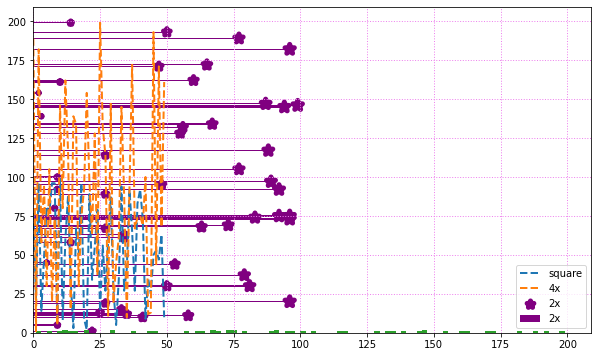

In [333]:
x=np.random.randint(1,100,50)
y=np.random.randint(1,200,50)
plt.rcParams['figure.figsize']=(10,6)
plt.plot(x,lw=2,label='square',ls='--')
plt.plot(y,lw=2,label='4x',ls='--')
plt.scatter(x,y,lw=5,label='2x',s=x,marker='*',color='purple')
plt.barh(y,width=x,lw=5,label='2x',color='purple')
plt.hist(y,rwidth=10000,bins=100)

#plt.xticks(x)#to get x values or x axis labels
plt.legend(loc=4)#put legend before show() else legend wont be shown
plt.grid(color='violet',lw=1,ls='dotted')
plt.show()


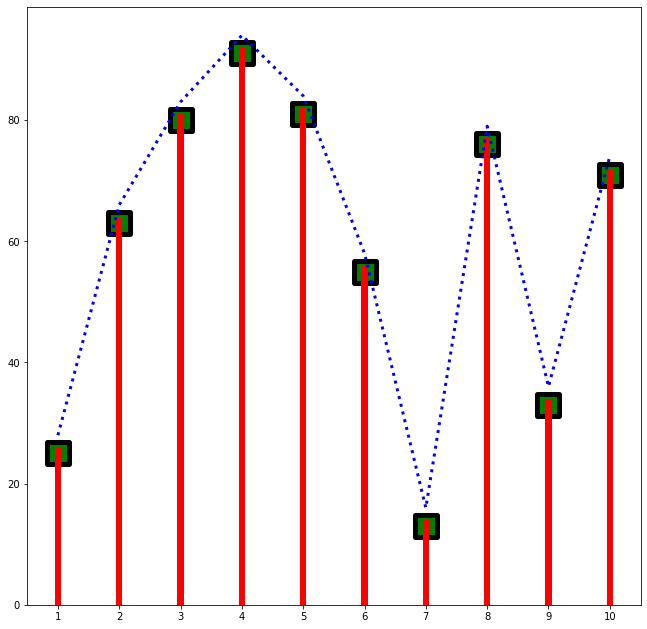

In [86]:
#another way to get thtat plot
plt.rcParams['figure.figsize']=(11,11)
np.random.seed(11)
x=np.arange(1,11)
y=np.random.randint(1,100,10)
plt.plot(x,y+2,color='blue',ls='dotted',lw=3)
plt.xticks(x)
plt.scatter(x,y-1,color='green',s=500,marker='s',lw=5,edgecolor='black')
z=plt.bar(x,y,width=0.1,color='red')

plt.show()


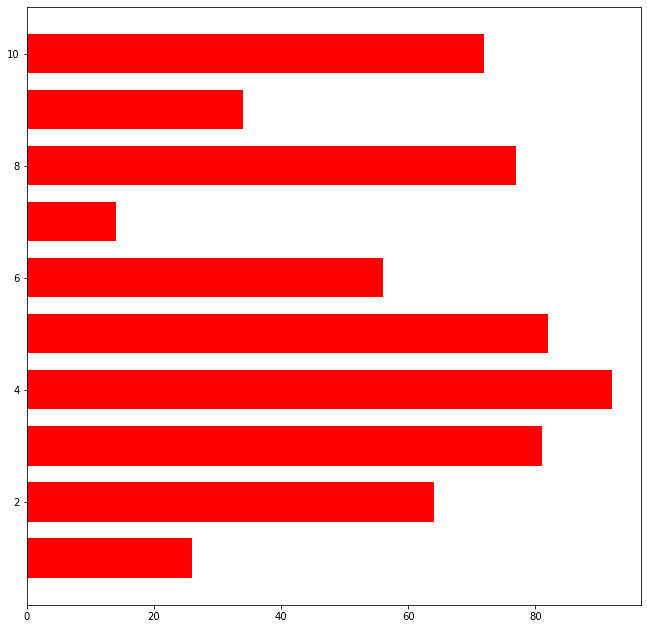

In [98]:
z=plt.barh(x,y,height=0.7,color='red')

C:\Users\2112161\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\2112161\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


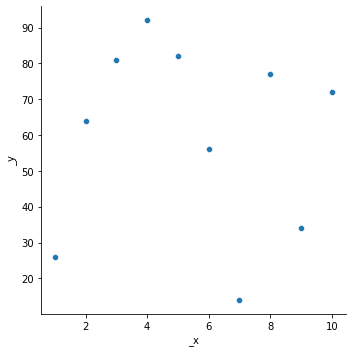

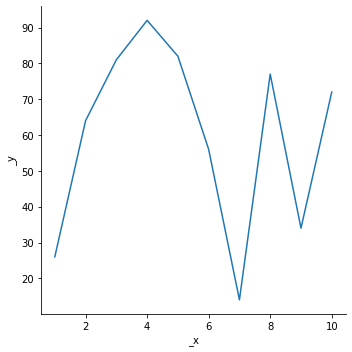

In [104]:
sb.relplot(x,y,)#like scatter plot in seaborn below theres a sperrate scatterplot func also
sb.relplot(x,y,kind='line')

C:\Users\2112161\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

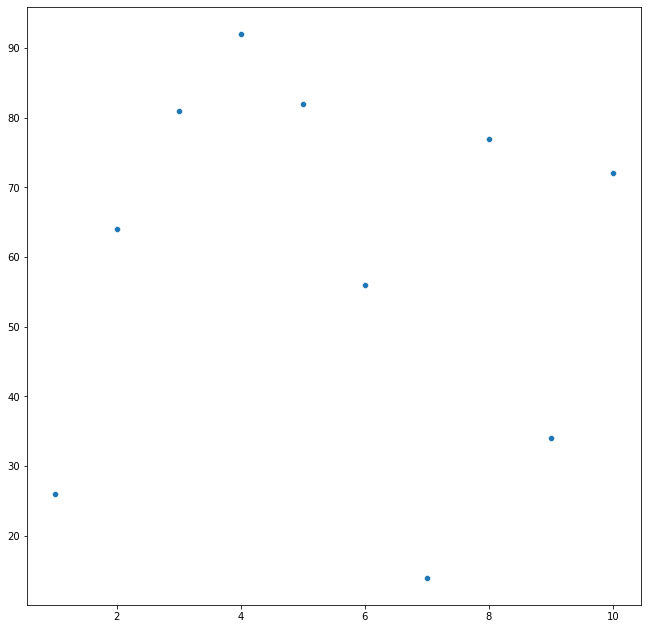

In [103]:
sb.scatterplot(x,y)

C:\Users\2112161\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\2112161\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


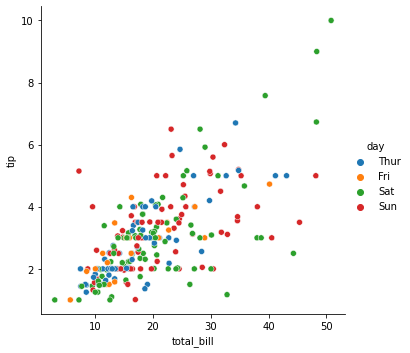

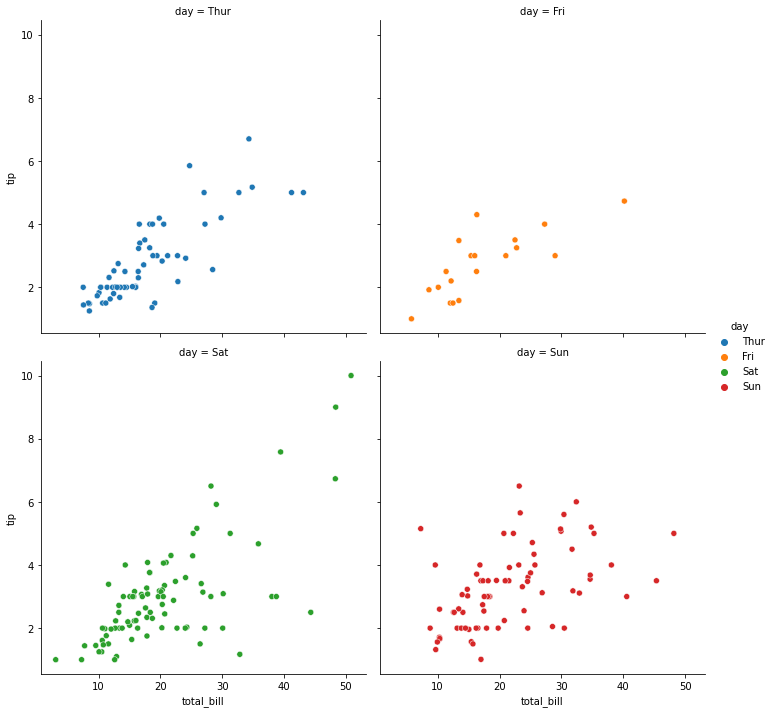

In [114]:
t=sb.load_dataset('tips')
sb.relplot(t.total_bill,t.tip,hue='day',data=t)
sb.relplot(t.total_bill,t.tip,hue='day',data=t,col=t.day,col_wrap=2)#col warps tell how mnay col u wnat
#this above line will show day wise plot

In [17]:
d=pd.DataFrame(np.arange(1,10),index=[1,2,3],columns=[1,2,3])#error cuz len(index) * len(columns)=shape of data
#so here shape of data is 10,1 but index * columns is 9 is 3*3 so make it even see below
d

ValueError: Shape of passed values is (9, 1), indices imply (3, 3)

In [18]:
d=pd.DataFrame(np.arange(1,10).reshape(3,3),index=[1,2,3],columns=[1,2,3])
d

1  2  3
1  1  2  3
2  4  5  6
3  7  8  9

In [34]:
df1[['temperature']]#use double [] to convert series ot dataframe

temperature
Date                   
2021-01-24         32.0
2022-01-25          NaN
2022-01-26         28.0
2022-01-27          NaN
2022-01-28          NaN
2022-01-29         32.0
2022-01-30         40.0

In [38]:
df1.iloc[[1,3,5]]#to get multiple rows use double []

Day  temperature
Date                         
2022-01-25   tue          NaN
2022-01-27  thur          NaN
2022-01-29   sat         32.0

In [57]:
df.iloc[3:6,:5]

show_id     type title        director  \
3      s4    Movie     9     Shane Acker   
4      s5    Movie    21  Robert Luketic   
5      s6  TV Show    46     Serdar Akar   

                                                cast  
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...

In [60]:
df.loc[3:6,['show_id','title']]

show_id title
3      s4     9
4      s5    21
5      s6    46
6      s7   122

In [68]:
df1.sort_values('Day').iloc[0] # refer https://www.youtube.com/watch?v=zmuvAU5DpNA

Day            fri
temperature    NaN
Name: 2022-01-28 00:00:00, dtype: object

In [70]:
df1.dropna(axis=0)

Day  temperature
Date                        
2021-01-24  mon         32.0
2022-01-26  wed         28.0
2022-01-29  sat         32.0
2022-01-30  sun         40.0

In [71]:
df1.dropna(axis=1)#1 for col

Day
Date            
2021-01-24   mon
2022-01-25   tue
2022-01-26   wed
2022-01-27  thur
2022-01-28   fri
2022-01-29   sat
2022-01-30   sun

In [72]:
df1.dropna(axis=1,how='all')#all means if all values are null that col is removed same for axis =0 default is how=any

Day  temperature
Date                         
2021-01-24   mon         32.0
2022-01-25   tue          NaN
2022-01-26   wed         28.0
2022-01-27  thur          NaN
2022-01-28   fri          NaN
2022-01-29   sat         32.0
2022-01-30   sun         40.0

In [75]:
df1.dropna(axis=0,how='any',subset=['temperature'])#to delete only particular col records having null jus like df1.dropna(axis=0)
#but there ur specifying which col to remove

Day  temperature
Date                        
2021-01-24  mon         32.0
2022-01-26  wed         28.0
2022-01-29  sat         32.0
2022-01-30  sun         40.0

In [2]:
sb.load_dataset_dataset_dataset('titanic')

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [2]:
d=pd.read_csv('employees.csv')
d

First Name  Gender  Start Date Last Login Time  Salary  Bonus %  \
0      Douglas    Male    8/6/1993        12:42 PM   97308    6.945   
1       Thomas    Male   3/31/1996         6:53 AM   61933    4.170   
2        Maria  Female   4/23/1993        11:17 AM  130590   11.858   
3        Jerry    Male    3/4/2005         1:00 PM  138705    9.340   
4        Larry    Male   1/24/1998         4:47 PM  101004    1.389   
..         ...     ...         ...             ...     ...      ...   
995      Henry     NaN  11/23/2014         6:09 AM  132483   16.655   
996    Phillip    Male   1/31/1984         6:30 AM   42392   19.675   
997    Russell    Male   5/20/2013        12:39 PM   96914    1.421   
998      Larry    Male   4/20/2013         4:45 PM   60500   11.985   
999     Albert    Male   5/15/2012         6:24 PM  129949   10.169   

    Senior Management                  Team  
0                True             Marketing  
1                True                   NaN  
2               False               Finance  
3                True               Finance  
4                True       Client Services  
..                ...                   ...  
995             False          Distribution  
996             False               Finance  
997             False               Product  
998             False  Business Development  
999              True                 Sales  

[1000 rows x 8 columns]

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [6]:
d['Start Date']=d['Start Date'].astype('datetime64[ns]')#to convert to dattime fomrate as these columns are string which is not correct
d['Last Login Time']=d['Last Login Time'].astype('datetime64[ns]')
d['Senior Management']=d['Senior Management'].astype('bool')
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         933 non-null    object        
 1   Gender             855 non-null    object        
 2   Start Date         1000 non-null   datetime64[ns]
 3   Last Login Time    1000 non-null   datetime64[ns]
 4   Salary             1000 non-null   int64         
 5   Bonus %            1000 non-null   float64       
 6   Senior Management  1000 non-null   bool          
 7   Team               957 non-null    object        
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 55.8+ KB


In [10]:
d.rename(columns={'Bonus %':'bonus'},inplace=True)
d

First Name  Gender Start Date     Last Login Time  Salary   bonus  \
0      Douglas    Male 1993-08-06 2022-04-15 12:42:00   97308   6.945   
1       Thomas    Male 1996-03-31 2022-04-15 06:53:00   61933   4.170   
2        Maria  Female 1993-04-23 2022-04-15 11:17:00  130590  11.858   
3        Jerry    Male 2005-03-04 2022-04-15 13:00:00  138705   9.340   
4        Larry    Male 1998-01-24 2022-04-15 16:47:00  101004   1.389   
..         ...     ...        ...                 ...     ...     ...   
995      Henry     NaN 2014-11-23 2022-04-15 06:09:00  132483  16.655   
996    Phillip    Male 1984-01-31 2022-04-15 06:30:00   42392  19.675   
997    Russell    Male 2013-05-20 2022-04-15 12:39:00   96914   1.421   
998      Larry    Male 2013-04-20 2022-04-15 16:45:00   60500  11.985   
999     Albert    Male 2012-05-15 2022-04-15 18:24:00  129949  10.169   

     Senior Management                  Team  
0                 True             Marketing  
1                 True                   NaN  
2                False               Finance  
3                 True               Finance  
4                 True       Client Services  
..                 ...                   ...  
995              False          Distribution  
996              False               Finance  
997              False               Product  
998              False  Business Development  
999               True                 Sales  

[1000 rows x 8 columns]

In [40]:
(d['Gender']=='Male') & (d['Salary']>20000)
#movies[(movies.duration >= 200) & (movies.genre == 'Drama')]

0       True
1       True
2      False
3       True
4       True
       ...  
995    False
996     True
997     True
998     True
999     True
Length: 1000, dtype: bool

In [41]:
d[(d['Gender']=='Male') & (d['Salary']>20000)]

First Name Gender Start Date     Last Login Time  Salary   bonus  \
0      Douglas   Male 1993-08-06 2022-04-15 12:42:00   97308   6.945   
1       Thomas   Male 1996-03-31 2022-04-15 06:53:00   61933   4.170   
3        Jerry   Male 2005-03-04 2022-04-15 13:00:00  138705   9.340   
4        Larry   Male 1998-01-24 2022-04-15 16:47:00  101004   1.389   
5       Dennis   Male 1987-04-18 2022-04-15 01:35:00  115163  10.125   
..         ...    ...        ...                 ...     ...     ...   
994     George   Male 2013-06-21 2022-04-15 17:47:00   98874   4.479   
996    Phillip   Male 1984-01-31 2022-04-15 06:30:00   42392  19.675   
997    Russell   Male 2013-05-20 2022-04-15 12:39:00   96914   1.421   
998      Larry   Male 2013-04-20 2022-04-15 16:45:00   60500  11.985   
999     Albert   Male 2012-05-15 2022-04-15 18:24:00  129949  10.169   

     Senior Management                  Team  
0                 True             Marketing  
1                 True                   NaN  
3                 True               Finance  
4                 True       Client Services  
5                False                 Legal  
..                 ...                   ...  
994               True             Marketing  
996              False               Finance  
997              False               Product  
998              False  Business Development  
999               True                 Sales  

[424 rows x 8 columns]

In [42]:
d.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
bonus                  0
Senior Management      0
Team                  43
dtype: int64

In [45]:
d[d.Gender==np.nan]

Empty DataFrame
Columns: [First Name, Gender, Start Date, Last Login Time, Salary, bonus, Senior Management, Team]
Index: []

######
refer https://www.youtube.com/watch?v=1cSauCcoyyE



feature engineering
1.Feature scaling
2.Feature encoding
3.oultiers

2.feature encoding:
Categorical data has two types
1.Ordinal data(has rank/order example education,team,department,employee designation)
This is encoded generally using label encoding
2.Nominal data(no order like country,cars etc)
thisi si done generally using one hot coding and can be done using pandas and skitlearn

1.Feature scaling(done on numerical columns):
scaling is done to bring features having different range of values and convert them to smae range (normalization) cuz by default ML model without scaling takes higher range values as first priorty which could affect accuracy of model
two types:
1.standardization (also called zscore normalization) 
a.standard scaling( commonly used other than images)
2.Normalization
a.min max scaling(generally applied to images
formula zm=(x-xmin)/(xmax-xmin) x is the dataset or array or feature
b.robust scaling(used for outloiers)

outlier-> irrelevant/data outside range of observations/boundary values

https://www.youtube.com/watch?v=1JWpXHgqj54
underfitting and overfitting bias vs variance


In [49]:
int('10+5j')

ValueError: invalid literal for int() with base 10: '10+5j'

In [2]:
d=sb.load_dataset('titanic')
d

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [6]:
d.pivot_table(index='class',columns='sex',values='alive',aggfunc='count')

sex     female  male
class               
First       94   122
Second      76   108
Third      144   347

In [5]:
#note before encoding or sclaing remove all nul values
d1=d[['age','fare','sex','embark_town','class']]
d1

age     fare     sex  embark_town   class
0    22.0   7.2500    male  Southampton   Third
1    38.0  71.2833  female    Cherbourg   First
2    26.0   7.9250  female  Southampton   Third
3    35.0  53.1000  female  Southampton   First
4    35.0   8.0500    male  Southampton   Third
..    ...      ...     ...          ...     ...
886  27.0  13.0000    male  Southampton  Second
887  19.0  30.0000  female  Southampton   First
888   NaN  23.4500  female  Southampton   Third
889  26.0  30.0000    male    Cherbourg   First
890  32.0   7.7500    male   Queenstown   Third

[891 rows x 5 columns]

In [8]:
d1.isnull().sum()

age            177
fare             0
sex              0
embark_town      2
class            0
dtype: int64

In [6]:
d1.age.fillna(np.round(d1.age.mean(),2),inplace=True)
d1.age

C:\Users\2112161\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.7
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [7]:
d1=d1.dropna()
d1.isnull().sum()

age            0
fare           0
sex            0
embark_town    0
class          0
dtype: int64

In [3]:
#standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [8]:
#scaling only age nad fare
x1=d1[['age','fare']]
x1.describe()

age        fare
count  889.000000  889.000000
mean    29.653622   32.096681
std     12.968367   49.697504
min      0.420000    0.000000
25%     22.000000    7.895800
50%     29.700000   14.454200
75%     35.000000   31.000000
max     80.000000  512.329200

In [72]:
xs=sc.fit_transform(x1)
pd.DataFrame(xs).describe()#now see above and below mean is almost 0 and std is 1 or between 0 and 1 thisi is how standard sclaing is done

0             1
count  8.890000e+02  8.890000e+02
mean  -3.868297e-17  1.092115e-16
std    1.000563e+00  1.000563e+00
min   -2.255494e+00 -6.462044e-01
25%   -5.905085e-01 -4.872378e-01
50%    3.578250e-03 -3.551972e-01
75%    4.124951e-01 -2.207954e-02
max    3.884430e+00  9.668551e+00

In [11]:
#min max scaler
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()#by default it scales valies between 0 and 1 check by perssing shift tab 

In [21]:
xmm=mm.fit_transform(x1)
xmm#so each value of x1 columns is mapped to values 0 to 1
xmm.size

1778

In [23]:
x1.size#see above

1778

In [24]:
pd.DataFrame(xmm).describe()#see min vali and max is 0 and 1

0           1
count  889.000000  889.000000
mean     0.367349    0.062649
std      0.162960    0.097003
min      0.000000    0.000000
25%      0.271174    0.015412
50%      0.367932    0.028213
75%      0.434531    0.060508
max      1.000000    1.000000

In [25]:
from sklearn.preprocessing import RobustScaler
rc=RobustScaler()
xrc=rc.fit_transform(x1)
pd.DataFrame(xrc).describe()

0           1
count  889.000000  889.000000
mean    -0.003568    0.763605
std      0.997567    2.151016
min     -2.252308   -0.625609
25%     -0.592308   -0.283862
50%      0.000000    0.000000
75%      0.407692    0.716138
max      3.869231   21.549112

In [15]:
#feature encoding done for categ features and scaling for numberical
x2=d[['sex','embark_town','class']]
x2#here sex and embark are nominal and class is ordinal data

sex  embark_town   class
0      male  Southampton   Third
1    female    Cherbourg   First
2    female  Southampton   Third
3    female  Southampton   First
4      male  Southampton   Third
..      ...          ...     ...
886    male  Southampton  Second
887  female  Southampton   First
888  female  Southampton   Third
889    male    Cherbourg   First
890    male   Queenstown   Third

[891 rows x 3 columns]

In [27]:
#one hot encoding can be done using pandas and sklearn
#using pandas
gen=pd.get_dummies(x2.sex)
gen# here for index 0 female is 0 and male is 1 means index 0 has only male entry check above

female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[891 rows x 2 columns]

In [19]:
#but as discussed in lec we  can remove on column for btr clairity
gen=pd.get_dummies(x2.sex,drop_first=True)
gen# now 1 is male and 0 is female

male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]

In [30]:
emb=pd.get_dummies(x2.embark_town)
emb

Cherbourg  Queenstown  Southampton
0            0           0            1
1            1           0            0
2            0           0            1
3            0           0            1
4            0           0            1
..         ...         ...          ...
886          0           0            1
887          0           0            1
888          0           0            1
889          1           0            0
890          0           1            0

[891 rows x 3 columns]

In [17]:
emb=pd.get_dummies(x2.embark_town,drop_first=True)
emb

Queenstown  Southampton
0             0            1
1             0            0
2             0            1
3             0            1
4             0            1
..          ...          ...
886           0            1
887           0            1
888           0            1
889           0            0
890           1            0

[891 rows x 2 columns]

In [20]:
x2=pd.concat([x2,emb,gen],axis=1)#after encoding merge
x2

sex  embark_town   class  Queenstown  Southampton  male
0      male  Southampton   Third           0            1     1
1    female    Cherbourg   First           0            0     0
2    female  Southampton   Third           0            1     0
3    female  Southampton   First           0            1     0
4      male  Southampton   Third           0            1     1
..      ...          ...     ...         ...          ...   ...
886    male  Southampton  Second           0            1     1
887  female  Southampton   First           0            1     0
888  female  Southampton   Third           0            1     0
889    male    Cherbourg   First           0            0     1
890    male   Queenstown   Third           1            0     1

[891 rows x 6 columns]

In [21]:
#using sklearn
from sklearn.preprocessing import OneHotEncoder
he=OneHotEncoder()


In [22]:
gen=he.fit_transform(x2.sex)
gen

ValueError: Expected 2D array, got 1D array instead:
array=['male' 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'female' 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'female' 'female' 'female' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male'
 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female'
 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'female'
 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'male'
 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'female'
 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'female'
 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'female'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'female' 'female'
 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'female'
 'female' 'male' 'male' 'female' 'female' 'male' 'female' 'male' 'female'
 'female' 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'female'
 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'female' 'female' 'male' 'male' 'male' 'male'
 'female' 'female' 'female' 'male' 'male' 'male' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'male' 'female' 'male' 'male' 'female' 'male'
 'male' 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'female'
 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'female'
 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'female'
 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'female'
 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'female' 'female'
 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'female'
 'male' 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'female'
 'female' 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'female' 'female' 'female' 'male' 'female' 'female' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female'
 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'female'
 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'female' 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'female'
 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'male' 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'male' 'female' 'male' 'female' 'female'
 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'female'
 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'female'
 'female' 'male' 'female' 'male' 'male' 'male' 'female' 'female' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'female'
 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'male'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [23]:
#so to avoid above error use double [[]]
gen=he.fit_transform(x2[['sex']])
gen#this jus creates an object now need to conver to array

<891x2 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [26]:
gen=he.fit_transform(x2[['sex']])
gen.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [34]:
gen=he.fit_transform(x2[['sex']])
pd.DataFrame(gen.toarray())#converting array to dataframe

0    1
0    0.0  1.0
1    1.0  0.0
2    1.0  0.0
3    1.0  0.0
4    0.0  1.0
..   ...  ...
886  0.0  1.0
887  1.0  0.0
888  1.0  0.0
889  0.0  1.0
890  0.0  1.0

[891 rows x 2 columns]

In [35]:
gen=pd.DataFrame(gen.toarray())
gen=gen.drop([0],axis=1)
gen

1
0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
..   ...
886  1.0
887  0.0
888  0.0
889  1.0
890  1.0

[891 rows x 1 columns]

In [36]:
#label encoding
#using pandas
d1['class']

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 889, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

In [37]:
d1['new_class']=d['class'].map({'First':1,'Second':2,'Third':3})
d1

C:\Users\2112161\AppData\Local\Temp\12/ipykernel_9812/386628428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['new_class']=d['class'].map({'First':1,'Second':2,'Third':3})


age     fare     sex  embark_town   class  newc new_class
0    22.0   7.2500    male  Southampton   Third     2         3
1    38.0  71.2833  female    Cherbourg   First     0         1
2    26.0   7.9250  female  Southampton   Third     2         3
3    35.0  53.1000  female  Southampton   First     0         1
4    35.0   8.0500    male  Southampton   Third     2         3
..    ...      ...     ...          ...     ...   ...       ...
886  27.0  13.0000    male  Southampton  Second     1         2
887  19.0  30.0000  female  Southampton   First     0         1
888  29.7  23.4500  female  Southampton   Third     2         3
889  26.0  30.0000    male    Cherbourg   First     0         1
890  32.0   7.7500    male   Queenstown   Third     2         3

[889 rows x 7 columns]

In [31]:
#using sklean it ecnodes alphabetically 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
d1['newc']=le.fit_transform(d1['class'])
d1#by default it encodes from 0

C:\Users\2112161\AppData\Local\Temp\12/ipykernel_9812/2490441285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['newc']=le.fit_transform(d1['class'])


age     fare     sex  embark_town   class  newc new_class
0    22.0   7.2500    male  Southampton   Third     2         3
1    38.0  71.2833  female    Cherbourg   First     0         1
2    26.0   7.9250  female  Southampton   Third     2         3
3    35.0  53.1000  female  Southampton   First     0         1
4    35.0   8.0500    male  Southampton   Third     2         3
..    ...      ...     ...          ...     ...   ...       ...
886  27.0  13.0000    male  Southampton  Second     1         2
887  19.0  30.0000  female  Southampton   First     0         1
888  29.7  23.4500  female  Southampton   Third     2         3
889  26.0  30.0000    male    Cherbourg   First     0         1
890  32.0   7.7500    male   Queenstown   Third     2         3

[889 rows x 7 columns]

#outliers
#tecniques to find outlier
1.scatter plot
2.boxplot
3.IQR
4.z score (having z values >3)
https://www.youtube.com/watch?v=IdcVl_oeync&t=3757s

In [73]:
data=[1,2,3,7,2,7,102,5,23,150,9,7,13,24,14,2,14,10,190]

In [58]:
range(len(data))

range(0, 19)

<function matplotlib.pyplot.show(close=None, block=None)>

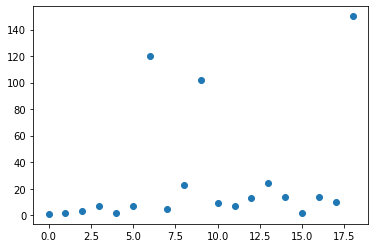

In [59]:
#using scatter plot

plt.scatter(x=range(len(data)),y=data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

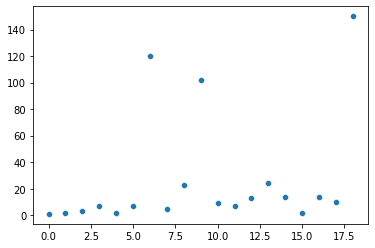

In [60]:
sb.scatterplot(x=range(len(data)),y=data)
plt.show

<AxesSubplot:>

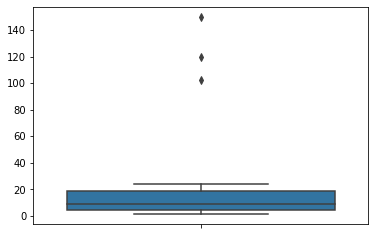

In [61]:
#boxplot
sb.boxplot(y=data)

#z score
z=(x-mean)/std

In [105]:
out=[]
def zsc(x):
    
    t=3#if z is > mod(3) or abs(3) the nits outlier 
    xm=np.mean(x)
    sd=np.std(x)
    for i in x:
        z=(i-xm)/sd
        if np.abs(z)>1:#actually condtion shud be z>3 but not getting correct output for z>3 
            out.append(i)
    return out

zz=zsc(data)
zz

[102, 150, 190]

In [77]:
#IQR
data1=sorted(data)
data1

[1, 2, 2, 2, 3, 5, 7, 7, 7, 9, 10, 13, 14, 14, 23, 24, 102, 150, 190]

In [80]:
q1,q3=np.percentile(data1,[25,75])#calc q1 and q3
q1,q3

(4.0, 18.5)

In [85]:
#cal iqr
iqr=q3-q1
iqr

14.5

In [84]:
#cal lower and upper bound val
l=q1-(1.5*iqr)
u=q3+(1.5*iqr)
l,u

(-17.75, 40.25)

In [93]:
[i for i in data if i<l]#no vaues less than l

[]

In [94]:
[i for i in data if i>u]#values greater than u

[102, 150, 190]

[1, 2, 3, 7, 2, 7, 102, 5, 23, 150, 9, 7, 13, 24, 14, 2, 14, 10, 190]

#ML algorithms
1.supervised
regression
classsion
2unsupervised
clustering
3.reinforment learning

https://scikit-learn.org/stable/index.html

In [ ]:
#regression(when we want output as real numbers or numerical values)
#in classification for prediction of 2 class(for output as binary class ) we chose logistic regression
#for multiclass go for KNN decision tree etc


In [ ]:
#linear regression(find relation between x and y) i.e y=f(x) or y=mx+c can be used for both +ve and -ve linear gresion

In [4]:
df=pd.read_csv('Salary_Data.csv')
df

YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

In [8]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
x=df[['YearsExperience']]#x must be 2d
y=df['Salary'] #y can be 1d or 2d
x

YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5

In [8]:
#split data into train and test
from sklearn.model_selection import train_test_split

In [120]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=9013)

In [10]:
xtest

YearsExperience
2               1.5
28             10.3
13              4.1
10              3.9
26              9.5
24              8.7

In [121]:
#build your model
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [122]:
#fit the model(train the model)
model.fit(xtrain,ytrain)

LinearRegression()

In [123]:
#perform testing(prediction)
yp=model.predict(xtest)
yp#this gives predicte values

array([100493.23884942, 115574.31604603,  36398.6607638 , 108033.77744773,
        56192.57458436,  74101.35375534])

In [124]:
#xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)
#calc r2 scrore
from sklearn.metrics import r2_score
r2=r2_score(ytest,yp)
r2

0.9842738632128417

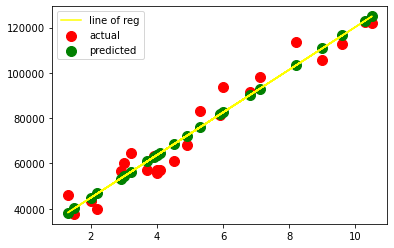

In [125]:
#plot train plot
plt.scatter(xtrain,ytrain,color='red',label='actual',s=100)
plt.scatter(xtrain,model.predict(xtrain),color='green',label='predicted',s=100)
plt.plot(xtrain,model.predict(xtrain),color='yellow',label='line of reg')
plt.legend()
plt.show()

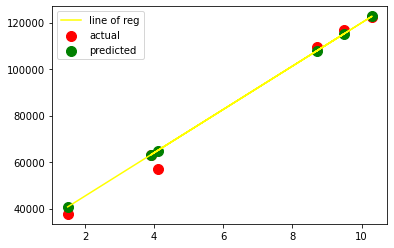

In [27]:
#plot test  plot
plt.scatter(xtest,ytest,color='red',label='actual',s=100)
plt.scatter(xtest,model.predict(xtest),color='green',label='predicted',s=100)
plt.plot(xtest,model.predict(xtest),color='yellow',label='line of reg')
plt.legend()
plt.show()

In [28]:
m=model.coef_#value of slope m
c=model.intercept_#value of intercept c
m,c

(array([9312.57512673]), 26780.099150628186)

In [8]:
#to vary the accuracy change randome state val and see output
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

model=LinearRegression()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)
model.fit(xtrain,ytrain)

yp=model.predict(xtest)
r2=r2_score(ytest,yp)
r2

0.988169515729126

In [133]:
ac=[]
for i in range(10000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=i)
    model=LinearRegression()
    model.fit(xtrain,ytrain)
    yp=model.predict(xtest)
    r2=r2_score(ytest,yp)
    ac.append(r2)
    


In [135]:
np.max(ac),np.argmax(ac)

(0.99842716176972, 9014)

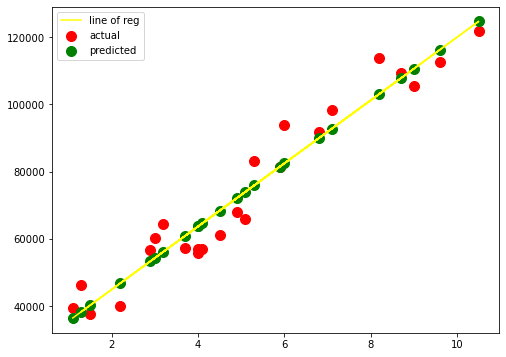

0.99842716176972


In [131]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=9014)
model=LinearRegression()
model.fit(xtrain,ytrain)
yp=model.predict(xtest)
r2=r2_score(ytest,yp)
plt.figure(figsize=(8,6))
plt.scatter(xtrain,ytrain,color='red',label='actual',s=100)
plt.scatter(xtrain,model.predict(xtrain),color='green',label='predicted',s=100)
plt.plot(xtrain,model.predict(xtrain),color='yellow',label='line of reg')
plt.legend()
plt.show()
print(r2)#see belwo

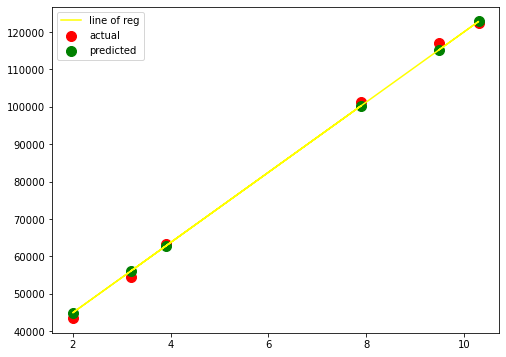

0.99842716176972


In [130]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=9014)
model=LinearRegression()
model.fit(xtrain,ytrain)
yp=model.predict(xtest)
r2=r2_score(ytest,yp)
plt.figure(figsize=(8,6))
plt.scatter(xtest,ytest,color='red',label='actual',s=100)
plt.scatter(xtest,model.predict(xtest),color='green',label='predicted',s=100)
plt.plot(xtest,model.predict(xtest),color='yellow',label='line of reg')
plt.legend()
plt.show()
print(r2)#see 9014 has best value best reg fit line

In [136]:
#save the model
import joblib
joblib.dump(model,'salary.pkl')#pkl mis the fileformat of file in which model is saved file is saved in python scripts loc

['salary.pkl']

In [138]:
#load the model
mymod=joblib.load('salary.pkl')

In [140]:
mymod.predict([[11]])#x is 2d so input is 2d

array([130010.20996375])

In [141]:
mymod.predict([[11],[12],[13]])#for multiple values

array([130010.20996375, 139452.40765902, 148894.60535428])

In [10]:
ytest.values#actual values

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [144]:
dd=df[['YearsExperience','Salary']]
dd

YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

#multi linear reg https://www.youtube.com/watch?v=ashGekqstl8&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=53
in case of 2d it(linear regression model) tells about a plane that passes through the points
eqn y=ax1+bx2+C

In [10]:
#sample 
from sklearn.datasets import make_regression#to create own regression data


In [11]:
x,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)#2 input 1 output

In [19]:
df = pd.DataFrame({'feature1':x[:,0],'feature2':x[:,1],'target':y})
df

feature1  feature2      target
0  -0.809275  1.719301  161.027924
1   0.400958 -1.705180 -142.356924
2  -0.091535 -0.135346   41.541334
3  -1.059523  2.856437  206.020790
4   1.352866  0.597674   88.947621
..       ...       ...         ...
95  0.857902 -1.537719  -24.732488
96 -0.355174  0.372072   57.434980
97  0.943200 -0.101506   82.701620
98 -0.701323 -0.038680  -29.809667
99  0.663514 -0.929445  -29.349585

[100 rows x 3 columns]

In [20]:
df.describe()

feature1    feature2      target
count  100.000000  100.000000  100.000000
mean     0.055819    0.155584   11.592631
std      0.979453    1.015496   98.297356
min     -2.530410   -2.439670 -238.771901
25%     -0.523067   -0.418211  -56.244942
50%      0.129922    0.083003   12.891306
75%      0.761293    0.753083   84.847442
max      2.211409    2.856437  241.914549

In [21]:
df1=df.copy()
df1

feature1  feature2      target
0  -0.809275  1.719301  161.027924
1   0.400958 -1.705180 -142.356924
2  -0.091535 -0.135346   41.541334
3  -1.059523  2.856437  206.020790
4   1.352866  0.597674   88.947621
..       ...       ...         ...
95  0.857902 -1.537719  -24.732488
96 -0.355174  0.372072   57.434980
97  0.943200 -0.101506   82.701620
98 -0.701323 -0.038680  -29.809667
99  0.663514 -0.929445  -29.349585

[100 rows x 3 columns]

In [89]:
x=df1[['feature1','feature2']]
y=df1.drop(['feature1','feature2'],axis=1)
y

target
0   161.027924
1  -142.356924
2    41.541334
3   206.020790
4    88.947621
..         ...
95  -24.732488
96   57.434980
97   82.701620
98  -29.809667
99  -29.349585

[100 rows x 1 columns]

In [90]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [91]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)

In [92]:
pd.DataFrame(x).describe()

0             1
count  1.000000e+02  1.000000e+02
mean  -6.217249e-17  1.110223e-17
std    1.005038e+00  1.005038e+00
min   -2.653784e+00 -2.568528e+00
25%   -5.940067e-01 -5.678867e-01
50%    7.603872e-02 -7.183370e-02
75%    7.239019e-01  5.913452e-01
max    2.211897e+00  2.673039e+00

In [93]:
le=LinearRegression()
le.fit(xtrain,ytrain)

LinearRegression()

In [94]:
ypr=le.predict(xtest)
ypr

array([[  39.74280732],
       [  16.19932001],
       [ -22.4263664 ],
       [ -16.91513992],
       [ 125.13399795],
       [-129.35640447],
       [ -69.05690341],
       [  74.10267478],
       [ -41.65822093],
       [-124.07510101],
       [ -19.77934822],
       [ -18.87657722],
       [  99.00367217],
       [ -24.55383534],
       [-142.80609536],
       [-224.49786454],
       [ -30.62276788],
       [  63.37665087],
       [ 123.54437182],
       [ -61.35893273]])

In [95]:
r2_score(ypr,ytest)

0.6464996497947726

In [81]:
temp=pd.concat([pd.DataFrame(ypr,index=ytest.index),ytest],axis=1)
temp.columns=['predicted','actual']
temp


predicted      actual
26   39.742807   16.118171
86   16.199320    6.497283
2   -22.426366   41.541334
55  -16.915140  -19.488210
75  125.133998  111.700384
93 -129.356404  -70.503418
16  -69.056903  -56.197420
73   74.102675   20.794001
54  -41.658221  -77.195474
95 -124.075101  -24.732488
53  -19.779348   34.286797
92  -18.876577  -74.203339
78   99.003672  151.534232
13  -24.553835    3.925727
7  -142.806095 -111.623448
30 -224.497865 -160.302228
22  -30.622768   32.094835
24   63.376651   22.864722
33  123.544372  121.242000
8   -61.358933   57.502182

In [82]:
le.coef_#a and b val

array([[24.97512148, 90.76849303]])

In [83]:
le.intercept_#c val

array([7.48527355])

In [88]:
print('r2score is',r2_score(ypr,ytest))
#print(accuracy_score(ypr,ytest))not supprted for continous data only discreet
print('MAE is',mean_absolute_error(ypr,ytest))
print('MSE is',mean_squared_error(ypr,ytest))

r2score is 0.6464996497947726
MAE is 44.16882004683065
MSE is 2844.503466950985


In [96]:
#refer new4 for visualization of 3d model i.e 2 inout and 1 target

#polynomial regression
https://www.youtube.com/watch?v=BNWLf3cKdbQ&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=60

In [97]:
from sklearn.preprocessing import PolynomialFeatures

In [445]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

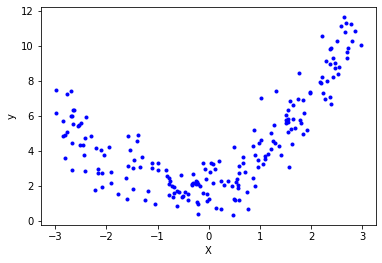

In [446]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [447]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [448]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [449]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.05419484252573459

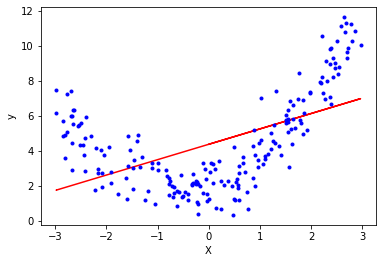

In [450]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [473]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)#if bias=false we wont get x0 or 1st term

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
X_test_trans


array([[ 1.00000000e+00,  2.36078068e-01,  5.57328543e-02],
       [ 1.00000000e+00, -2.52303337e+00,  6.36569739e+00],
       [ 1.00000000e+00, -1.29726766e+00,  1.68290338e+00],
       [ 1.00000000e+00, -1.39141486e+00,  1.93603530e+00],
       [ 1.00000000e+00, -2.03687650e+00,  4.14886586e+00],
       [ 1.00000000e+00, -2.55371080e+00,  6.52143885e+00],
       [ 1.00000000e+00,  1.55450917e+00,  2.41649877e+00],
       [ 1.00000000e+00, -1.57780980e+00,  2.48948377e+00],
       [ 1.00000000e+00,  5.94775822e-01,  3.53758279e-01],
       [ 1.00000000e+00,  1.47774848e-01,  2.18374056e-02],
       [ 1.00000000e+00,  1.02797509e+00,  1.05673279e+00],
       [ 1.00000000e+00,  7.40150425e-01,  5.47822651e-01],
       [ 1.00000000e+00,  1.64982439e+00,  2.72192051e+00],
       [ 1.00000000e+00, -5.14953590e-01,  2.65177199e-01],
       [ 1.00000000e+00,  5.92324665e-01,  3.50848509e-01],
       [ 1.00000000e+00,  3.81464340e-01,  1.45515043e-01],
       [ 1.00000000e+00, -2.76249097e+00

In [452]:
print(X_train[0])
print(X_train_trans[0])

[0.00569598]
[1.00000000e+00 5.69598234e-03 3.24442148e-05]


In [489]:
poly = PolynomialFeatures(degree=2,include_bias=False)#if bias=false we wont get x0 or 1st term

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
print(X_train[0])
print(X_train_trans[0])

[0.00569598]
[5.69598234e-03 3.24442148e-05]


In [490]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [491]:
y_pred = lr.predict(X_test_trans)

In [492]:
r2_score(y_test,y_pred)

0.7890644505685478

In [493]:
print(lr.coef_)
print(lr.intercept_)#almost same as 0.8,0.9 and 2

[[0.88115328 0.77171332]]
[2.14163641]


In [495]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

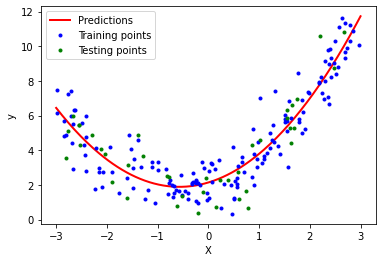

In [496]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [141]:
from sklearn.pipeline import Pipeline
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()
    print('degree is ',polybig_features.powers_.max())



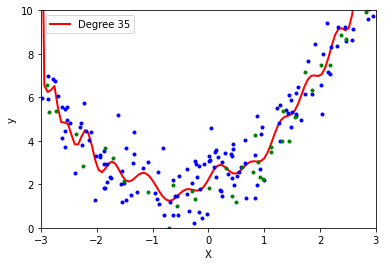

degree is  35


In [142]:

polynomial_regression(35)

#logistic regression
https://www.youtube.com/watch?v=BlNVB8PMip8&t=450s

#in linear reg y range from -inf to +inf in log reg y ranges from 0 to 1 only
eq of log reg is f(x)=1/1+e^-x which is called sigmoid curve also not here x is actually mx+c

KNN alogorithm

NN means nearest neibours,K means no.of neighbours also called lazy model /lazy algorithm
can be used for both regresion and classification
gives ouput based on nearest neihbours or majority 
mpstly we use it for classification
k can take max value as total no of datapoints

https://colab.research.google.com/drive/14tA2MZaXNFH3yIkSljRgglC9uzHU5BjH?usp=sharing


In [270]:
#logistics  reg
data=pd.read_csv('Social_Network_Ads.csv')
data

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [5]:
data.isnull().sum()#preprocessing needed fpr gender

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [271]:
data=pd.read_csv('Social_Network_Ads.csv')
data['Gender']=pd.get_dummies(data['Gender'],drop_first=True)
data

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]

In [13]:
#do this only after accu is low <90
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

data['Age'] = scaler.fit_transform(data[['Age']])
data['EstimatedSalary'] = scaler.fit_transform(data[['EstimatedSalary']])

data

User ID  Gender       Age  EstimatedSalary  Purchased
0    15624510    Male -1.781797        -1.490046          0
1    15810944    Male -0.253587        -1.460681          0
2    15668575  Female -1.113206        -0.785290          0
3    15603246  Female -1.017692        -0.374182          0
4    15804002    Male -1.781797         0.183751          0
..        ...     ...       ...              ...        ...
395  15691863  Female  0.797057        -0.844019          1
396  15706071    Male  1.274623        -1.372587          1
397  15654296  Female  1.179110        -1.460681          1
398  15755018    Male -0.158074        -1.078938          0
399  15594041  Female  1.083596        -0.990844          1

[400 rows x 5 columns]

In [55]:
x=data[['Gender','Age','EstimatedSalary']] #feature
y=data['Purchased']#target
x

Gender  Age  EstimatedSalary
0      Male   19            19000
1      Male   35            20000
2    Female   26            43000
3    Female   27            57000
4      Male   19            76000
..      ...  ...              ...
395  Female   46            41000
396    Male   51            23000
397  Female   50            20000
398    Male   36            33000
399  Female   49            36000

[400 rows x 3 columns]

In [ ]:
#note in log reg we need o be carewhile spltting refer video around 43 mins for claritiy

In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)
ytrain.value_counts() #this is not close to 80% i.e 205 so do hit and trial or loop

0    199
1    121
Name: Purchased, dtype: int64

In [20]:
xtrain

Gender       Age  EstimatedSalary
336    Male  1.943215         2.180561
64   Female  2.038728         0.389305
55   Female -1.304232        -0.432911
106  Female -1.113206        -1.020209
300  Female  1.943215        -0.932114
..      ...       ...              ...
323  Female  0.988083        -1.167033
192    Male -0.826666        -0.785290
117    Male -0.158074        -0.521006
47   Female -1.017692        -0.462276
172  Female -1.113206         1.417075

[320 rows x 3 columns]

In [17]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(xtrain,ytrain)

ValueError: could not convert string to float: 'Male'

In [ ]:
ypr=log.predict(xtest)
ypr

In [276]:
ypr=log.predict(xtest)
ypr
from sklearn.metrics import accuracy_score
r2=accuracy_score(ytest,ypr)
r2#Without scaling rebalancing

0.725

In [50]:
data.describe()#next run cell no 27 onwards

User ID      Gender           Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000  4.000000e+02     4.000000e+02  400.000000
mean   1.569154e+07    0.490000 -2.331468e-16    -1.193490e-17    0.357500
std    7.165832e+04    0.500526  1.001252e+00     1.001252e+00    0.479864
min    1.556669e+07    0.000000 -1.877311e+00    -1.607506e+00    0.000000
25%    1.562676e+07    0.000000 -7.550313e-01    -7.852897e-01    0.000000
50%    1.569434e+07    0.000000 -6.256110e-02     7.561451e-03    0.000000
75%    1.575036e+07    1.000000  7.970571e-01     5.361289e-01    1.000000
max    1.581524e+07    1.000000  2.134241e+00     2.356750e+00    1.000000

https://www.youtube.com/watch?v=c09drtuCS3c&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=75
accuracy and confusion matrix

In [89]:
#so in above we got 88.75 % lets where the model i sgoin wrong i,e accuracy using confusion matrix

In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypr)#here 58 is tp,0 fn , 22fp and 0 tn

array([[58,  0],
       [22,  0]], dtype=int64)

In [121]:
#order for confusion matrix is rows ire actual and columns are predicted
np.array([['TP','FN','FP','TN']]).reshape(2,2)#this is if pred is rows and actual is columns

array([['TP', 'FN'],
       ['FP', 'TN']], dtype='<U2')

<AxesSubplot:>

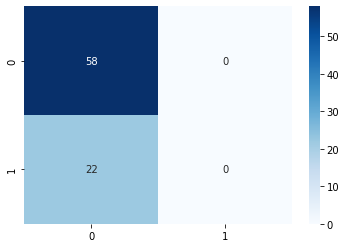

In [125]:
sb.heatmap(confusion_matrix(ytest,ypr),annot=True,cmap='Blues')#dont get confused already mention above

In [127]:
confusion_matrix(ytest,ypr)#so 22 wrong predictions

array([[58,  0],
       [22,  0]], dtype=int64)

In [ ]:
#now manula cal acc
#correctly predicted vals/total vals)


In [128]:
(58+0)/(58+22)#same as above

0.725

In [78]:
#dummy model
data=pd.read_csv('Social_Network_Ads.csv')
x=data[['Gender','Age','EstimatedSalary']] #feature
y=data['Purchased']#target
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)
from sklearn.dummy import DummyClassifier
dm=DummyClassifier(strategy="constant",constant=0)
dm.fit(xtrain,ytrain)
yte=dm.predict(xtest)
ac=accuracy_score(yte,ytest)
ac#dummy model doubt

0.725

In [66]:
ohe=OneHotEncoder(drop='first')
x.Gender=ohe.fit_transform(x[['Gender']]).toarray()
x

C:\Users\2112161\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Gender  Age  EstimatedSalary
0       1.0   19            19000
1       1.0   35            20000
2       0.0   26            43000
3       0.0   27            57000
4       1.0   19            76000
..      ...  ...              ...
395     0.0   46            41000
396     1.0   51            23000
397     0.0   50            20000
398     1.0   36            33000
399     0.0   49            36000

[400 rows x 3 columns]

In [67]:
#using randomforest
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
accuracy_score(rf.predict(xtest),ytest)#92.5 using RF

0.925

In [85]:
x.iloc[:].values
y.iloc[:].values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [91]:


X=data.iloc[:,:-1]
Y=data.drop(columns=X.columns)
Y

Purchased
0            0
1            0
2            0
3            0
4            0
..         ...
395          1
396          1
397          1
398          0
399          1

[400 rows x 1 columns]

ValueError: Filler values must be provided when X has more than 2 training features.

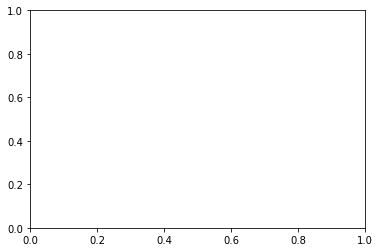

In [101]:
plot_decision_regions(x.iloc[:].values,
y.iloc[:].values, clf=rf, legend=2)

C:\Users\2112161\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

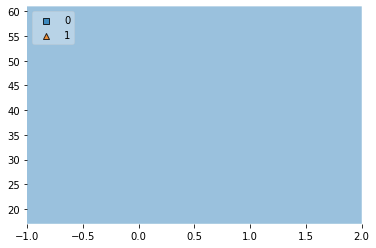

In [98]:
value=1.5
width=0.75

plot_decision_regions(xtrain.values, ytrain.values, clf=rf,
                  filler_feature_values={0: value, 1:value, 2:value},
                  filler_feature_ranges={0: width, 1: width, 2:width},
                  legend=2)

In [100]:
for i,j in data.iterrows():
    print(i,j)#to print every row iteration wise

0 User ID            15624510
Gender                 Male
Age                      19
EstimatedSalary       19000
Purchased                 0
Name: 0, dtype: object
1 User ID            15810944
Gender                 Male
Age                      35
EstimatedSalary       20000
Purchased                 0
Name: 1, dtype: object
2 User ID            15668575
Gender               Female
Age                      26
EstimatedSalary       43000
Purchased                 0
Name: 2, dtype: object
3 User ID            15603246
Gender               Female
Age                      27
EstimatedSalary       57000
Purchased                 0
Name: 3, dtype: object
4 User ID            15804002
Gender                 Male
Age                      19
EstimatedSalary       76000
Purchased                 0
Name: 4, dtype: object
5 User ID            15728773
Gender                 Male
Age                      27
EstimatedSalary       58000
Purchased                 0
Name: 5, dtype: object
6 User ID 

In [72]:
ytrain.value_counts()

0    199
1    121
Name: Purchased, dtype: int64

In [73]:
199/320

0.621875

In [64]:
ytrain.size

320

In [79]:
ytr=dm.predict(xtrain)
r2=accuracy_score(ytr,ytrain)
r2

0.621875

In [77]:
temp=pd.concat([pd.DataFrame(ytest,index=ytest.index),pd.DataFrame(yte,index=ytest.index)],axis=1)
temp.columns=['actual','predicted']
temp

actual  predicted
132       0          0
309       0          0
341       0          0
196       0          0
246       0          0
..      ...        ...
14        0          0
363       0          0
304       0          0
361       1          0
329       1          0

[80 rows x 2 columns]

In [84]:
confusion_matrix(ytr,ytrain)

array([[199, 121],
       [  0,   0]], dtype=int64)

In [83]:
199/(199+121)

0.621875

In [81]:
confusion_matrix(yte,ytest)

array([[58, 22],
       [ 0,  0]], dtype=int64)

In [82]:
accuracy_score(yte,ytest)

0.725

<AxesSubplot:>

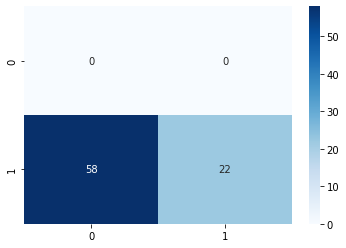

In [130]:
sb.heatmap(confusion_matrix(y1,ytest),annot=True,cmap='Blues')

In [131]:
ytest.value_counts()

0    58
1    22
Name: Purchased, dtype: int64

In [132]:
ytrain.value_counts()

0    199
1    121
Name: Purchased, dtype: int64

In [133]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [138]:
257/143# almost 2:1 or 67:33 so unbalanced data set

1.7972027972027973

In [85]:
#only balancing not scaling age aand salary
data=pd.read_csv('Social_Network_Ads.csv')
data['Gender']=pd.get_dummies(data['Gender'],drop_first=True)
from sklearn.preprocessing import StandardScaler
x=data[['Gender','Age','EstimatedSalary']] #feature
y=data['Purchased']#target

In [86]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=6)
ytrain.value_counts() #this is not close to 80% i.e 205 so do hit and trial or loop

0    205
1    115
Name: Purchased, dtype: int64

In [87]:
#no 80% of 257 is 205
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(xtrain,ytrain)

LogisticRegression()

In [90]:
ypr=log.predict(xtest)
from sklearn.metrics import accuracy_score
r2=accuracy_score(ytest,ypr)
r2# acc red

0.65

In [152]:
#only scaling

In [91]:
data=pd.read_csv('Social_Network_Ads.csv')
data['Gender']=pd.get_dummies(data['Gender'],drop_first=True)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data['EstimatedSalary'] = scaler.fit_transform(data[['EstimatedSalary']])
x=data[['Gender','Age','EstimatedSalary']] #feature
y=data['Purchased']#target

In [92]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)
y.value_counts() #this is not close to 80% i.e 205 so do hit and trial or loo

0    257
1    143
Name: Purchased, dtype: int64

In [93]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(xtrain,ytrain)

LogisticRegression()

In [94]:
ypr=log.predict(xtest)
from sklearn.metrics import accuracy_score
r2=accuracy_score(ytest,ypr)
r2#without reimbalance and scaling only

0.9125

In [ ]:
#try to balance and scaking the dataset

In [95]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)
y.value_counts()/len(y) #this is not close to 80% i.e 205 so do hit and trial or loo

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [267]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=6)
ytrain.value_counts() #this is not close to 80% i.e 205 so do hit and trial or loop

0    205
1    115
Name: Purchased, dtype: int64

In [268]:
#no 80% of 257 is 205
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(xtrain,ytrain)

LogisticRegression()

In [269]:
ypr=log.predict(xtest)
from sklearn.metrics import accuracy_score
r2=accuracy_score(ytest,ypr)
r2#after making balanced set and scaling age and salary  accuracy decrease

0.8875

<AxesSubplot:>

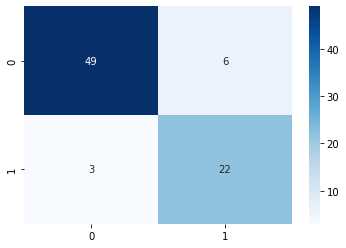

In [190]:
sb.heatmap(confusion_matrix(ypr,ytest),cmap='Blues',annot=True)

In [243]:
prob=log.predict_log_proba(xtest)[:,0]
prob

array([-1.96685065e-01, -3.13851840e-02, -2.86185624e-02, -8.89800829e-02,
       -4.72367532e-03, -4.34067059e-01, -8.15316665e-03, -4.13697106e-01,
       -6.71375700e-01, -1.97305173e-01, -1.58486808e-01, -2.27262680e+00,
       -6.35495557e-01, -9.05049449e-02, -3.64279831e-02, -4.86508791e-01,
       -4.14471685e-01, -3.10293718e-01, -1.38303000e+00, -4.32045167e-01,
       -1.94425404e+00, -1.03307798e-01, -3.00449668e-02, -4.26982385e-02,
       -7.32213973e-01, -3.85623101e-01, -6.14897705e-01, -2.95679537e+00,
       -2.17528879e+00, -3.00449668e-02, -2.98960983e-02, -1.67216519e-02,
       -9.40373428e-01, -2.22985745e-03, -7.35019644e-01, -1.42870067e+00,
       -8.18490726e-01, -2.24638051e+00, -7.99196625e-03, -2.31784849e-01,
       -4.02074056e-01, -4.10172489e-01, -9.02317375e-03, -5.93324677e-02,
       -8.02588258e-02, -1.78785496e-02, -3.73762752e+00, -4.21320121e-01,
       -1.91492387e+00, -2.15337977e-01, -2.51499835e+00, -2.88349575e+00,
       -2.20700575e-01, -

In [252]:
th=0.4
ynew=prob>=th
ynew

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [253]:
ynew=ynew.astype('int')
rnew=accuracy_score(ytest,ynew)
rnew#score reduced for threshold

0.65

#hyperparameterf rolog reg
https://www.youtube.com/watch?v=ay_OcblJasE&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=79

pipelines
https://www.youtube.com/watch?v=xOccYkgRV4Q&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=29

In [96]:
#pipeline on train
df=pd.read_csv('train.csv')
df

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
0           False  
1            True  
2           False  
3           False  
4            True  
...           ...  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True  

[8693 rows x 14 columns]

#decision tree algroithn classification algorithm can be used to predict output columns which are both numerical and cat
#also it can be used to predict output classes >2
#decising are nothing but nested if else condition
https://www.youtube.com/watch?v=IZnno-dKgVQ&t=1380s

entropy=sum(pilogpi) for binakry class entropy 0<=e<=1 note logbase2
for 3 clas min of e is 0 and max e >1

for continuos(numeical) values if two dataset have continous values then kde with less peak has more entropy
decision trees are not affected by scaling

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

C:\Users\2112161\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

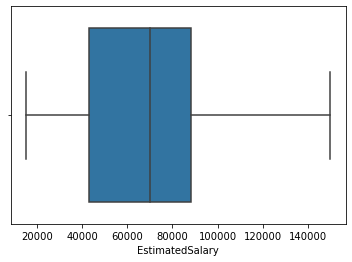

In [3]:
data=pd.read_csv('Social_Network_Ads.csv')
data['Gender']=pd.get_dummies(data['Gender'],drop_first=True)
from sklearn.preprocessing import StandardScaler
x=data[['Gender','Age','EstimatedSalary']] #feature
y=data['Purchased']#target
sns.boxplot(x.EstimatedSalary)

In [142]:
#wtih scaling also the accuracy wont change tried and test
data['Gender']=pd.get_dummies(data['Gender'],drop_first=True)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data['EstimatedSalary'] = scaler.fit_transform(data[['EstimatedSalary']])
x=data[['Gender','Age','EstimatedSalary']] #feature
y=data['Purchased']#target
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)
ytrain.value_counts()

0    199
1    121
Name: Purchased, dtype: int64

In [6]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [7]:
dt.predict(xtest)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [8]:
ydtp=dt.predict(xtest)
r2=accuracy_score(ytest,ydtp)
r2#90+%(but keep in mind it changes everytime doubt y) for imbalanced data set,82.5 for balanced data set u can check

0.9125

In [357]:
#compare with logistic
ypr=log.predict(xtest)
from sklearn.metrics import accuracy_score
r2=accuracy_score(ytest,ypr)
r2#without reimbalance and scaling only

0.9125

[Text(641.3125, 2627.4, 'Age <= 0.654\ngini = 0.47\nsamples = 320\nvalue = [199, 121]\nclass = 0'),
 Text(356.5, 2446.2, 'EstimatedSalary <= 0.61\ngini = 0.311\nsamples = 228\nvalue = [184, 44]\nclass = 0'),
 Text(217.0, 2265.0, 'Age <= -0.11\ngini = 0.082\nsamples = 186\nvalue = [178, 8]\nclass = 0'),
 Text(186.0, 2083.8, 'gini = 0.0\nsamples = 120\nvalue = [120, 0]\nclass = 0'),
 Text(248.0, 2083.8, 'EstimatedSalary <= 0.404\ngini = 0.213\nsamples = 66\nvalue = [58, 8]\nclass = 0'),
 Text(217.0, 1902.6, 'EstimatedSalary <= -0.066\ngini = 0.17\nsamples = 64\nvalue = [58, 6]\nclass = 0'),
 Text(186.0, 1721.4, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]\nclass = 0'),
 Text(248.0, 1721.4, 'EstimatedSalary <= 0.022\ngini = 0.312\nsamples = 31\nvalue = [25, 6]\nclass = 0'),
 Text(217.0, 1540.2, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(279.0, 1540.2, 'Age <= 0.367\ngini = 0.278\nsamples = 30\nvalue = [25, 5]\nclass = 0'),
 Text(217.0, 1359.0, 'Age <= 0.272\ngini = 0.204\n

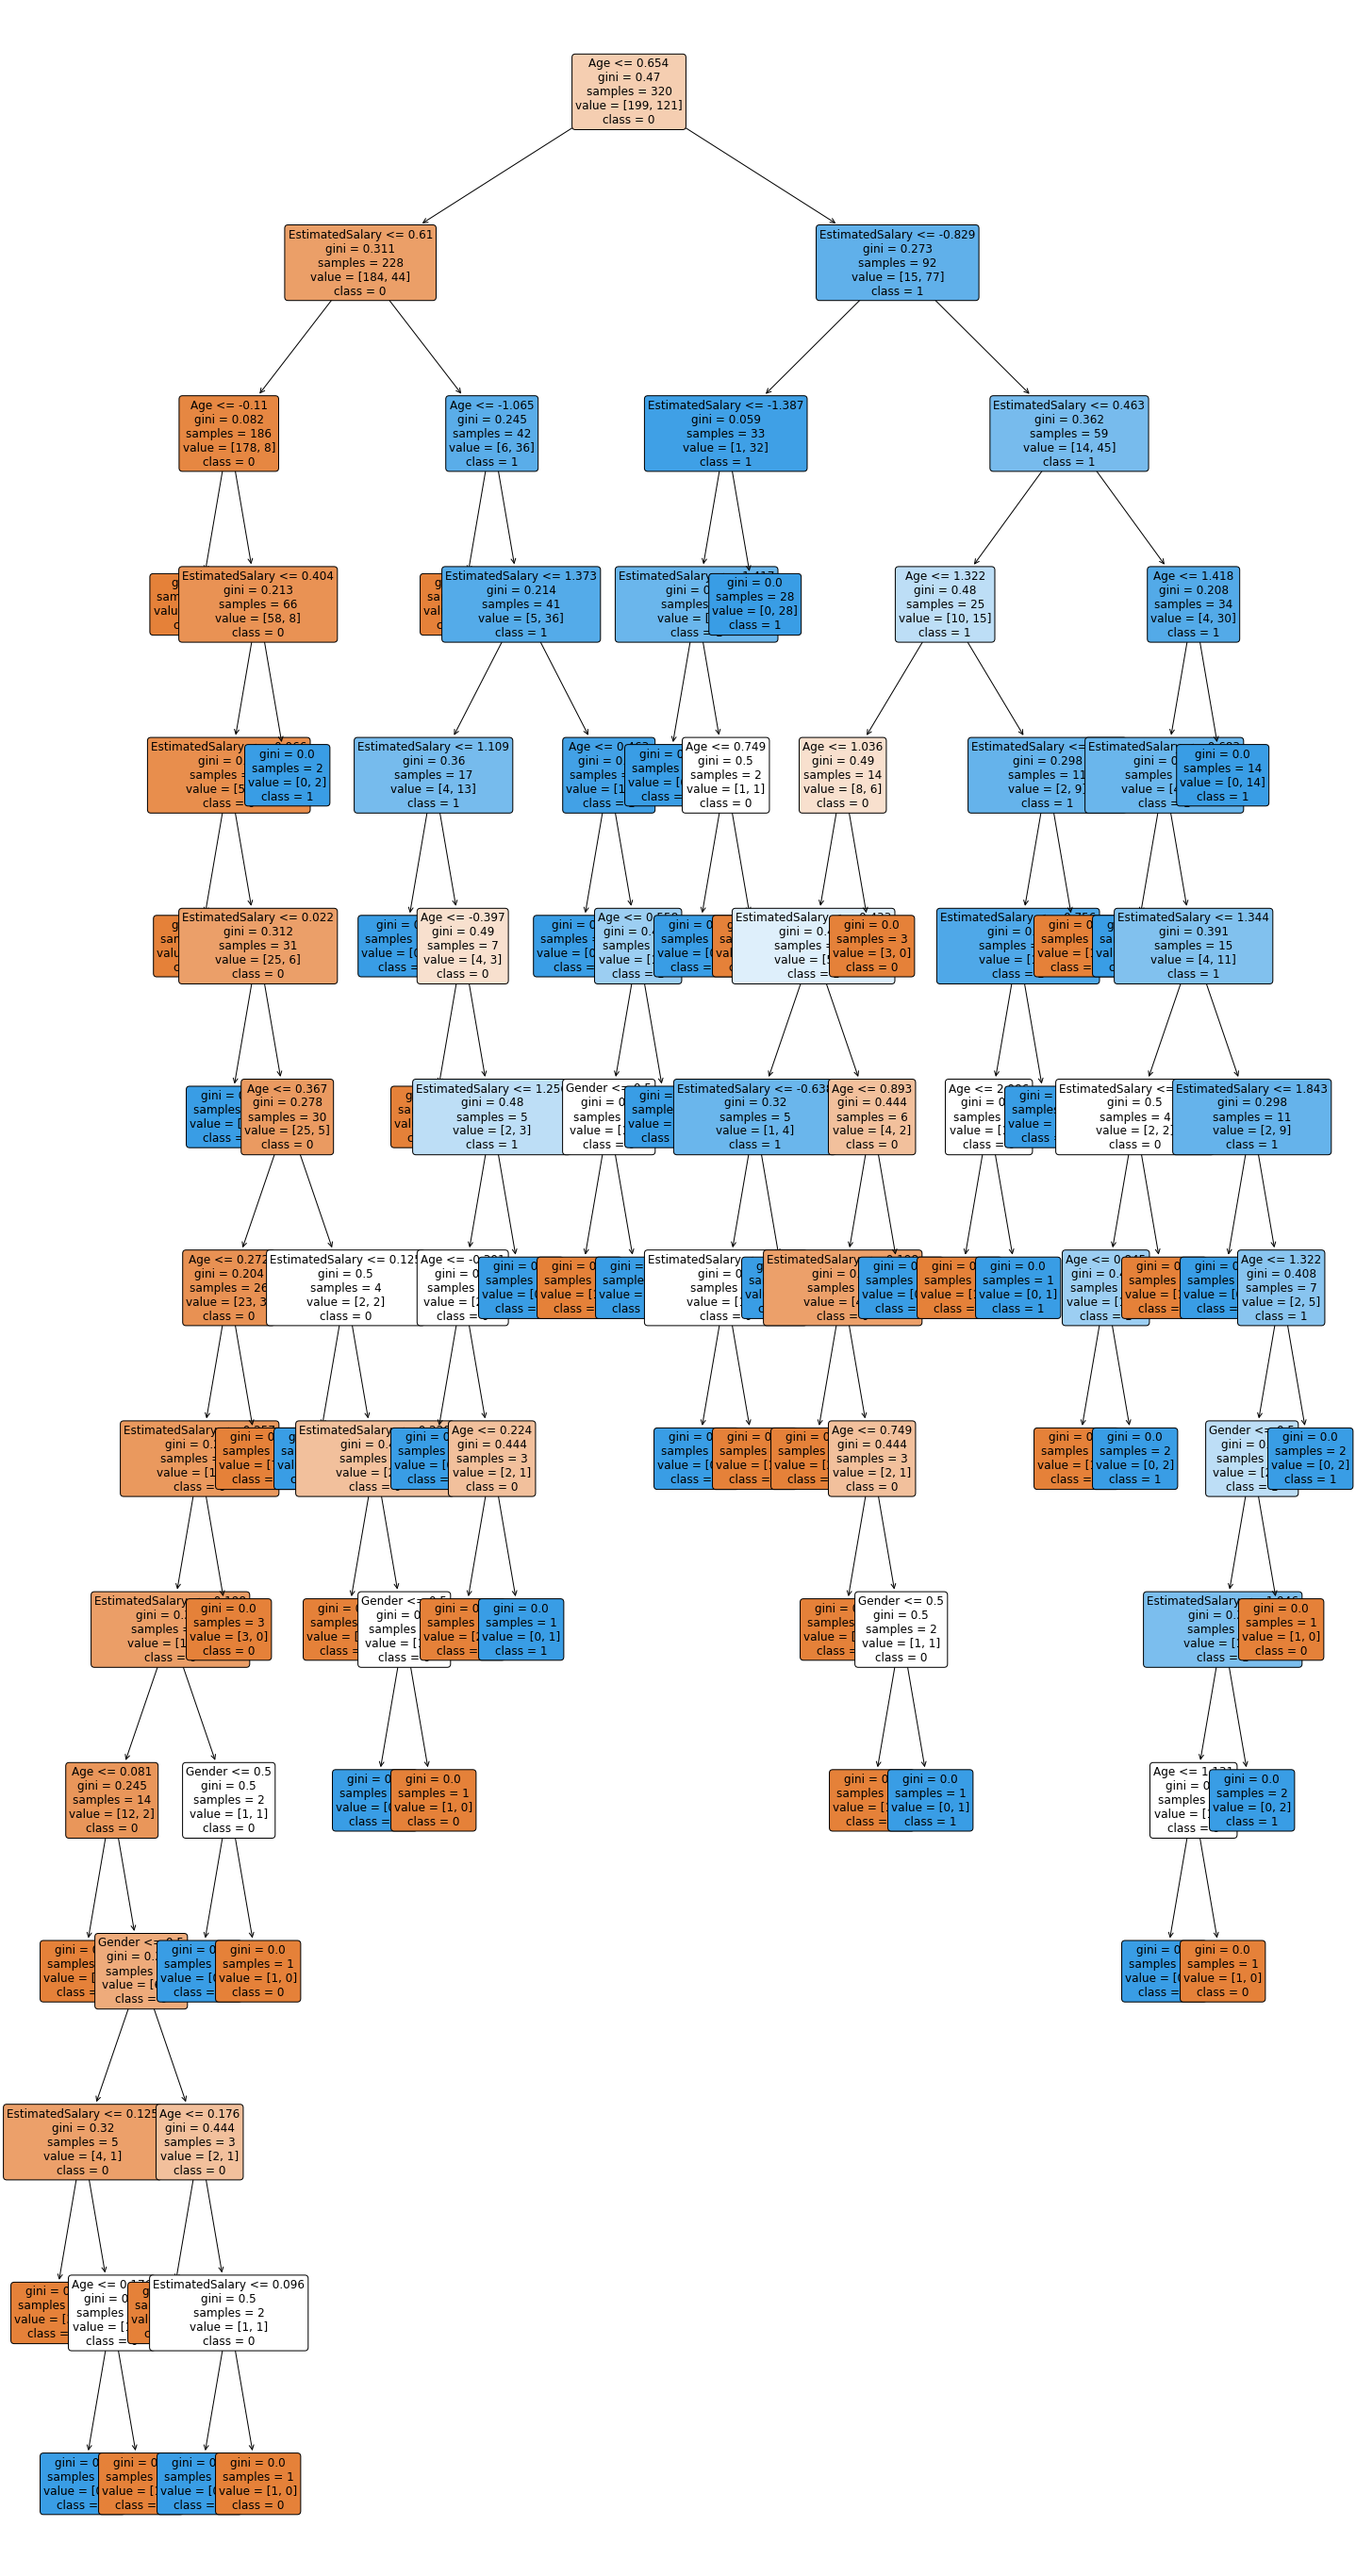

In [45]:
#to plot tree
fig = plt.figure(figsize=(25,50))
from sklearn import tree
tree.plot_tree(dt,filled=True,rounded=True,feature_names=xtrain.columns,class_names=['0','1'],fontsize=12)

as seen above descision tree leads to overfitting so we perform pruning(Chopping) to reduce depth of tree(levels of tree)
1.pre pruning (Done before construction of tree by tuning hyperparameter
2.post pruniing -done after growing tree till max depth (max level) then pruning

In [46]:
#pre pruning

In [50]:
dt1=DecisionTreeClassifier(max_depth=5,criterion='entropy')#criterio is gini index by default we set parameters before construction tree

In [57]:
dt1.fit(xtrain,ytrain)
yt=dt1.predict(xtest)
print('accuracy is',accuracy_score(yt,ytest))

accuracy is 0.95


[Text(596.8990384615385, 2491.5, 'Age <= 0.654\nentropy = 0.957\nsamples = 320\nvalue = [199, 121]\nclass = 0'),
 Text(268.2692307692308, 2038.5, 'EstimatedSalary <= 0.61\nentropy = 0.708\nsamples = 228\nvalue = [184, 44]\nclass = 0'),
 Text(107.3076923076923, 1585.5, 'Age <= -0.11\nentropy = 0.256\nsamples = 186\nvalue = [178, 8]\nclass = 0'),
 Text(53.65384615384615, 1132.5, 'entropy = 0.0\nsamples = 120\nvalue = [120, 0]\nclass = 0'),
 Text(160.96153846153845, 1132.5, 'EstimatedSalary <= -0.066\nentropy = 0.533\nsamples = 66\nvalue = [58, 8]\nclass = 0'),
 Text(107.3076923076923, 679.5, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0]\nclass = 0'),
 Text(214.6153846153846, 679.5, 'EstimatedSalary <= 0.404\nentropy = 0.799\nsamples = 33\nvalue = [25, 8]\nclass = 0'),
 Text(160.96153846153845, 226.5, 'entropy = 0.709\nsamples = 31\nvalue = [25, 6]\nclass = 0'),
 Text(268.2692307692308, 226.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(429.2307692307692, 1585.5, 'Esti

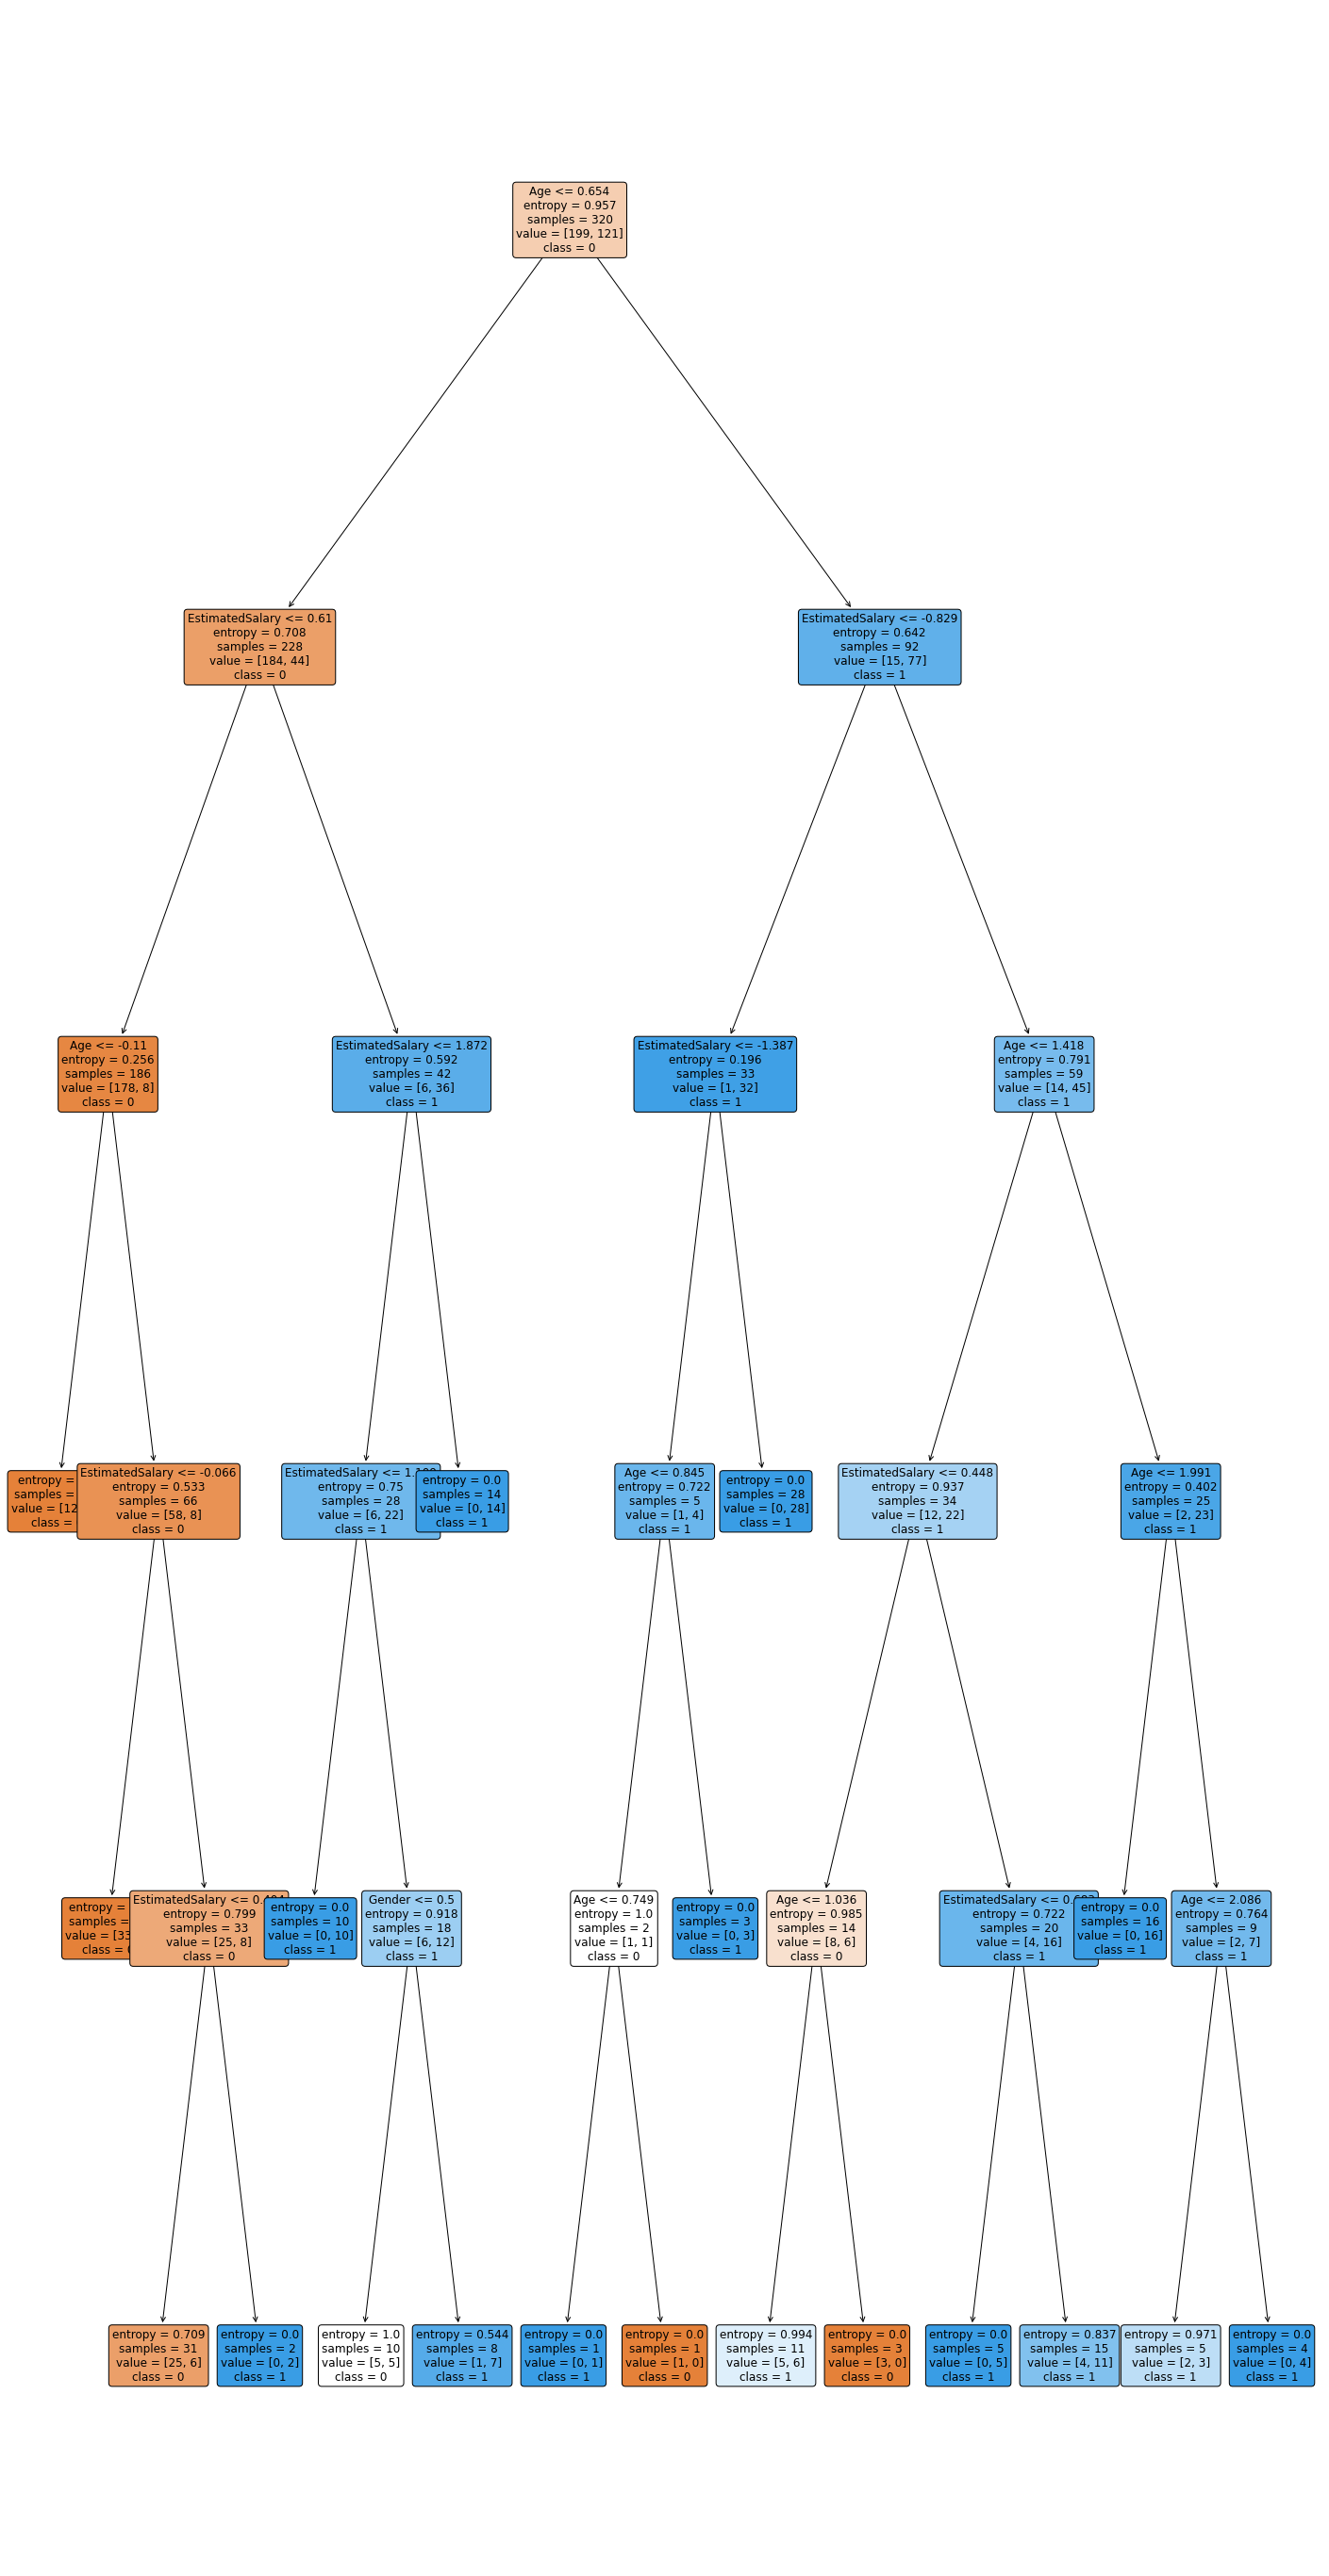

In [54]:
fig = plt.figure(figsize=(25,50))
from sklearn import tree
tree.plot_tree(dt1,filled=True,rounded=True,feature_names=xtrain.columns,class_names=['0','1'],fontsize=12)
#no see we have 5 level and accuracy increased

In [55]:
#same with gini index
dt2=DecisionTreeClassifier(max_depth=5,criterion='gini')#criterio is gini index by default we set parameters before construction tree
dt2.fit(xtrain,ytrain)
yt=dt2.predict(xtest)
print('accuracy is',accuracy_score(yt,ytest))#accuracy is little less

accuracy is 0.9375


[Text(559.2025862068966, 2491.5, 'Age <= 0.654\ngini = 0.47\nsamples = 320\nvalue = [199, 121]\nclass = 0'),
 Text(216.46551724137933, 2038.5, 'EstimatedSalary <= 0.61\ngini = 0.311\nsamples = 228\nvalue = [184, 44]\nclass = 0'),
 Text(96.20689655172414, 1585.5, 'Age <= -0.11\ngini = 0.082\nsamples = 186\nvalue = [178, 8]\nclass = 0'),
 Text(48.10344827586207, 1132.5, 'gini = 0.0\nsamples = 120\nvalue = [120, 0]\nclass = 0'),
 Text(144.31034482758622, 1132.5, 'EstimatedSalary <= 0.404\ngini = 0.213\nsamples = 66\nvalue = [58, 8]\nclass = 0'),
 Text(96.20689655172414, 679.5, 'EstimatedSalary <= -0.066\ngini = 0.17\nsamples = 64\nvalue = [58, 6]\nclass = 0'),
 Text(48.10344827586207, 226.5, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]\nclass = 0'),
 Text(144.31034482758622, 226.5, 'gini = 0.312\nsamples = 31\nvalue = [25, 6]\nclass = 0'),
 Text(192.41379310344828, 679.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(336.7241379310345, 1585.5, 'Age <= -1.065\ngini = 0.245\nsa

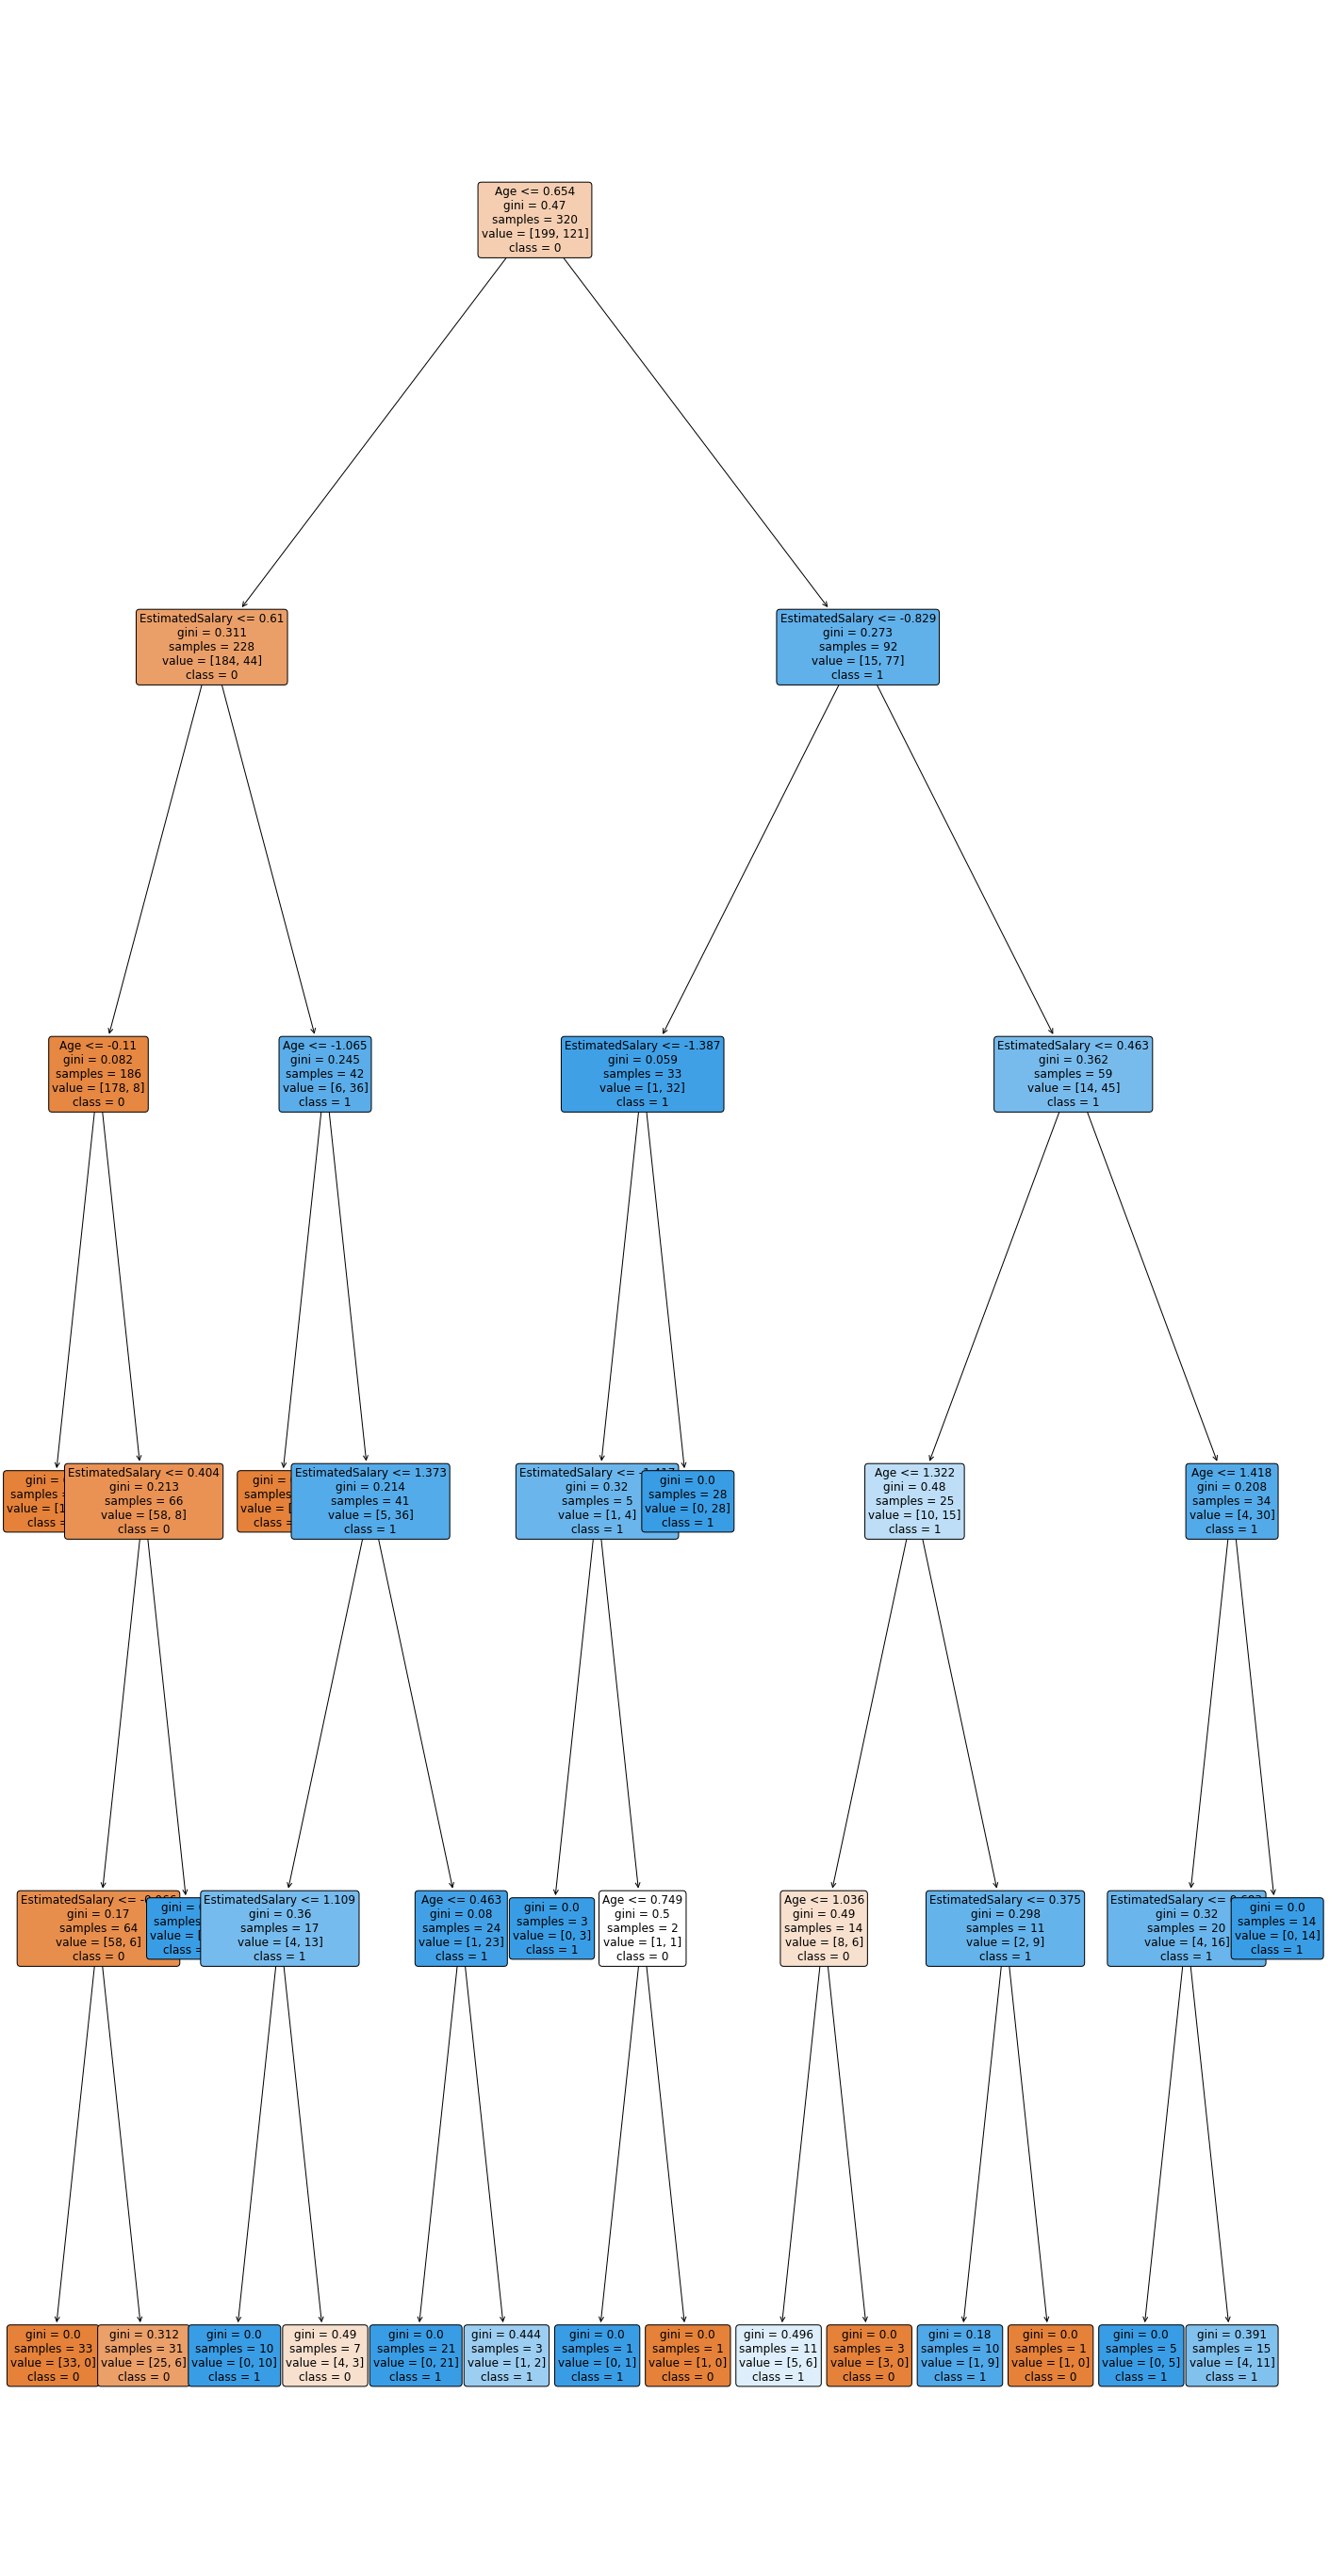

In [56]:
fig = plt.figure(figsize=(25,50))
from sklearn import tree
tree.plot_tree(dt2,filled=True,rounded=True,feature_names=xtrain.columns,class_names=['0','1'],fontsize=12)


In [197]:
#lets underfit the model with less depth
data['Gender']=pd.get_dummies(data['Gender'],drop_first=True)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data['EstimatedSalary'] = scaler.fit_transform(data[['EstimatedSalary']])
x=data[['Gender','Age','EstimatedSalary']] #feature
y=data['Purchased']#target
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)
dt4=DecisionTreeClassifier(max_depth=6,criterion='entropy')#criterio is gini index by default we set parameters before construction tree
dt4.fit(xtrain,ytrain)
yt=dt4.predict(xtest)
print('accuracy is',accuracy_score(yt,ytest))#accuracy is little less

accuracy is 0.9


In [2]:
#post pruning
#post pruning generally used of rsmall data set and large datasets pre pruning cuz ppost pruning will time taking and has overfitting problem
df=sns.load_dataset('iris')
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [3]:
x=df.iloc[:,:-1]
x

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [6]:
y=datasets.load_iris()
y=y.target
x,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=42)#for 0.8 train size and random state 0 100 % accuracy
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
ydtc=dtc.predict(xtest)
accuracy_score(ydtc,ytest)

0.98

[Text(604.5, 504.7714285714286, 'X[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(511.5, 427.11428571428576, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(697.5, 427.11428571428576, 'X[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(465.0, 349.4571428571429, 'X[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(372.0, 271.8, 'X[3] <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(186.0, 194.14285714285717, 'X[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(93.0, 116.48571428571432, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(279.0, 116.48571428571432, 'X[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(186.0, 38.82857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(372.0, 38.82857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(558.0, 194.14285714285717, 'X[2] <= 4.75\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(465.0, 1

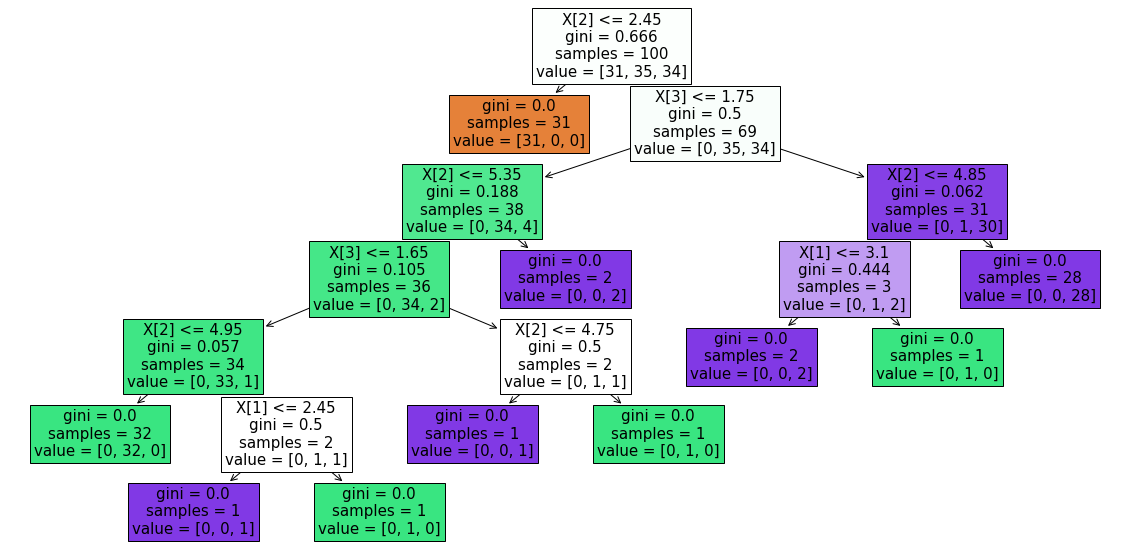

In [8]:
from sklearn import tree
fig = plt.figure(figsize=(20,10))
tree.plot_tree(dtc,filled=True,fontsize=15)

#in above accu is 96 but we can see we dont need to split  for x[2]<=4.85 and x[2]=5.25 
as ratio is high(34,4) and 1,30 so o/p will be mostly based on majority

In [ ]:
#so we can prun to dept of  2

In [250]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=42)
dtc=DecisionTreeClassifier(max_depth=2)
dtc.fit(xtrain,ytrain)
ydtc=dtc.predict(xtest)
accuracy_score(ydtc,ytest)#accuracy increased

0.98

[Text(446.4, 453.0, 'X[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(223.2, 271.8, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(669.5999999999999, 271.8, 'X[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(446.4, 90.59999999999997, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(892.8, 90.59999999999997, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

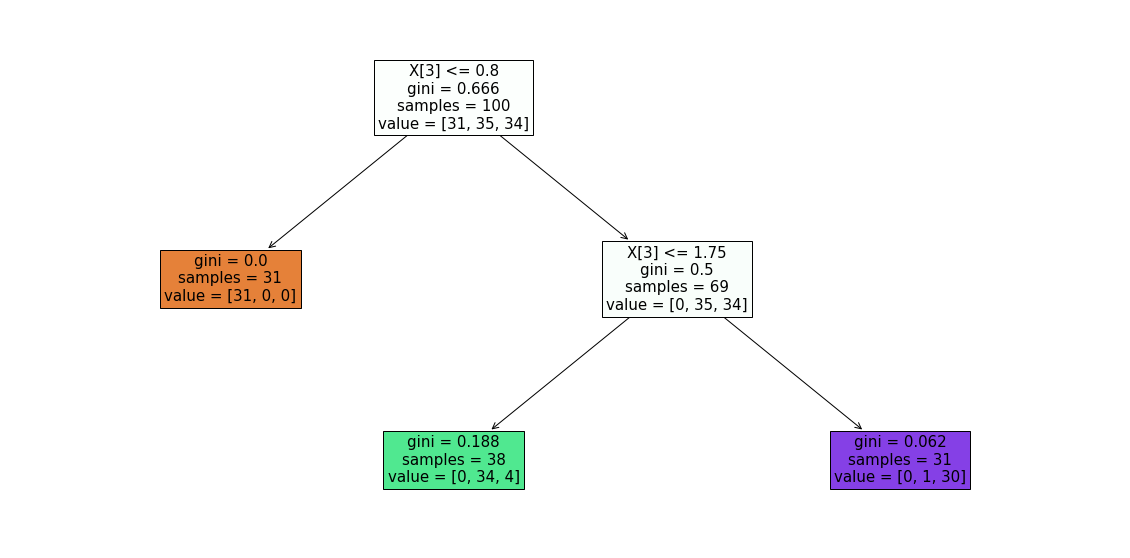

In [251]:
from sklearn import tree
fig = plt.figure(figsize=(20,10))
tree.plot_tree(dtc,filled=True,fontsize=15)

#pre pruning we can try with above data also
https://www.youtube.com/watch?v=mXcPVtbB9pU&list=PLTDARY42LDV7WGmlzZtY-w9pemyPrKNUZ&index=19

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=42)
dtc=DecisionTreeClassifier(min_samples_split=40,min_samples_leaf=20)#min_samples_leaf is min samples to be a leaf node
dtc.fit(xtrain,ytrain)
ydtc=dtc.predict(xtest)
accuracy_score(ydtc,ytest)#accuracy increased

0.98

[Text(446.4, 453.0, 'X[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(223.2, 271.8, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(669.5999999999999, 271.8, 'X[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(446.4, 90.59999999999997, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(892.8, 90.59999999999997, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

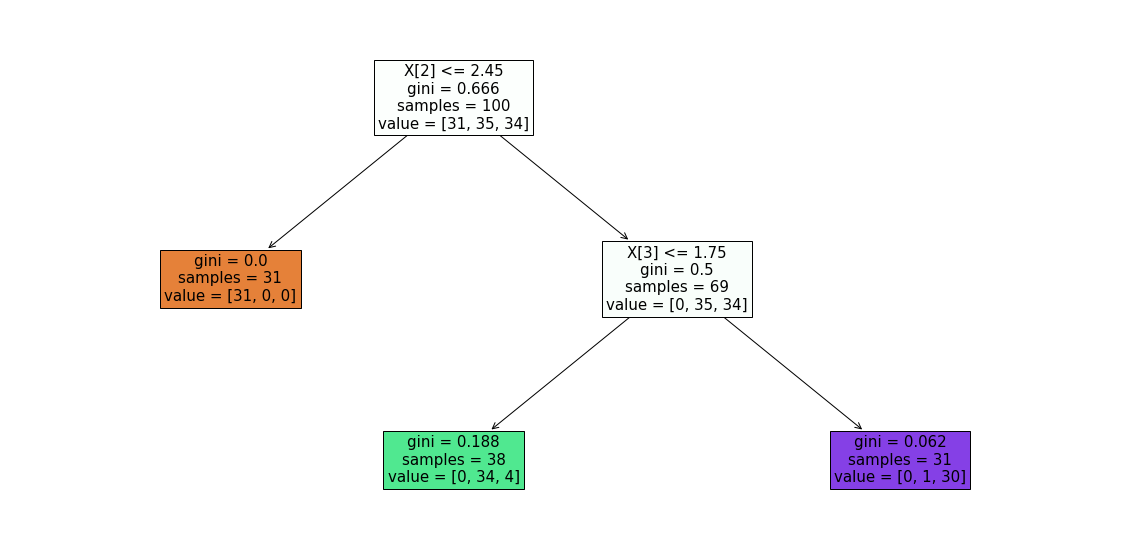

In [31]:
from sklearn import tree
fig = plt.figure(figsize=(20,10))
tree.plot_tree(dtc,filled=True,fontsize=15)

In [20]:
#grid cv si  hyperparameter tuning technique which uses diff combos of parameters and gives the ouput that has best accuracy

In [66]:
#to provide diff parameter combo and must be given as disctionary
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2'],
    }
dth=DecisionTreeClassifier()
dth.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
gcv=GridSearchCV(dth,param_grid=parameter,cv=5,scoring='accuracy')

In [69]:
gcv.fit(xtrain,ytrain)

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 348, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [70]:
gcv.best_params_#tels the best parameters

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'auto',
 'splitter': 'best'}

In [74]:
gcv.predict(xtest)#gcv can be used to predict also

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [75]:
ypr=gcv.predict(xtest)
accuracy_score(ypr,ytest)

0.98

In [76]:
from sklearn.metrics import classification_report# to see accuracy,recal f1 score etc
print(classification_report(ypr,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



#a btr way will be to use gridcv algo but before that understand cross validation
https://www.youtube.com/watch?v=S5NkE-xgx98
k fold CV where entire dataset is divied into k groups/paritions

In [371]:
x=np.random.randint(1,10,size=(10,5))
y=np.random.randint(high=2,low=0,size=(10,1))
data=pd.concat([pd.DataFrame(x),pd.DataFrame(y)],axis=1)
data

0  1  2  3  4  0
0  6  8  5  9  8  0
1  5  3  3  8  5  1
2  2  4  5  9  9  0
3  2  9  6  1  9  1
4  4  4  5  1  4  1
5  4  3  6  8  8  0
6  4  2  8  5  1  1
7  8  7  5  9  6  1
8  1  5  6  6  7  0
9  4  7  5  1  3  1

#we know that if we change randomstate test and training data will change hence accuracy change that complex process
instead we go for k fol validation 

In [372]:
from sklearn.model_selection import KFold
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
k=KNeighborsClassifier(n_neighbors=3)
k.fit(xtrain,ytrain)
ypr=k.predict(xtest)
accuracy_score(ypr,ytest)

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.5

In [373]:
kf=KFold(n_splits=5)
for tr,te in kf.split(x):
    print(tr,te)

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


In [ ]:
#in above every data point in  dataset 'data' is covered atleast once as seen above

In [374]:
data

0  1  2  3  4  0
0  6  8  5  9  8  0
1  5  3  3  8  5  1
2  2  4  5  9  9  0
3  2  9  6  1  9  1
4  4  4  5  1  4  1
5  4  3  6  8  8  0
6  4  2  8  5  1  1
7  8  7  5  9  6  1
8  1  5  6  6  7  0
9  4  7  5  1  3  1

#what if all data in  data are not covered in test data t
then we go for CVScore which followe stratified samplied(ratio is same in test and training data)
means if output in data set is imbalanced(normal k fold drwaback) then after split the ratio of classes in orig dataset
will be same as in training and validation data eg. in output dataset if say 80% class A and 20% class B then in 
train and validation dataset also there will same or almost same  ratio of class A and B 
refer https://www.youtube.com/watch?v=ZnSJgIULMVY

In [375]:

from sklearn.model_selection import cross_val_score
cv=cross_val_score(k,x,y,cv=5,scoring='accuracy')#here parameter cv is same as n_split(like  k fold) as above
cv

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exampl

array([0.5, 1. , 1. , 1. , 0.5])

In [376]:
cv.mean()

0.8

In [377]:
for i in range(1,20):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=i)
    k=KNeighborsClassifier(n_neighbors=3)
    k.fit(xtrain,ytrain)
    ypr=k.predict(xtest)
    #accuracy_score(ypr,ytest)
    cv=cross_val_score(k,x,y,cv=5,scoring='accuracy')
    print(i,cv.mean())
    

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exampl

1 0.8
2 0.8
3 0.8
4 0.8
5 0.8
6 0.8
7 0.8


C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exampl

8 0.8
9 0.8
10 0.8
11 0.8
12 0.8
13 0.8
14 0.8
15 0.8
16 0.8
17 0.8
18 0.8
19 0.8


C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exampl

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=i)
data=datasets.load_iris()
x=data.data
y=data.target

In [387]:
data=datasets.load_iris()
x=data.data
y=data.target
z=[]
for i in range(1,100):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=i)
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(xtrain,ytrain)
    ypr=k.predict(xtest)
    #accuracy_score(ypr,ytest)
    cv=cross_val_score(k,x,y,cv=10,scoring='accuracy')
    z.append(cv.mean())
#this loop to chekc for which k neighbuor val acuracy is max

In [388]:
np.max(z),np.argmax(z)#so for neighbour=12 n_negihbour i mean accuracy is 12 there are more also

(0.9800000000000001, 12)

In [390]:
data=datasets.load_iris()
x=data.data
y=data.target
z=[]
for i in range(1,20):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=i)
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(xtrain,ytrain)
    ypr=k.predict(xtest)
    #accuracy_score(ypr,ytest)
    cv=cross_val_score(k,x,y,cv=10,scoring='accuracy')
    print(i,cv.mean())
#this loop to chekc for which k neighbuor val acuracy is max

1 0.96
2 0.9533333333333334
3 0.9666666666666666
4 0.9666666666666666
5 0.9666666666666668
6 0.9666666666666668
7 0.9666666666666668
8 0.9666666666666668
9 0.9733333333333334
10 0.9666666666666668
11 0.9666666666666668
12 0.9733333333333334
13 0.9800000000000001
14 0.9733333333333334
15 0.9733333333333334
16 0.9733333333333334
17 0.9733333333333334
18 0.9800000000000001
19 0.9733333333333334


In [383]:
#for imbalance data sets k fold validation wont work as it may get biased


Y    0.85
N    0.15
Name: e, dtype: float64

In [412]:
df=pd.read_csv('income.csv')
df.rename(columns={' income':'income'},inplace=True)
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       'income'],
      dtype='object')

In [413]:
df.income.value_counts(normalize=True)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

In [464]:
x1=df.drop(columns='income')
y1=df.drop(columns=x1.columns)
y1

income
0       <=50K
1       <=50K
2       <=50K
3       <=50K
4       <=50K
...       ...
32556   <=50K
32557    >50K
32558   <=50K
32559   <=50K
32560    >50K

[32561 rows x 1 columns]

In [470]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,train_size=0.8,random_state=9013)
ytrain.value_counts(normalize=True)#so still aftre split there's bias we can lead to overfitting

income
 <=50K    0.758177
 >50K     0.241823
dtype: float64

In [479]:
k=KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
k.fit(xtrain,ytrain)
cross_val_score(k,x1,y1,cv=5,scoring='accuracy')#nan cuz need to convert input to numbers(encode)

ValueError: could not convert string to float: ' ?'

In [478]:
k=KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
cross_val_score(k,x1,y1,cv=5,scoring='r2')

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 363, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr",
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  Fil

array([nan, nan, nan, nan, nan])

age          workclass   fnlwgt    education   education-num  \
0       39          State-gov    77516    Bachelors              13   
1       50   Self-emp-not-inc    83311    Bachelors              13   
2       38            Private   215646      HS-grad               9   
3       53            Private   234721         11th               7   
4       28            Private   338409    Bachelors              13   
...    ...                ...      ...          ...             ...   
32556   27            Private   257302   Assoc-acdm              12   
32557   40            Private   154374      HS-grad               9   
32558   58            Private   151910      HS-grad               9   
32559   22            Private   201490      HS-grad               9   
32560   52       Self-emp-inc   287927      HS-grad               9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex   capital-gain   capital-loss   hours-per-week  native-country  
0         Male           2174              0               40   United-States  
1         Male              0              0               13   United-States  
2         Male              0              0               40   United-States  
3         Male              0              0               40   United-States  
4       Female              0              0               40            Cuba  
...        ...            ...            ...              ...             ...  
32556   Female              0              0               38   United-States  
32557     Male              0              0               40   United-States  
32558   Female              0              0               40   United-States  
32559     Male              0              0               20   United-States  
32560   Female          15024              0               40   United-States  

[32561 rows x 14 columns]

In [289]:
dd=pd.DataFrame(data=np.arange(1,101).reshape(20,5),columns=['a','b','c','d','e'])
dd['e'][:17]='Y'
dd['e'][17:]='N'
dd.e.value_counts(normalize=True)#imbalance data set
#ignore this got to below cell

Y    0.85
N    0.15
Name: e, dtype: float64

In [290]:
x=dd.drop(columns='e')
y=dd.drop(columns=x.columns)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)
ytrain.value_counts(normalize=True)#so still aftre split there's bias we can lead to overfitting

e
Y    0.9375
N    0.0625
dtype: float64

In [431]:
x=dd.drop(columns='e')
y=dd.drop(columns=x.columns)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=100,stratify=y)
ytrain.value_counts(normalize=True)#now see almost same as orig split even if u change the random state
#another way is also using startify class

e
Y    0.875
N    0.125
dtype: float64

In [432]:
from sklearn.model_selection import StratifiedKFold
sk=StratifiedKFold(n_splits=5)#its Stratified K-Folds cross-validator.
for i,j in sk.split(dd,y):
    print(i.shape,j.shape)

(16,) (4,)
(16,) (4,)
(16,) (4,)
(16,) (4,)
(16,) (4,)


C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [436]:
from sklearn.model_selection import StratifiedKFold
sk=StratifiedKFold(n_splits=5)#its Stratified K-Folds cross-validator.
for i,j in sk.split(X=dd,y=y):
    print(i,j)
   

[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 2 3]
[ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19] [4 5 6 7]
[ 0  1  2  3  4  5  6  7 11 12 13 14 15 16 18 19] [ 8  9 10 17]
[ 0  1  2  3  4  5  6  7  8  9 10 14 15 16 17 19] [11 12 13 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 17 18] [14 15 16 19]


C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [457]:
from sklearn.model_selection import StratifiedKFold
sk=StratifiedKFold(n_splits=5)#its Stratified K-Folds cross-validator.
k=1
for i,j in sk.split(X=dd,y=y):
    tr=dd.iloc[i]#to see the train test split
    te=dd.iloc[j]
    print('training split for iteration {} is {}',k,end='\n')
    print(tr,end='\n')
    print('ratio is {}',tr.e.value_counts(normalize=True),end='\n')
    print('test split for iteration {} is {}',k,end='\n')
    print(te,end='\n')
    print('ratio is{}',te.e.value_counts(normalize=True),end='\n')
    k+=1

training split for iteration {} is {} 1
     a   b   c   d  e
4   21  22  23  24  Y
5   26  27  28  29  Y
6   31  32  33  34  Y
7   36  37  38  39  Y
8   41  42  43  44  Y
9   46  47  48  49  Y
10  51  52  53  54  Y
11  56  57  58  59  Y
12  61  62  63  64  Y
13  66  67  68  69  Y
14  71  72  73  74  Y
15  76  77  78  79  Y
16  81  82  83  84  Y
17  86  87  88  89  N
18  91  92  93  94  N
19  96  97  98  99  N
ratio is {} Y    0.8125
N    0.1875
Name: e, dtype: float64
test split for iteration {} is {} 1
    a   b   c   d  e
0   1   2   3   4  Y
1   6   7   8   9  Y
2  11  12  13  14  Y
3  16  17  18  19  Y
ratio is{} Y    1.0
Name: e, dtype: float64
training split for iteration {} is {} 2
     a   b   c   d  e
0    1   2   3   4  Y
1    6   7   8   9  Y
2   11  12  13  14  Y
3   16  17  18  19  Y
8   41  42  43  44  Y
9   46  47  48  49  Y
10  51  52  53  54  Y
11  56  57  58  59  Y
12  61  62  63  64  Y
13  66  67  68  69  Y
14  71  72  73  74  Y
15  76  77  78  79  Y
16  81  82  83 

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [453]:
tr.e.value_counts(normalize=True)#see we get almost same split as orig data split

Y    0.875
N    0.125
Name: e, dtype: float64

In [454]:
te.e.value_counts(normalize=True)#its not samepl but ideology if ratio of y is high in training then ratio of y is high in test data
#also this techinque is not perfoect but almost perfect as seen in training data we get almost same ration

Y    0.75
N    0.25
Name: e, dtype: float64

In [463]:
cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. ])

In [462]:
cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy').mean()

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.95

In [394]:
#cv score can be applied to regression also having doubt in this
df=pd.read_csv('Salary_Data.csv')
df

YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

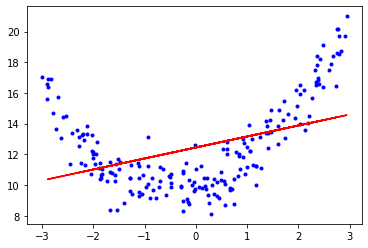

In [12]:
#polynomial regression
a=6 * np.random.rand(200, 1) - 3
b=0.9* a**2 + 0.8 *a + 10 +  np.random.randn(200, 1)
lr=LinearRegression()
xtrain,xtest,ytrain,ytest=train_test_split(a,b,random_state=0,test_size=0.2)
lr.fit(xtrain,ytrain)
plt.plot(a,b,'b.')
plt.plot(xtest,lr.predict(xtest),'r')
plt.show()

In [13]:
r2_score(lr.predict(xtest),ytest)#very poor

-4.050133552581609

In [14]:
poly=PolynomialFeatures(degree=2)
xtr=poly.fit_transform(xtrain)
xte=poly.transform(xtest)
lr=LinearRegression()
lr.fit(xtr,ytrain)



LinearRegression()

In [15]:
r2_score(lr.predict(xte),ytest)# accuracy increased  after polynomial and r2,mae and mse score must be close to 0

0.8671446303510505

In [138]:
print(lr.coef_)
print(lr.intercept_)
#almost same as above

[[0.         0.84748391 0.91393677]]
[9.85364413]


In [ ]:
#nowlets plot polynomial reg 


ypr=lr.predict(xte)
min(ypr),max(ypr)#plotting this wont work as range is more than range or test and training points

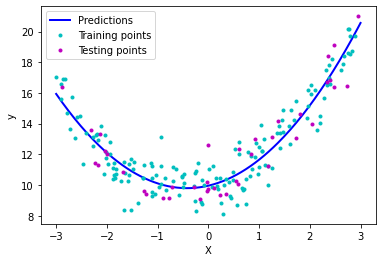

In [16]:

poly=PolynomialFeatures(degree=2)
xtr=poly.fit_transform(xtrain)
xte=poly.transform(xtest)
lr=LinearRegression()
lr.fit(xtr,ytrain)
xn=np.linspace(-3, 3, 200).reshape(200,1)
xnp = poly.transform(xn)
ynp = lr.predict(xnp)
plt.plot(xn, ynp, "b-", linewidth=2, label="Predictions")
plt.plot(xtrain, ytrain, "c.",label='Training points')
plt.plot(xtest, ytest, "m.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [17]:
r2_score(lr.predict(xte),ytest)# accuracy increased  after polynomial for degree=2

0.8671446303510505

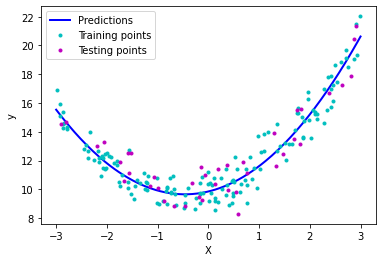

0.8800037020051273

In [199]:
#lets visualize using a func
def polyregplot(n):
    poly=PolynomialFeatures(degree=n)
    xtr=poly.fit_transform(xtrain)
    xte=poly.transform(xtest)
    lr=LinearRegression()
    lr.fit(xtr,ytrain)
    xn=np.linspace(-3, 3, 200).reshape(200,1)
    xnp = poly.transform(xn)
    ynp = lr.predict(xnp)
    plt.plot(xn, ynp, "b-", linewidth=2, label="Predictions")
    plt.plot(xtrain, ytrain, "c.",label='Training points')
    plt.plot(xtest, ytest, "m.",label='Testing points')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    score=r2_score(lr.predict(xte),ytest)
    return score
    
polyregplot(2)

In [217]:
a=[]
for i in range(600):
    poly=PolynomialFeatures(degree=i)
    xtr=poly.fit_transform(xtrain)
    xte=poly.transform(xtest)
    lr=LinearRegression()
    lr.fit(xtr,ytrain)
    score=r2_score(lr.predict(xte),ytest)
    a.append(score)
   
    

In [218]:
np.max(a),np.argmax(a)#i chose 650 aboe as was getting error due to large values

(0.8857238885709461, 8)

In [37]:
#lets check randomforest for above dataset
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
rf.predict(xtest)

C:\Users\2112161\AppData\Local\Temp\6/ipykernel_9736/3364343206.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


array([10.39856199, 15.17451866, 17.56616446, 16.89788813, 12.778518  ,
       15.99528626, 13.49618635, 10.61880088,  9.91143169, 15.12380041,
       11.99104012, 10.61880088, 10.07812661, 11.00384179, 11.01747992,
       10.53077266, 12.73970272, 16.67547548,  9.44464781, 11.05099017,
       10.53724125, 16.86669746, 13.54356742, 10.61880088, 10.6368802 ,
        9.95483093, 10.50012305, 19.18286498, 10.8497102 , 10.12523199,
       17.45072523, 13.24085085, 13.14323349, 11.97453507, 19.38173741,
       17.56616446, 11.5422422 , 10.02301933, 11.64028768,  9.91531162])

In [38]:
r2_score(rf.predict(xtest),ytest)

0.8378995342466546

In [45]:
rf.fit(xtr,ytrain)


C:\Users\2112161\AppData\Local\Temp\6/ipykernel_9736/3863241434.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtr,ytrain)


RandomForestRegressor()

In [46]:
r2_score(rf.predict(xte),ytest)#little btr

0.843888608354731

In [238]:
dt=DecisionTreeRegressor()
dt.fit(xtr,ytrain)
r2_score(dt.predict(xte),ytest)#lower

0.8215277107320053

In [316]:
p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':[1],
               'criterion':['mse','mae'],
               'bootstrap':[True,False],
               'min_samples_leaf':np.arange(1,10),
              }

In [319]:

rf.fit(xtrain,ytrain)
rcv=RandomizedSearchCV(rf,param_distributions=p_dist,cv=5,n_jobs=-1,scoring='r2',verbose=1)

C:\Users\2112161\AppData\Local\Temp\5/ipykernel_21376/2363039628.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


In [320]:
rcv.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': [1],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500]},
                   scoring='r2', verbose=1)

In [327]:
rcv.best_params_

{'n_estimators': 500,
 'min_samples_leaf': 3,
 'max_features': 1,
 'max_depth': None,
 'criterion': 'mae',
 'bootstrap': True}

In [322]:
rcv.best_score_

0.8733691126401444

In [ ]:
rcv.cv

In [323]:

rf.fit(xtrain,ytrain)
gcv=GridSearchCV(rf,param_grid=p_dist,cv=5,n_jobs=-1,scoring='r2')

C:\Users\2112161\AppData\Local\Temp\5/ipykernel_21376/2711462317.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


In [324]:
    gcv.fit(xtrain,ytrain)

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_depth': [3, 5, 10, None], 'max_features': [1],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [10, 100, 200, 300, 400, 500]},
             scoring='r2')

In [326]:
print(gcv.best_params_)
print(gcv.best_score_)#little increased

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 3, 'n_estimators': 10}
0.8792010547914355


In [417]:
b=datasets.load_boston()#regression dat set for cv score
x=b.data
y=b.target
l=LinearRegression(normalize=True)
#l.fit(xtrain,ytrain)
#ypr=l.predict(xtest)
    #accuracy_score(ypr,ytest)
cv=cross_val_score(l,x,y,cv=10,scoring='r2')
print(cv)#so lin reg is not suitable for this data set may be polynomial reg or decision tree

[ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]


In [418]:
cv.mean()#for above

0.20252899006056452

In [421]:
b=datasets.load_boston()
x=b.data
y=b.target
l=LinearRegression(normalize=True)
d=DecisionTreeClassifier()
cv1=cross_val_score(l,x,y,cv=10,scoring='r2')
cv2=cross_val_score(d,x,y,cv=10,scoring='accuracy')#in this way we dont do we use grid CV
print(cv2)

[nan nan nan nan nan nan nan nan nan nan]


C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 191, in fit
    check_classification_targets(y)
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\2112161\Anaconda3\lib\

In [198]:
#above was classifier tree
#let look at tree regressor

# regression tree
https://www.youtube.com/watch?v=uHq0I_MDVZU&list=PLTDARY42LDV7WGmlzZtY-w9pemyPrKNUZ&index=20
jus like we use information gain entropy or gini nidex t oclassfication to decide the split,
in pregression we use variance reduction to decide the split,the feature or tree with high variance reduction will be split
variance reduction depends on variance(MSE) of each tree formed
when new data point comes in then output will be average of data point in that leaf node

In [3]:
data=pd.read_csv('Salary_Data.csv')
data

YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

In [4]:
x=data[['YearsExperience']]
y=data.Salary

In [5]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [127]:
dtl=DecisionTreeRegressor()
dtl.fit(xtrain,ytrain)
dtl.predict(xtest)

array([116969.,  66029., 101302.,  66029.,  54445.,  63218.])

In [128]:
yl=dtl.predict(xtest)
accuracy_score(yl,ytest)

0.0

In [129]:
confusion_matrix(yl,ytest)

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]], dtype=int64)

In [153]:
le=LinearRegression()
le.fit(xtrain,ytrain)
cv=cross_val_score(dtl,x,y,cv=10,scoring='r2')
cv

array([-0.43814098,  0.67452225, -0.55012099, -0.30412916, -3.44171152,
        0.5777931 , -0.81158833,  0.05697215, -0.30732518, -0.19854992])

In [154]:
cv.mean()

-0.4742278593628778

In [141]:
le.predict(xtest)


array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [142]:
r2_score(le.predict(xtest),ytest)

0.8961838737587328

In [156]:
cv=cross_val_score(le,x,y,cv=10,scoring='r2')
cv

array([-1.75932978e+00,  5.93221951e-01, -1.63675352e+00, -1.75684368e+00,
       -1.63448389e+01,  2.29574760e-01, -6.44465338e-01, -3.73209809e-01,
        5.02285127e-01,  6.75258422e-03])

In [147]:
dtl.predict(xtest)

array([116969.,  66029., 101302.,  66029.,  54445.,  63218.])

In [148]:
r2_score(dtl.predict(xtest),ytest)#for regression tree above dataset has poor performance lets tune it

0.8057721911345299

In [6]:
parameter={
'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':list(np.arange(2,20)),
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [7]:
dtl2=DecisionTreeRegressor()
dtlcv=GridSearchCV(dtl2,param_grid=parameter,cv=5,scoring='r2')
dtlcv.fit(xtrain,ytrain)

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 351, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [8]:
dtlcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 19,
 'max_features': 'log2',
 'splitter': 'random'}

In [9]:
dtlcv.best_score_#for above param got best score for training data set not test data(here it used validataion+training data)

0.9419048895549537

In [11]:
dtlcv.cv_results_['params']#paramters taken

[{'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 'auto',
  'splitter': 'best'},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 'auto',
  'splitter': 'random'},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 'sqrt',
  'splitter': 'best'},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 'sqrt',
  'splitter': 'random'},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 'log2',
  'splitter': 'best'},
 {'criterion': 'squared_error',
  'max_depth': 2,
  'max_features': 'log2',
  'splitter': 'random'},
 {'criterion': 'squared_error',
  'max_depth': 3,
  'max_features': 'auto',
  'splitter': 'best'},
 {'criterion': 'squared_error',
  'max_depth': 3,
  'max_features': 'auto',
  'splitter': 'random'},
 {'criterion': 'squared_error',
  'max_depth': 3,
  'max_features': 'sqrt',
  'splitter': 'best'},
 {'criterion': 'squared_error',
  'max_depth': 3,
  'max_features': 'sqrt',
  'splitter': 'random'},


In [13]:
#convert results into datafram
gridres=pd.DataFrame(dtlcv.cv_results_['params'])
gridres#list of combos tried

criterion  max_depth max_features splitter
0    squared_error          2         auto     best
1    squared_error          2         auto   random
2    squared_error          2         sqrt     best
3    squared_error          2         sqrt   random
4    squared_error          2         log2     best
..             ...        ...          ...      ...
427        poisson         19         auto   random
428        poisson         19         sqrt     best
429        poisson         19         sqrt   random
430        poisson         19         log2     best
431        poisson         19         log2   random

[432 rows x 4 columns]

In [184]:
dtlcv.predict(xtest)

array([116969.,  61111., 109431.,  66029.,  54445.,  54445.])

In [185]:
r2_score(dtlcv.predict(xtest),ytest)#if u keep runnig grid cv the score changes again before it was 80 now 88

0.8804012910960669

In [187]:
#run for cv=10
dtl2=DecisionTreeRegressor()
dtlcv=GridSearchCV(dtl2,param_grid=parameter,cv=10,scoring='r2')
dtlcv.fit(xtrain,ytrain)

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 351, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [188]:
dtlcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'random'}

In [192]:
dtlcv.best_score_

-2.7088773630164

In [199]:
r2_score(dtlcv.predict(xtest),ytest)

0.861885997916564

In [200]:
mean_squared_error(dtlcv.predict(xtest),ytest)

85323828.0

#another alogo is randomsearchCV
https://www.youtube.com/watch?v=HdlDYng8g9s&t=618s

In [17]:

dtl3=DecisionTreeRegressor()
rcv=RandomizedSearchCV(dtl3,param_distributions=parameter,cv=5,scoring='r2')
rcv.fit(xtrain,ytrain)

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 351, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'splitter': ['best', 'random']},
                   scoring='r2')

In [18]:
rcv.best_params_

{'splitter': 'random',
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'poisson'}

In [19]:
rcv.best_score_

0.900828966611954

In [21]:
randres=pd.DataFrame(rcv.cv_results_['params'])
randres#so it didnt check all combos only random 10 combos from all combos from gridcv 10 cobos cuz default 10 iteration

splitter max_features  max_depth       criterion
0     best         auto         16   squared_error
1   random         log2          6  absolute_error
2   random         sqrt          8         poisson
3     best         auto         14  absolute_error
4   random         log2          9  absolute_error
5   random         sqrt         12         poisson
6     best         auto         15  absolute_error
7     best         auto          2   squared_error
8     best         auto         16  absolute_error
9   random         sqrt         10   squared_error

In [208]:
rcv.predict(xtest)

array([116969.,  66029., 101302.,  66029.,  54445.,  63218.])

In [210]:
r2_score(rcv.predict(xtest),ytest)

0.8057721911345299

In [209]:
mean_squared_error(rcv.predict(xtest),ytest)

101047709.83333333

In [211]:
mean_absolute_error(rcv.predict(xtest),ytest)

8640.166666666666

In [26]:

dtl3=DecisionTreeRegressor()
rcv=RandomizedSearchCV(dtl3,param_distributions=parameter,cv=5,scoring='r2',n_iter=5)#no of iterarion to 5
rcv.fit(xtrain,ytrain)

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 351, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=5,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'splitter': ['best', 'random']},
                   scoring='r2')

In [27]:
randres=pd.DataFrame(rcv.cv_results_['params'])
randres#only 5 combos

splitter max_features  max_depth      criterion
0   random         log2         14        poisson
1     best         auto          7   friedman_mse
2     best         auto         15  squared_error
3     best         sqrt         14  squared_error
4   random         log2          7   friedman_mse

In [28]:
rcv.best_score_

0.8954019320962863

In [29]:
rcv.best_params_

{'splitter': 'best',
 'max_features': 'auto',
 'max_depth': 7,
 'criterion': 'friedman_mse'}

best model selection https://www.youtube.com/watch?v=Bcw8S449QW4&t=12s

In [55]:
x1=x.copy()
sc=StandardScaler()
x1=sc.fit_transform(x)
y1=y.to_frame().copy()
y1=sc.fit_transform(y1)

cvs=cross_val_score(dtl3,xtrain,ytrain,cv=10,scoring='r2')
cvs

array([ 9.93154301e-01,  8.18406218e-01, -1.49731029e+01,  9.51418333e-01,
        9.85447812e-01,  1.37335420e-02,  8.06883230e-01,  8.91781723e-01,
       -2.74092491e+01,  7.01362141e-01])

In [56]:
cvs.mean()#doubt here in grid cv and randomcv results are diff but cross score is doff

-3.622016468720992

In [65]:
l=LinearRegression()
cvs1=cross_val_score(dtl3,x1,y1,cv=10,scoring='r2')
cvs1


array([-0.43814098,  0.67452225, -0.55012099, -0.30412916, -3.44171152,
        0.5777931 , -0.81158833,  0.05697215, -0.30732518, -0.19854992])

In [66]:
cvs1.mean ()#same with linear regression same doubt

-0.47422785936287803

In [73]:
kk=KNeighborsClassifier()
cvs1=cross_val_score(kk,xtrain,ytrain,cv=2,scoring='r2')
cvs1


ValueError: n_splits=2 cannot be greater than the number of members in each class.

#randomforest
https://www.youtube.com/watch?v=bHK1fE_BUms&list=PLKnIA16_RmvZyqP3WGUo7iVziIIea_1bp
its a type of ensemble learning where this model is actually collection of multiple ML models
each of those ML models can be different or same (i.e same algo or diff algo)
eg. one scenario can be 
1.diff models with same data
2.same model diff data
3.diff model diff data
for classification(for final predicted value majority  is taken)
for regression mean is taken eg if 3 model say output will be 1,2 and 3 and final predicted value is mean of 1,2,3 i.e 2


types of ensemble learning
a.voting(based on 1(See above)
b.bagging (used in random forest): bagging full form is bootstrapped aggregation it is based on 2 or 1(See above)
here we randomly select 'n' data points(using bootstrapped sampling) from dataset and feed to each model but each time dataset fed to model will bediff cuz again we seelct random n data point and feed to another model
random forest is collect or decision with diff data
bootstrap sampling types are
a.row sampling
b.column sampling
c.combined sampling(row+col sampling)
all these 3 above can be given With or without replacement
note:these samples are taken randomly and the sameples provided to each model is given using(row sampling+column sampling)
also refer https://www.youtube.com/watch?v=F9uESCHGjhA&list=PLKnIA16_RmvZyqP3WGUo7iVziIIea_1bp&index=2


c.boosting(most powerful ML algo has series of models also callked weak learners)
same as baggin jus diff that model 1 is feed with data it notes the error and send those errors made to next model
next model again improves the error rate and feeds to next model and so on..
boosting is extension of bagging
types are 
adaboost
xgboost
gradientboost etc
refer https://www.youtube.com/watch?v=hpT7dYsghjM&list=PLuBhMCi3ZJYk8R8OwfVSZYBJmL_qhVbkZ&index=6

xgboost>gradient>adaboost
1.adaboost
adaboost provides  weight to row of the dataset and sum of all weightd shud be 1 weight ranges from 0 to 1
initially all rows have same weight based on stump(depth =1 DT) errors made the rows weights are changed
then calc total errors made then cal perf of stump using the formula given then reassing weight of each record using the formula
wrong records predicted must have higher weights(cal incorrect and correct record wieht using the formula given) then calc normalised weight as total wont be 1
https://www.youtube.com/watch?v=a20TaKNsriE&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=100

2.Gradient boosting
research proves that gradient boost with DT gives best result
https://www.youtube.com/watch?v=fbKz7N92mhQ&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=106
learning rate is same for all inner models 1st model only gives mean,2nd model onwards every model is DT  and 
input for 2nd for onwayrds is same input features but output is given as residual of previos stage which will be predicted by the current stage model and final overall out put is calcl like m1+alpha*m2+alpha*m3....alpha*mn(nth stage)
alpha is model perf or learning rate or wightage and is same for all model unlike ADB where alpha decreases or increases 
based on its error rate 
here the max leave nodes of each DT is in range 8-32 unlike adaboost which is 2(max depth is 1 but max leaf nodes is 2)

for GB classication u can refer multiple videos on youtube remebers first model output is al e^logodds/1+e^log(odds)

best video for GB https://www.youtube.com/watch?v=UEKNMFKxK0M

alphae is used to preven overfitting
gradient means purposse to reduces error made by the weak learners bossting means to improves the perf of prev weak learner
by passisng the errors
but basics idea we train more trees to reduces error made by prev trees also the subtrees are not unbounded or grow till max depth instead they are limited to some finite depth to preven overfitting

3.xgboost used for both class and reg problem and used DT internally
reg
https://www.youtube.com/watch?v=w-_vmVfpssg
clas
https://www.youtube.com/watch?v=gPciUPwWJQQ&t=107s
aslo refer https://www.youtube.com/watch?v=dq0TDb_y2QM

in case of class problem m1 or base models always give output of 0.5(this is prob)
then calc residual(say if target val is 0 then 0-0.5 is -0.5 like that)
then create binary decision tree using above feature
then cal similarity weight uusing the given form
then cal IG
that feature is select first refer lect if confused

if classfi prob output=f0(X)(mean) +alpha*(m2(BinaryDT1)+......
note:final output of BDT is similarity wiegh for that leaf node and for bina output =sigmoid(f0(X)(mean) +alpha*(m2(BinaryDT1)+......) 
sigmoid range from 0 to 1

for reg its avg of sample of leaf node






d.stacking(same as voting jus output of each models is given to knn model which assign weightage to each model based on who
is more accurate in prediction)


adv of ensemble learning
1.improves pefr
2.reduces bias and vairance(as we need low bias and low variance model)
3.Robustness

the decision trees in random forest are full grown tree(till max depth so has low bias and high var)
the random forest maitains low bias and reduces var to low bias or vice versa
actually bias is oversely proportional to variance to if we reduce one one more goes up so random forest solgves this problem
but sampling which reduces variance as diff random data is given to the model

RF uses node sampling and bagging use tree sampling(main diff btw RF and bagging)
diff video https://www.youtube.com/watch?v=l93jRojZMqU&list=PLKnIA16_RmvZyqP3WGUo7iVziIIea_1bp&index=4

OOB valuation https://www.youtube.com/watch?v=TDtP4K_2CWg&list=PLTDARY42LDV7WGmlzZtY-w9pemyPrKNUZ&index=26

bagging vs boosting (both can be used for regression and classification)



So always use ensemble learning

#unsupervised learnin

what is clustering?
jus grouping of similar data like classification but target var is unknown
K means clustering
https://www.youtube.com/watch?v=5shTLzwAdEc&t=467s

we find the best value of k using elbow method where curve is almost flattened or there is not much change in WCSS 
k goes from 1 to 20 in elbow method

In [156]:
#kmeans
df=pd.read_csv('student.csv')
df

cgpa   iq
0    5.13   88
1    5.90  113
2    8.36   93
3    8.27   97
4    5.45  110
..    ...  ...
195  4.68   89
196  8.57  118
197  5.85  112
198  6.23  108
199  8.82  117

[200 rows x 2 columns]

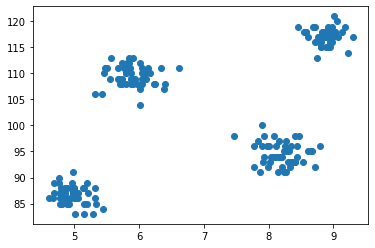

In [157]:
plt.scatter(df.cgpa,df.iq)

In [158]:
y=[]
for i in range(1,20):
    k=KMeans(n_clusters=i)
    k.fit_predict(df)
    y.append(k.inertia_)

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak o

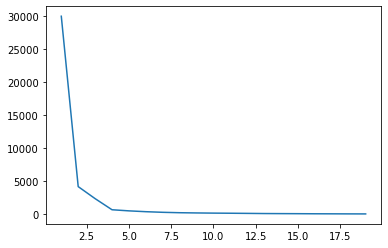

In [163]:
plt.plot(range(1,20),y)#so here aaround 4 curve is almost flat so that optimu val

In [164]:
km=KMeans(n_clusters=4)
km.fit_predict(df)

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 1, 0, 0, 1, 1, 0, 2, 1, 0, 3, 1, 0, 3, 1, 0, 1, 0, 1, 1, 0, 3,
       0, 3, 3, 0, 3, 2, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 3, 1, 3, 0, 0, 3,
       2, 2, 0, 1, 2, 1, 3, 3, 2, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 2, 3, 2,
       0, 3, 1, 0, 1, 2, 0, 3, 1, 2, 1, 2, 3, 0, 0, 2, 1, 3, 2, 3, 2, 1,
       2, 1, 2, 2, 0, 3, 0, 0, 2, 0, 3, 2, 1, 3, 3, 2, 3, 3, 0, 3, 2, 2,
       0, 2, 1, 1, 0, 2, 0, 1, 2, 3, 3, 1, 0, 2, 0, 3, 0, 1, 3, 0, 0, 1,
       3, 3, 1, 2, 1, 3, 0, 0, 0, 3, 1, 3, 3, 2, 3, 2, 1, 3, 2, 3, 2, 2,
       3, 0, 1, 2, 1, 0, 3, 2, 1, 0, 2, 3, 1, 3, 3, 2, 2, 1, 2, 3, 3, 0,
       2, 1, 3, 2, 2, 1, 1, 1, 0, 3, 0, 0, 2, 1, 0, 0, 3, 3, 0, 3, 2, 1,
       1, 2])

In [165]:
km=KMeans(n_clusters=4)
y=km.fit_predict(df)
df[y==0]

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


cgpa  iq
0    5.13  88
10   4.60  86
13   5.00  88
21   4.86  86
23   4.78  87
24   4.96  88
26   4.86  87
38   5.44  84
40   5.34  85
43   5.31  86
50   5.14  83
51   4.95  86
64   5.21  87
67   4.91  85
73   5.28  83
78   5.15  88
83   4.90  85
85   4.89  88
93   5.05  86
98   4.98  91
101  5.01  86
102  4.95  88
104  4.96  89
105  4.85  86
107  4.76  90
119  4.98  87
120  4.78  87
125  5.20  85
128  5.05  87
132  5.01  83
133  4.77  86
137  4.68  87
141  4.81  85
143  5.03  87
144  4.98  87
146  5.32  88
149  4.86  88
151  4.89  85
154  4.88  86
160  5.01  86
165  4.67  86
167  5.15  85
168  4.97  88
173  4.87  88
174  5.20  89
178  4.99  88
185  4.79  88
192  4.76  89
193  4.78  85
195  4.68  89

In [76]:
df[y==1]

cgpa  iq
0    5.13  88
10   4.60  86
13   5.00  88
21   4.86  86
23   4.78  87
24   4.96  88
26   4.86  87
38   5.44  84
40   5.34  85
43   5.31  86
50   5.14  83
51   4.95  86
64   5.21  87
67   4.91  85
73   5.28  83
78   5.15  88
83   4.90  85
85   4.89  88
93   5.05  86
98   4.98  91
101  5.01  86
102  4.95  88
104  4.96  89
105  4.85  86
107  4.76  90
119  4.98  87
120  4.78  87
125  5.20  85
128  5.05  87
132  5.01  83
133  4.77  86
137  4.68  87
141  4.81  85
143  5.03  87
144  4.98  87
146  5.32  88
149  4.86  88
151  4.89  85
154  4.88  86
160  5.01  86
165  4.67  86
167  5.15  85
168  4.97  88
173  4.87  88
174  5.20  89
178  4.99  88
185  4.79  88
192  4.76  89
193  4.78  85
195  4.68  89

In [166]:
df[y==0].iloc[:,0].values#cluster 0 1srt col or zeroth row i.e age

array([5.13, 4.6 , 5.  , 4.86, 4.78, 4.96, 4.86, 5.44, 5.34, 5.31, 5.14,
       4.95, 5.21, 4.91, 5.28, 5.15, 4.9 , 4.89, 5.05, 4.98, 5.01, 4.95,
       4.96, 4.85, 4.76, 4.98, 4.78, 5.2 , 5.05, 5.01, 4.77, 4.68, 4.81,
       5.03, 4.98, 5.32, 4.86, 4.89, 4.88, 5.01, 4.67, 5.15, 4.97, 4.87,
       5.2 , 4.99, 4.79, 4.76, 4.78, 4.68])

In [167]:
df[y==0].iloc[:,1].values#clust 0 ,2nd col

array([88, 86, 88, 86, 87, 88, 87, 84, 85, 86, 83, 86, 87, 85, 83, 88, 85,
       88, 86, 91, 86, 88, 89, 86, 90, 87, 87, 85, 87, 83, 86, 87, 85, 87,
       87, 88, 88, 85, 86, 86, 86, 85, 88, 88, 89, 88, 88, 89, 85, 89],
      dtype=int64)

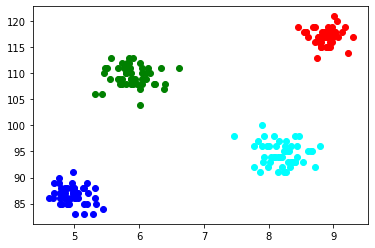

In [168]:
plt.scatter(df[y==0].iloc[:,0].values,df[y==0].iloc[:,1].values,color='blue')
plt.scatter(df[y==1].iloc[:,0].values,df[y==1].iloc[:,1].values,color='green')
plt.scatter(df[y==2].iloc[:,0].values,df[y==2].iloc[:,1].values,color='cyan')
plt.scatter(df[y==3].iloc[:,0].values,df[y==3].iloc[:,1].values,color='red')

In [170]:
#to view cetroid
km.cluster_centers_

array([[  4.9676,  86.7   ],
       [  5.8948, 109.52  ],
       [  8.1998,  94.6   ],
       [  8.8714, 117.16  ]])

In [172]:
km.cluster_centers_[1]

array([  5.8948, 109.52  ])

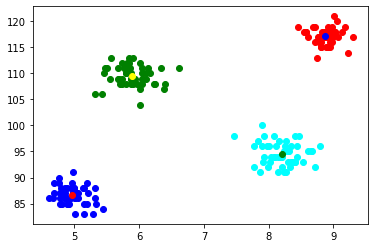

In [179]:
plt.scatter(df[y==0].iloc[:,0].values,df[y==0].iloc[:,1].values,color='blue')
plt.scatter(df[y==1].iloc[:,0].values,df[y==1].iloc[:,1].values,color='green')
plt.scatter(df[y==2].iloc[:,0].values,df[y==2].iloc[:,1].values,color='cyan')
plt.scatter(df[y==3].iloc[:,0].values,df[y==3].iloc[:,1].values,color='red')
plt.scatter(km.cluster_centers_[0][0],km.cluster_centers_[0][1],color='red')
plt.scatter(km.cluster_centers_[1][0],km.cluster_centers_[1][1],color='yellow')
plt.scatter(km.cluster_centers_[2][0],km.cluster_centers_[2][1],color='green')
plt.scatter(km.cluster_centers_[3][0],km.cluster_centers_[3][1],color='blue')
#plotting along with centroids

sepal_length  sepal_width    species
0             5.1          3.5     setosa
1             4.9          3.0     setosa
2             4.7          3.2     setosa
3             4.6          3.1     setosa
4             5.0          3.6     setosa
..            ...          ...        ...
145           6.7          3.0  virginica
146           6.3          2.5  virginica
147           6.5          3.0  virginica
148           6.2          3.4  virginica
149           5.9          3.0  virginica

[150 rows x 3 columns]

In [251]:
iris=sns.load_dataset('iris')
iris['sepal']=iris['sepal_length']+iris['sepal_width']
iris['petal']=iris['petal_length']+iris['petal_width']
iris.drop(columns=['sepal_length','sepal_width','petal_length','petal_width'],inplace=True)
iris=iris[iris.columns[::-1]]

petal  sepal    species
0      1.6    8.6     setosa
1      1.6    7.9     setosa
2      1.5    7.9     setosa
3      1.7    7.7     setosa
4      1.6    8.6     setosa
..     ...    ...        ...
145    7.5    9.7  virginica
146    6.9    8.8  virginica
147    7.2    9.5  virginica
148    7.7    9.6  virginica
149    6.9    8.9  virginica

[150 rows x 3 columns]

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL,

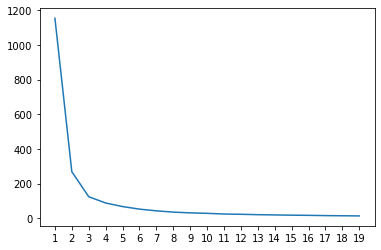

In [252]:
iris=sns.load_dataset('iris')
iris['sepal']=iris['sepal_length']+iris['sepal_width']
iris['petal']=iris['petal_length']+iris['petal_width']
iris.drop(columns=['sepal_length','sepal_width','petal_length','petal_width'],inplace=True)
iris=iris[iris.columns[::-1]]
le=LabelEncoder()
iris['species']=le.fit_transform(iris[['species']])
y=[]
for i in range(1,20):
    kr=KMeans(n_clusters=i)
    z=kr.fit_predict(iris)
    y.append(kr.inertia_)

plt.plot(np.arange(1,20,1),y)
plt.xticks(np.arange(1,20))
plt.show()

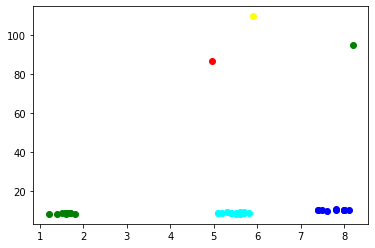

In [261]:
#see above n=3 is as expected
plt.scatter(iris[z==0].iloc[:,0].values,iris[z==0].iloc[:,1].values,color='blue')
plt.scatter(iris[z==1].iloc[:,0].values,iris[z==1].iloc[:,1].values,color='green')
plt.scatter(iris[z==2].iloc[:,0].values,iris[z==2].iloc[:,1].values,color='cyan')
plt.scatter(km.cluster_centers_[0][0],km.cluster_centers_[0][1],color='red')
plt.scatter(km.cluster_centers_[1][0],km.cluster_centers_[1][1],color='yellow')
plt.scatter(km.cluster_centers_[2][0],km.cluster_centers_[2][1],color='green')
plt.show()
#plotting along with centroids

In [199]:
sns.load_dataset('iris')

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

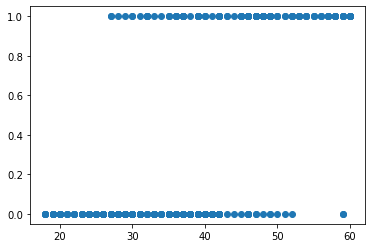

In [108]:
dd=pd.read_csv('Social_Network_Ads.csv').drop(columns=['User ID','Gender','EstimatedSalary'])
plt.scatter(dd.Age,dd.Purchased)

In [109]:
y=[]
for i in range(1,20):
    k=KMeans(n_clusters=i)
    k.fit_predict(dd)
    y.append(k.inertia_)

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak o

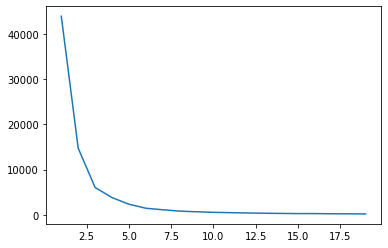

In [110]:
plt.plot(range(1,20),y)

In [131]:
km=KMeans(n_clusters=2)
y=km.fit_predict(dd)
y

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,

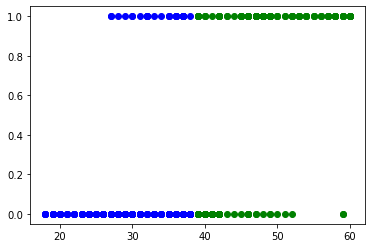

In [132]:
plt.scatter(dd[y==0].iloc[:,0].values,dd[y==0].iloc[:,1].values,color='blue')
plt.scatter(dd[y==1].iloc[:,0].values,dd[y==1].iloc[:,1].values,color='green')
#plt.scatter(dd[y==2].iloc[:,0].values,dd[y==2].iloc[:,1].values,color='cyan')
#plt.scatter(dd[y==3].iloc[:,0].values,dd[y==3].iloc[:,1].values,color='red')
#plt.scatter(dd[y==4].iloc[:,0].values,dd[y==4].iloc[:,1].values)

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (100,)  and requested shape (10,10)

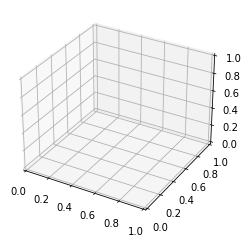

In [155]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection ='3d')
z = np.linspace(-3, 3, 100)
x=np.random.rand(10,10)
y=x**2
#sc=StandardScaler()
#x=sc.fit_transform(x)
#x=pd.DataFrame(x,columns=['Age','Salary'])
ax.plot3D(x, y, z, 'green')

In [150]:
x=pd.DataFrame(x,columns=['Age','Salary'])

Age    Salary
0   -1.144049 -1.153641
1   -0.668751  0.907168
2    0.849734 -0.741479
3    0.794180 -0.411750
4   -0.946522  0.659871
..        ...       ...
195 -1.421820 -1.071209
196  0.979361  1.319330
197 -0.699614  0.824736
198 -0.465051  0.495006
199  1.133679  1.236898

[200 rows x 2 columns]

In [406]:
np.random.rand(10,2)

array([[0.93347302, 0.51384991],
       [0.94392038, 0.17170197],
       [0.20094099, 0.95659217],
       [0.72156201, 0.36472967],
       [0.61634172, 0.5806154 ],
       [0.3626792 , 0.10402484],
       [0.07919533, 0.99189012],
       [0.80012818, 0.96056559],
       [0.04273978, 0.77250638],
       [0.69397846, 0.40716463]])

In [409]:
np.sign(-0.4),np.sign(0.4)

(-1.0, 1.0)

In [78]:
#lets check types of sampling above
from sklearn.datasets import make_classification#to make own classification dataset
x,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [83]:
df=pd.DataFrame(x,columns=['c1','c2','c3','c4','c5'])
df

c1        c2        c3        c4        c5
0  -1.649078 -0.572164 -1.746819  1.064985 -0.454864
1  -0.958222 -1.548911 -0.740159  1.498483 -0.701258
2   1.045403 -0.944144 -2.889790  0.809823 -0.404390
3   0.676704  0.142701 -1.240310 -0.038730 -0.779320
4   1.425636  1.894405 -0.817576 -0.186619  0.694753
..       ...       ...       ...       ...       ...
95 -1.359703 -1.090358 -1.285417  0.658341 -1.344957
96 -2.461299 -0.157767 -0.485643  1.606471 -2.667668
97 -0.514712 -0.805819 -0.933696  0.745617 -1.820317
98 -1.826849 -0.385909 -0.578184  1.428848 -2.405008
99  2.129979  3.370950  0.325875  0.344773  3.284742

[100 rows x 5 columns]

In [85]:
df['output']=y
df

c1        c2        c3        c4        c5  output
0  -1.649078 -0.572164 -1.746819  1.064985 -0.454864       1
1  -0.958222 -1.548911 -0.740159  1.498483 -0.701258       1
2   1.045403 -0.944144 -2.889790  0.809823 -0.404390       0
3   0.676704  0.142701 -1.240310 -0.038730 -0.779320       1
4   1.425636  1.894405 -0.817576 -0.186619  0.694753       0
..       ...       ...       ...       ...       ...     ...
95 -1.359703 -1.090358 -1.285417  0.658341 -1.344957       1
96 -2.461299 -0.157767 -0.485643  1.606471 -2.667668       1
97 -0.514712 -0.805819 -0.933696  0.745617 -1.820317       1
98 -1.826849 -0.385909 -0.578184  1.428848 -2.405008       1
99  2.129979  3.370950  0.325875  0.344773  3.284742       0

[100 rows x 6 columns]

In [106]:
#row sampling
def row_sample(dd,percent):
    per=percent*0.01
    return dd.sample(int(per*len(dd)),replace=True)

c=row_sample(df,20)#20 percent
c#see there are same records taken also #22

c1        c2        c3        c4        c5  output
95 -1.359703 -1.090358 -1.285417  0.658341 -1.344957       1
78  0.944048  2.595767  0.030281 -1.091828 -1.678547       0
70  1.760906  1.089225 -0.934275  0.726227  1.454036       0
74 -0.259680 -0.400849 -0.181752  1.298827 -2.410355       1
76 -0.360206  0.180921 -0.955901  1.047981 -2.003021       1
22  1.455687  0.223043 -1.582554  1.728452  2.212631       0
59  0.731766  0.395614 -1.615095  1.101247  0.853049       0
22  1.455687  0.223043 -1.582554  1.728452  2.212631       0
61 -1.769559 -0.303434 -0.612911  1.392517 -2.368129       1
16 -1.368811 -0.710138 -2.220613  0.780342 -3.411166       0
12 -1.715533 -1.341799 -1.537195  0.915857 -0.482648       1
52 -2.631513 -1.820012 -1.040039  1.733257 -0.879973       1
7   0.398372  0.973107 -0.671633  1.929571  1.243294       0
95 -1.359703 -1.090358 -1.285417  0.658341 -1.344957       1
43 -0.151896 -0.779003 -0.638788  0.899679 -1.153495       1
91  0.481738 -2.879716 -1.358694  0.836131  1.528455       1
13 -0.701246  0.376520 -1.209210  0.897196 -1.832589       1
96 -2.461299 -0.157767 -0.485643  1.606471 -2.667668       1
92 -4.458601 -1.392719 -1.169771  2.125171 -2.780029       1
90  1.280668 -0.228156 -1.618871  2.009945  2.173427       0

In [112]:
d1=row_sample(df,20)
d1.index

Int64Index([61, 28, 35, 52, 88, 64, 95, 52, 90, 27, 8, 62, 71, 41, 96, 82, 72,
            96, 78, 32],
           dtype='int64')

In [113]:
d2=row_sample(df,20)
d2.index

Int64Index([66, 36, 53, 49, 32, 73, 4, 22, 3, 43, 86, 97, 78, 12, 63, 79, 84,
            23, 95, 7],
           dtype='int64')

In [114]:
d3=row_sample(df,20)
d3.index#see all 3 diff data

Int64Index([6, 10, 32, 47, 29, 39, 89, 1, 80, 75, 17, 52, 11, 59, 24, 95, 89,
            93, 45, 89],
           dtype='int64')

In [128]:
m1=DecisionTreeClassifier()
m2=DecisionTreeClassifier()
m3=DecisionTreeClassifier()

In [130]:
m1.fit(d1.iloc[:,:5],d1.iloc[:,-1])
m2.fit(d2.iloc[:,:5],d2.iloc[:,-1])
m3.fit(d3.iloc[:,:5],d3.iloc[:,-1])

DecisionTreeClassifier()

In [131]:
df#lets predict 4th row i.e index row 3

c1        c2        c3        c4        c5  output
0  -1.649078 -0.572164 -1.746819  1.064985 -0.454864       1
1  -0.958222 -1.548911 -0.740159  1.498483 -0.701258       1
2   1.045403 -0.944144 -2.889790  0.809823 -0.404390       0
3   0.676704  0.142701 -1.240310 -0.038730 -0.779320       1
4   1.425636  1.894405 -0.817576 -0.186619  0.694753       0
..       ...       ...       ...       ...       ...     ...
95 -1.359703 -1.090358 -1.285417  0.658341 -1.344957       1
96 -2.461299 -0.157767 -0.485643  1.606471 -2.667668       1
97 -0.514712 -0.805819 -0.933696  0.745617 -1.820317       1
98 -1.826849 -0.385909 -0.578184  1.428848 -2.405008       1
99  2.129979  3.370950  0.325875  0.344773  3.284742       0

[100 rows x 6 columns]

In [134]:
m1.predict(np.array([[0.676704,0.142701,-1.240310,-0.038730,-0.779320]]))#m1 says it shud be 0

array([0])

In [135]:
m2.predict(np.array([[0.676704,0.142701,-1.240310,-0.038730,-0.779320]]))#m1 says it shud be 0

array([1])

In [136]:
m3.predict(np.array([[0.676704,0.142701,-1.240310,-0.038730,-0.779320]]))#m1 says it shud be 0

array([1])

In [ ]:
#so majority is 1 which is correct

In [ ]:
list(df.columns)[:-1]

In [192]:
#column sampling
def col_samp(df,percent):
    per=percent*0.01
    a=list(df.columns)[:-1]
    return random.sample(a,int(len(a)*per))
    
col_samp(df,40)

['c3', 'c2']

In [214]:
#column sampling
def col_samp(dd,percent):
    per=percent*0.01
    a=list(dd.columns)[:-1]
    newdd=dd[random.sample(a,int(len(a)*per))]
    newdd['output']=dd['output']
    return newdd
col_samp(df,40)

C:\Users\2112161\AppData\Local\Temp\4/ipykernel_19816/3468438265.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdd['output']=dd['output']


c2        c4  output
0  -0.572164  1.064985       1
1  -1.548911  1.498483       1
2  -0.944144  0.809823       0
3   0.142701 -0.038730       1
4   1.894405 -0.186619       0
..       ...       ...     ...
95 -1.090358  0.658341       1
96 -0.157767  1.606471       1
97 -0.805819  0.745617       1
98 -0.385909  1.428848       1
99  3.370950  0.344773       0

[100 rows x 3 columns]

In [228]:
d1=col_samp(df,40)
d2=col_samp(df,40)
d3=col_samp(df,40)

C:\Users\2112161\AppData\Local\Temp\4/ipykernel_19816/3468438265.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdd['output']=dd['output']


In [229]:
print(d1.columns)
print(d2.columns)
print(d3.columns)#all diff columns

Index(['c4', 'c5', 'output'], dtype='object')
Index(['c3', 'c5', 'output'], dtype='object')
Index(['c4', 'c2', 'output'], dtype='object')


In [230]:
m1=DecisionTreeClassifier()
m2=DecisionTreeClassifier()
m3=DecisionTreeClassifier()

In [232]:
m1.fit(d1.iloc[:,:2],d1.iloc[:,-1])
m2.fit(d2.iloc[:,:2],d2.iloc[:,-1])
m3.fit(d3.iloc[:,:2],d3.iloc[:,-1])

DecisionTreeClassifier()

In [235]:
d1

c4        c5  output
0   1.064985 -0.454864       1
1   1.498483 -0.701258       1
2   0.809823 -0.404390       0
3  -0.038730 -0.779320       1
4  -0.186619  0.694753       0
..       ...       ...     ...
95  0.658341 -1.344957       1
96  1.606471 -2.667668       1
97  0.745617 -1.820317       1
98  1.428848 -2.405008       1
99  0.344773  3.284742       0

[100 rows x 3 columns]

In [236]:
m1.predict(np.array([[1.064985,-0.454864	]]))#m1 says it shud be 1

array([1])

In [237]:
m2.predict(np.array([[1.064985,-0.454864	]]))#m1 says it shud be 0

array([0])

In [238]:
m3.predict(np.array([[1.064985,-0.454864	]]))#m1 says it shud be 1

array([1])

In [ ]:
#majority 1 so its acutally 1 so coorect

In [ ]:
#combined sampling

In [245]:
d1=col_samp(row_sample(df,30),60)
d2=col_samp(row_sample(df,30),60)
d3=col_samp(row_sample(df,30),60)

C:\Users\2112161\AppData\Local\Temp\4/ipykernel_19816/3468438265.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdd['output']=dd['output']


In [246]:
print(d1.index)
print(d2.index)
print(d3.index)
#diff rows

Int64Index([16, 70, 50,  3,  6, 49, 98, 25, 28,  2, 14, 25, 34, 10, 25, 44,  7,
            44, 42, 16, 37, 55, 84, 62, 89, 42,  9, 98, 16, 29],
           dtype='int64')
Int64Index([55,  3, 43, 34,  8, 86,  2, 84, 94, 23,  8, 33, 32, 90,  6, 26, 89,
            33, 64, 37, 40, 91, 29, 91, 61, 49, 50,  3, 30, 90],
           dtype='int64')
Int64Index([12, 40, 70, 56, 46, 45, 30, 61, 83,  7, 31, 47, 96,  8, 33, 53, 70,
            24,  9, 15, 99, 16, 30, 98, 34, 90, 28,  4, 55, 64],
           dtype='int64')


In [254]:
d2

c2        c4        c3  output
55  2.695570  0.650173  0.081355       0
3   0.142701 -0.038730 -1.240310       1
43 -0.779003  0.899679 -0.638788       1
34 -1.110369  1.142006 -1.237962       1
8   2.062040  0.601474  0.266928       0
86 -0.335023  2.633462 -2.706567       0
2  -0.944144  0.809823 -2.889790       0
84  1.815135 -0.661123 -0.844682       0
94 -1.411319  1.952456 -0.127452       1
23 -0.891026  1.026141 -0.064059       1
8   2.062040  0.601474  0.266928       0
33 -1.228058  0.625947 -2.063124       1
32 -1.394647  1.742927 -0.535219       1
90 -0.228156  2.009945 -1.618871       0
6   1.484063  0.587147 -0.675878       0
26 -1.951160  1.364739 -0.558211       0
89  0.407614  2.319796 -1.060565       0
33 -1.228058  0.625947 -2.063124       1
64 -3.042355  0.965049 -2.210504       1
37 -1.149650  1.075398 -0.615100       1
40  0.485556  1.362800 -1.597137       0
91 -2.879716  0.836131 -1.358694       1
29  0.152505  2.837155 -1.615740       0
91 -2.879716  0.836131 -1.358694       1
61 -0.303434  1.392517 -0.612911       1
49 -0.771670  0.778120 -1.398821       1
50  2.573077 -0.739571  0.450119       0
3   0.142701 -0.038730 -1.240310       1
30  0.090816 -0.227561 -2.162879       0
90 -0.228156  2.009945 -1.618871       0

In [280]:
m1.fit(d1.iloc[:,:-1],d1.drop(columns=d1.iloc[:,:-1].columns))
m2.fit(d2.iloc[:,:-1],d2.drop(columns=d2.iloc[:,:-1].columns))
m3.fit(d3.iloc[:,:-1],d3.drop(columns=d3.iloc[:,:-1].columns))

DecisionTreeClassifier()

In [281]:
m1.predict(np.array([[2.695570,0.650173,0.081355]]))#row number 55 from d2 for input

array([1])

In [283]:
m2.predict(np.array([[2.695570,0.650173,0.081355]]))

array([0])

In [282]:
m3.predict(np.array([[2.695570,0.650173,0.081355]]))#majority 0 so correct

array([0])

[Text(200.88000000000002, 181.2, 'X[2] <= 0.367\ngini = 0.498\nsamples = 30\nvalue = [16, 14]'),
 Text(133.92000000000002, 108.72, 'X[1] <= -1.507\ngini = 0.388\nsamples = 19\nvalue = [5, 14]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]')]

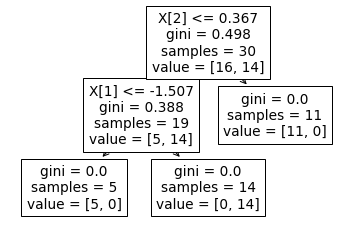

In [286]:
from sklearn.tree import plot_tree
plot_tree(m1)


[Text(167.40000000000003, 195.696, 'X[0] <= -0.553\ngini = 0.5\nsamples = 30\nvalue = [15, 15]'),
 Text(66.96000000000001, 152.208, 'X[2] <= -2.55\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(33.480000000000004, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(100.44000000000001, 108.72, 'X[1] <= 1.253\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(66.96000000000001, 65.232, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(133.92000000000002, 65.232, 'X[2] <= -0.547\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(100.44000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(167.40000000000003, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 152.208, 'X[0] <= 0.148\ngini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(234.36, 108.72, 'X[2] <= -1.43\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(200.88000000000002, 65.232, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(267.84000000000003, 65.232, 'gini =

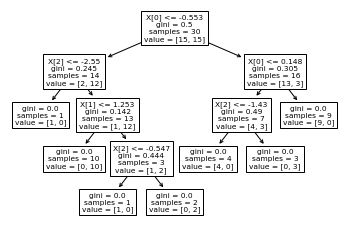

In [288]:
from sklearn.tree import plot_tree
plot_tree(m2)


[Text(239.14285714285714, 195.696, 'X[0] <= 0.087\ngini = 0.48\nsamples = 30\nvalue = [18, 12]'),
 Text(191.31428571428572, 152.208, 'X[1] <= 1.808\ngini = 0.375\nsamples = 16\nvalue = [4, 12]'),
 Text(143.4857142857143, 108.72, 'X[1] <= 0.848\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(95.65714285714286, 65.232, 'X[2] <= -1.742\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(47.82857142857143, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(143.4857142857143, 21.744, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(191.31428571428572, 65.232, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(239.14285714285714, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(286.9714285714286, 152.208, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]')]

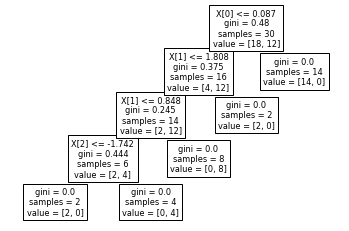

In [287]:
from sklearn.tree import plot_tree
plot_tree(m3)


In [ ]:
#this is the behind the scenes in ensemble learning or baggin or Behind scnes for random forest

In [2]:
sal=pd.read_csv('Salary_Data.csv')
x=sal.drop(columns='Salary')
y=sal.drop(columns=x.columns)

In [3]:
rfreg=RandomForestRegressor()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
rfreg.fit(xtrain,ytrain)
rfreg.predict(xtest)

C:\Users\2112161\AppData\Local\Temp\6/ipykernel_15528/2032970626.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(xtrain,ytrain)


array([ 44474.07      , 116459.28      ,  56653.23738095,  56575.35738095,
       112222.08      , 108137.66      ])

In [387]:
r2_score(rfreg.predict(xtest),ytest)#randomforest has best accuracy among all algos

0.9720138550740632

In [396]:
cross_val_score(rfreg,xtrain,ytrain,cv=10,scoring='r2')

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vec

array([  0.85108303,   0.93871452,   0.86662755,   0.94439719,
         0.74650111,  -0.23847447, -16.35188403,   0.97588039,
         0.97181714,   0.99205595])

In [397]:
cross_val_score(rfreg,x,y,cv=10,scoring='r2').mean()#doubt y this is showing -0.52

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vec

-0.41167909888257714

In [408]:
cross_val_score(rfreg,xtrain,ytrain,cv=10,scoring='r2').mean()#change to xtrain,ytrain u'll get the reult of 99%

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vec

-0.8944618075556179

SVM refer campusx 
it can be used for both classification and regression

In [445]:
dd=pd.read_csv('Social_Network_Ads.csv',usecols=['Gender', 'Age', 'EstimatedSalary', 'Purchased'])
x=dd.drop(columns=['Purchased'])
y=dd.drop(columns=x.columns)
ohe=OneHotEncoder(drop='first')
x['Gender']=ohe.fit_transform(x[['Gender']]).toarray()
x=x.drop(columns='Gender')
x

Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]

In [446]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
sv=SVC()
sv.fit(xtrain,ytrain)
sv.predict(xtest)

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [441]:
accuracy_score(sv.predict(xtest),ytest)

0.825

In [121]:
#meshgrid
a,b=np.meshgrid([1,2,3],[4,5,6,7])#first arg is col and 2nd is row
a#x coordates 

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [122]:
b#y coord

array([[4, 4, 4],
       [5, 5, 5],
       [6, 6, 6],
       [7, 7, 7]])

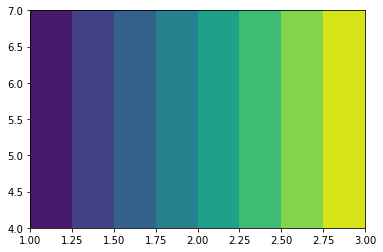

In [19]:
plt.contourf(a,b,a)#3rd arg is color so based on it has 

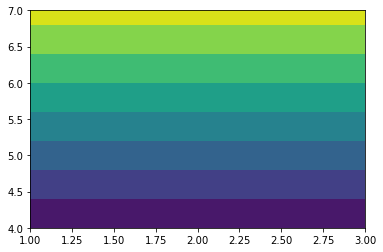

In [20]:
plt.contourf(a,b,b)#since b is y cord so vertical contours

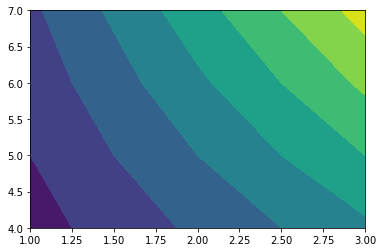

In [22]:
plt.contourf(a,b,a*b)

In [447]:
x

Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]

In [448]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [449]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
sv.fit(xtrain,ytrain)

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
#trying to create a meshgrid

In [450]:
xtrain[:,0].min(),xtrain[:,0].max()

(-1.8773105578331641, 2.134240875847471)

In [123]:
a=np.arange(xtrain[:,0].min()-1,xtrain[:,0].max()+1,step=0.1)
a.shape

(61,)

In [124]:
b=np.arange(xtrain[:,1].min()-1,xtrain[:,1].max()+1,step=0.1)
b.shape

(60,)

In [102]:
#means we'll create a meshgrid (using above arrays) which will be of dim 61*60

(-1.6075056615492507, 2.3567499772898386)

In [125]:
xx,yy=np.meshgrid(a,b)
yy.shape

(60, 61)

In [122]:
60*61#so total we have 3660 points each point has age and sal

3660

In [123]:
#now we need to classifcation all these point whethere they are place or not
xx[0][0]#age of 1st point or (student)

-2.877310557833164

In [145]:
temp=pd.concat([pd.DataFrame(x),pd.DataFrame(sv.predict(x))],axis=1)
temp.columns=['age','sal','prediction']
temp

age       sal  prediction
0   -1.781797 -1.490046           0
1   -0.253587 -1.460681           0
2   -1.113206 -0.785290           0
3   -1.017692 -0.374182           0
4   -1.781797  0.183751           0
..        ...       ...         ...
395  0.797057 -0.844019           1
396  1.274623 -1.372587           1
397  1.179110 -1.460681           1
398 -0.158074 -1.078938           0
399  1.083596 -0.990844           1

[400 rows x 3 columns]

In [451]:
sv.predict(np.array([[-1.781797,-1.490046]]))

array([0], dtype=int64)

In [151]:
accuracy_score(sv.predict(xtest),ytest)#95%with svm after scaling

0.95

In [165]:
x1=np.array([[1,2,3],[4,5,6]])
x2=np.array([[1,2,3],[4,5,6]])
np.array([x1.ravel()])#ravel fun converts 2d array to 1d

array([[1, 2, 3, 4, 5, 6]])

In [166]:
x1=np.array([[1,2,3],[4,5,6]])
x2=np.array([[1,2,3],[4,5,6]])
np.array([x1.ravel(),x2.ravel()])#note dim is 2*6(3*2 which s dim each array)

array([[1, 2, 3, 4, 5, 6],
       [1, 2, 3, 4, 5, 6]])

In [170]:
x1.ravel()

array([1, 2, 3, 4, 5, 6])

In [173]:
np.array([xx.ravel(),yy.ravel()]).shape#3660 is same as 60*61

(2, 3660)

In [ ]:
#botu input to array shud be in from (z,2) i.e z rows and 2 cols so transpose


In [452]:
np.array([xx.ravel(),yy.ravel()]).T.shape

(3660, 2)

In [126]:
inp=np.array([xx.ravel(),yy.ravel()]).T


In [182]:
out=sv.predict(inp)#hence created class for the output values
out.shape

(3660,)

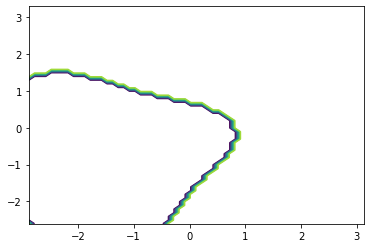

In [183]:
plt.contour(xx,yy,out.reshape(xx.shape))#all 3 arg must be same shape so out.reshape done

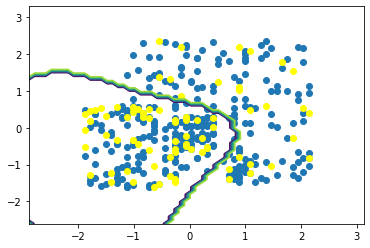

In [189]:
plt.contour(xx,yy,out.reshape(xx.shape))
plt.scatter(xtrain[:,0],xtrain[:,1],label='train points')
plt.scatter(xtest[:,0],xtest[:,1],color='yellow',label='test points')

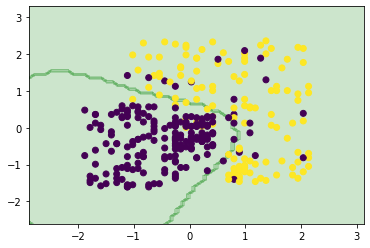

In [252]:
plt.contourf(xx,yy,out.reshape(xx.shape),colors='green',alpha=0.2)#decision boundary alphe for transparency of booundary
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain.values,label='train points')
#this shows actually boundary and how they are classified

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


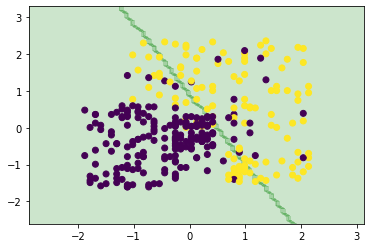

In [248]:
log=LogisticRegression()
log.fit(xtrain,ytrain)
out2=log.predict(inp)
plt.contourf(xx,yy,out2.reshape(xx.shape),colors='green',alpha=0.2)
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain.values,label='train points')#log reg curve not that great u can see accraucy
#also u can see many misclassifed point in log reg as compared to above


In [254]:
accuracy_score(log.predict(xtest),ytest)#lower than svm

0.925

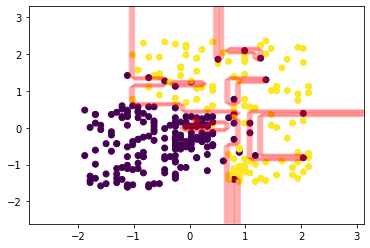

In [268]:
#decision tree
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
dto=dt.predict(inp)
plt.contour(xx,yy,dto.reshape(xx.shape),colors='red',alpha=0.2)
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain.values,label='train points')#lower acc as u can see poor classification

In [271]:
accuracy_score(dt.predict(xtest),ytest)

0.9

C:\Users\2112161\AppData\Local\Temp\6/ipykernel_15028/2834409026.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rt.fit(xtrain,ytrain)


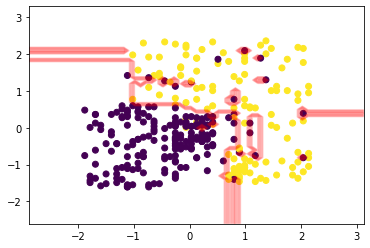

In [272]:
#randomforest
rt=RandomForestClassifier()
rt.fit(xtrain,ytrain)
rto=rt.predict(inp)
plt.contour(xx,yy,rto.reshape(xx.shape),colors='red',alpha=0.2)
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain.values,label='train points')

In [273]:
accuracy_score(rt.predict(xtest),ytest)#little btr close to svm as we can see little btr classfication

0.9375

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


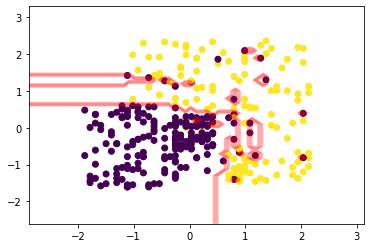

In [291]:
#adaboost
ad=AdaBoostClassifier(rt)
ad.fit(xtrain,ytrain)
ado=ad.predict(inp)
plt.contour(xx,yy,ado.reshape(xx.shape),colors='red',alpha=0.2)
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain.values,label='train points')

In [292]:
accuracy_score(ad.predict(xtest),ytest)#got same as svm 

0.95

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


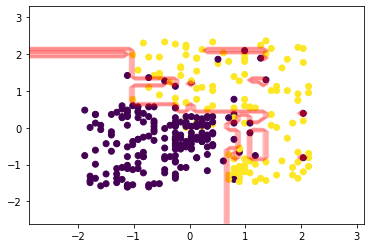

In [456]:
#GRADIENT BOOST
gb=GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
gbc=gb.predict(inp)
plt.contour(xx,yy,gbc.reshape(xx.shape),colors='red',alpha=0.2)
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain.values,label='train points')

In [457]:
accuracy_score(gb.predict(xtest),ytest)#got same as svm 

0.925

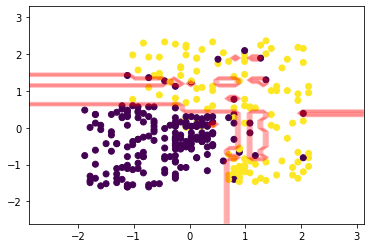

In [127]:
#X GboostBOOST
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
xgbc=xgb.predict(inp)
plt.contour(xx,yy,xgbc.reshape(xx.shape),colors='red',alpha=0.2)
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain.values,label='train points')

In [95]:
#plot decision regions
dd=pd.read_csv('Social_Network_Ads.csv',usecols=['Age','EstimatedSalary','Purchased'])
x=dd.drop(columns='Purchased')
y=dd.drop(columns=x.columns)
sc=StandardScaler()
x=sc.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
#xtesc=sc.fit(xtest)
#xtrsc=sc.fit_transform(xtrain)
dt=DecisionTreeClassifier()
#dt.fit(xtrain,ytrain)
adb=AdaBoostClassifier(dt)
adb.fit(xtrain,ytrain)
accuracy_score(adb.predict(xtest),ytest)
#accuracy_score(dt.predict(xtest),ytest)



C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.875

<AxesSubplot:>

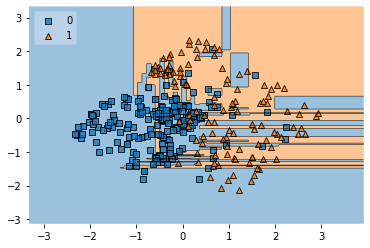

In [45]:
#plotting decision boudary
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xtraintransformed = pca.fit_transform(xtrain)
plot_decision_regions(xtraintransformed, ytrain.values.ravel(), clf=adb, legend=2)

In [36]:
pca.explained_variance_ratio_

array([0.58028607, 0.41971393])

In [48]:
#plot decision regions
dd=pd.read_csv('Social_Network_Ads.csv',usecols=['Age','EstimatedSalary','Purchased'])
x=dd.drop(columns='Purchased')
y=dd.drop(columns=x.columns)
sc=StandardScaler()
x=sc.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
#xtesc=sc.fit(xtest)
#xtrsc=sc.fit_transform(xtrain)
rf=RandomForestClassifier()
#dt.fit(xtrain,ytrain)
adb1=AdaBoostClassifier(rf)
adb1.fit(xtrain,ytrain)
accuracy_score(adb1.predict(xtest),ytest)
#accuracy_score(dt.predict(xtest),ytest)


C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.925

<AxesSubplot:>

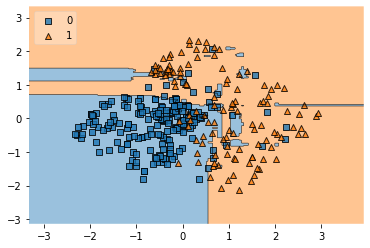

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xtraintransformed = pca.fit_transform(xtrain)
plot_decision_regions(xtraintransformed, ytrain.values.ravel(), clf=adb1, legend=2)

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.925


<AxesSubplot:>

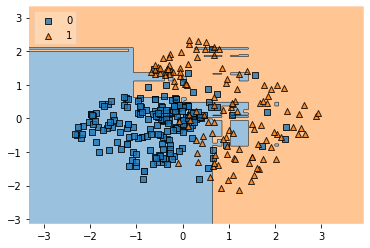

In [126]:
#plot decision regions
dd=pd.read_csv('Social_Network_Ads.csv',usecols=['Age','EstimatedSalary','Purchased'])
x=dd.drop(columns='Purchased')
y=dd.drop(columns=x.columns)
sc=StandardScaler()
x=sc.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
#xtesc=sc.fit(xtest)
#xtrsc=sc.fit_transform(xtrain)
rf=RandomForestClassifier()
#dt.fit(xtrain,ytrain)
gb1=GradientBoostingClassifier()
gb1.fit(xtrain,ytrain)
print(accuracy_score(gb1.predict(xtest),ytest))
#accuracy_score(dt.predict(xtest),ytest)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xtraintransformed = pca.fit_transform(xtrain)
plot_decision_regions(xtraintransformed, ytrain.values.ravel(), clf=gb1, legend=2)

In [65]:
gb1.feature_importances_/len(dd) * 100

array([0.12367635, 0.12632365])

0.925


<AxesSubplot:>

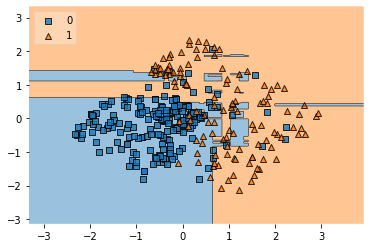

In [128]:
#xgboost
dd=pd.read_csv('Social_Network_Ads.csv',usecols=['Age','EstimatedSalary','Purchased'])
x=dd.drop(columns='Purchased')
y=dd.drop(columns=x.columns)
sc=StandardScaler()
x=sc.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
xgb1=XGBClassifier()
xgb1.fit(xtrain,ytrain)
print(accuracy_score(gb1.predict(xtest),ytest))
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xtraintransformed = pca.fit_transform(xtrain)
plot_decision_regions(xtraintransformed, ytrain.values.ravel(), clf=xgb1, legend=2)

In [138]:
#to plot above tree
#from xgboost import plot_tree
#plot_tree(xgb1,rankdir='LR',num_trees=0) gettubg errir dont know why

<BarContainer object of 2 artists>

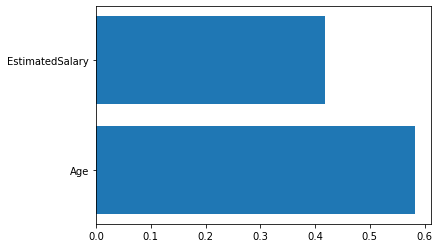

In [163]:
plt.barh(dd.columns[:-1],xgb1.feature_importances_)

In [164]:
xgb1.feature_importances_

array([0.5820495, 0.4179505], dtype=float32)

[Text(0.45089285714285715, 0.9666666666666667, 'age <= 0.654\ngini = 0.47\nsamples = 320\nvalue = [199, 121]\nclass = 0'),
 Text(0.23809523809523808, 0.9, 'salary <= 0.61\ngini = 0.311\nsamples = 228\nvalue = [184, 44]\nclass = 0'),
 Text(0.16666666666666666, 0.8333333333333334, 'age <= -0.11\ngini = 0.082\nsamples = 186\nvalue = [178, 8]\nclass = 0'),
 Text(0.14285714285714285, 0.7666666666666667, 'gini = 0.0\nsamples = 120\nvalue = [120, 0]\nclass = 0'),
 Text(0.19047619047619047, 0.7666666666666667, 'salary <= 0.404\ngini = 0.213\nsamples = 66\nvalue = [58, 8]\nclass = 0'),
 Text(0.16666666666666666, 0.7, 'salary <= -0.066\ngini = 0.17\nsamples = 64\nvalue = [58, 6]\nclass = 0'),
 Text(0.14285714285714285, 0.6333333333333333, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]\nclass = 0'),
 Text(0.19047619047619047, 0.6333333333333333, 'salary <= 0.022\ngini = 0.312\nsamples = 31\nvalue = [25, 6]\nclass = 0'),
 Text(0.16666666666666666, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = 

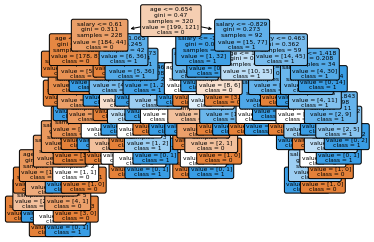

In [119]:
from sklearn import tree
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
tree.plot_tree(dt,filled=True,rounded=True,feature_names=['age','salary'],class_names=['0','1'],fontsize=6)

C:\Users\2112161\AppData\Local\Temp\7/ipykernel_17076/119751491.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(xtrain,ytrain)


<BarContainer object of 4 artists>

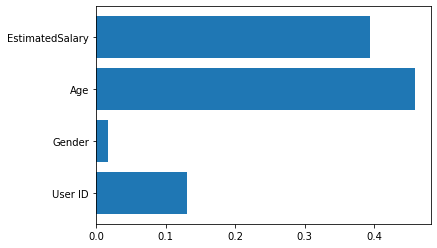

In [82]:
data=pd.read_csv('Social_Network_Ads.csv')
x=data.drop(columns='Purchased')
ohe=OneHotEncoder(drop='first')
x['Gender']=ohe.fit_transform(x[['Gender']]).toarray()
y=data.drop(columns=x.columns)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
rf1=RandomForestClassifier()
rf1.fit(xtrain,ytrain)
rf1.feature_importances_
plt.barh(x.columns,rf1.feature_importances_)#tells how imp is the feature

In [167]:
data=pd.read_csv('Social_Network_Ads.csv',usecols=['Age','EstimatedSalary','Purchased'])
x=data.drop(columns='Purchased')
#ohe=OneHotEncoder(drop='first')
y=data.drop(columns=x.columns)
sc=StandardScaler()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
xtrainsc=sc.fit_transform(xtrain)
xtestsc=sc.transform(xtest)
xgb2=XGBClassifier()
xgb2.fit(xtrainsc,ytrain)
accuracy_score(xgb2.predict(xtestsc),ytest)
#this is how to do scaling correctly first split then tranform

0.9125

In [168]:
dfr=pd.read_csv('Social_Network_Ads.csv').drop(columns='User ID')
ohe=OneHotEncoder(drop='first')
sc=StandardScaler()
x=dfr.drop(columns='Purchased')
y=dfr.drop(columns=x.columns)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
xtrainnew=xtrain.copy()
xtestnew=xtest.copy()
xtrainnew['Gender']=ohe.fit_transform(xtrainnew[['Gender']]).toarray().astype('int')
xtestnew['Gender']=ohe.transform(xtestnew[['Gender']]).toarray().astype('int')
xtrainnew['Age']=sc.fit_transform(xtrainnew[['Age']])
xtestnew['Age']=sc.fit_transform(xtestnew[['Age']])
xtrainnew['EstimatedSalary']=sc.fit_transform(xtrainnew[['EstimatedSalary']])
xtestnew['EstimatedSalary']=sc.fit_transform(xtestnew[['EstimatedSalary']])
xgb2=XGBClassifier()
xgb2.fit(xtrainsc,ytrain)
accuracy_score(xgb2.predict(xtestsc),ytest)

0.9125

In [171]:
#using column transformer
dfr=pd.read_csv('Social_Network_Ads.csv').drop(columns='User ID')
ohe=OneHotEncoder(drop='first')
sc=StandardScaler()
x=dfr.drop(columns='Purchased')
y=dfr.drop(columns=x.columns)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
xtrainnew=xtrain.copy()
xtestnew=xtest.copy()
transformer = ColumnTransformer(transformers=[
    ('f1',StandardScaler(),['Age','EstimatedSalary']),
    ('f2',OneHotEncoder(sparse=False,drop='first'),['Gender'])
],remainder='passthrough')

In [172]:
pd.DataFrame(transformer.fit_transform(xtrainnew),columns=['Age','EstimatedSalary','Gender'],index=xtrain.index)

Age  EstimatedSalary  Gender
336  1.922950         2.146016     1.0
64   2.020161         0.378719     0.0
55  -1.382215        -0.432499     0.0
106 -1.187794        -1.011940     0.0
300  1.922950        -0.925024     0.0
..        ...              ...     ...
323  0.950843        -1.156800     0.0
192 -0.896162        -0.780164     1.0
117 -0.215686        -0.519415     1.0
47  -1.090583        -0.461471     0.0
172 -1.187794         1.392742     0.0

[320 rows x 3 columns]

In [78]:
xtrain

Gender  Age  EstimatedSalary
336    Male   58           144000
64   Female   59            83000
55   Female   24            55000
106  Female   26            35000
300  Female   58            38000
..      ...  ...              ...
323  Female   48            30000
192    Male   29            43000
117    Male   36            52000
47   Female   27            54000
172  Female   26           118000

[320 rows x 3 columns]

In [173]:
pd.DataFrame(transformer.transform(xtestnew),columns=['Age','EstimatedSalary','Gender'],index=xtestnew.index)

Age  EstimatedSalary  Gender
132 -0.798951         0.494608     1.0
309 -0.021265        -0.577359     0.0
341 -0.312897         0.146943     1.0
196 -0.798951         0.262831     0.0
246 -0.312897        -0.577359     0.0
..        ...              ...     ...
14  -1.965480         0.349747     1.0
363  0.367578         0.262831     0.0
304  0.173157        -0.287638     0.0
361  1.436896        -1.040912     0.0
329  0.853632         1.074049     0.0

[80 rows x 3 columns]

In [88]:
xtest

Gender  Age  EstimatedSalary
132    Male   30            87000
309  Female   38            50000
341    Male   35            75000
196  Female   30            79000
246  Female   35            50000
..      ...  ...              ...
14     Male   18            82000
363  Female   42            79000
304  Female   40            60000
361  Female   53            34000
329  Female   47           107000

[80 rows x 3 columns]

In [174]:
xtestnew=pd.DataFrame(transformer.transform(xtestnew),columns=['Age','EstimatedSalary','Gender'],index=xtestnew.index)
xtrainnew=pd.DataFrame(transformer.fit_transform(xtrainnew),columns=['Age','EstimatedSalary','Gender'],index=xtrainnew.index)


In [175]:
xgb=XGBRFClassifier()
xgb.fit(xtrainnew,ytrain)
accuracy_score(xgb.predict(xtestnew),ytest)

0.95

ValueError: x and y must be the same size

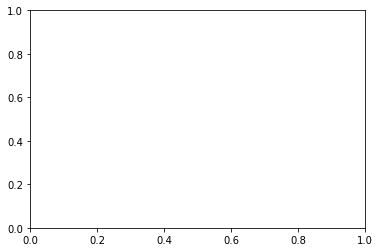

In [176]:
plt.scatter(xtestnew,ytest)

#we cant plot this in plt.plot cuz this is multilinear reg so  need to used 3d model as the model is plane  which can be see nin 3d only refer below it must be there

In [93]:
titan=pd.read_csv('tested.csv')
titan.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [94]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [97]:
sal=pd.read_csv('Salary_Data.csv')
x=sal[['YearsExperience']]
y=sal[['Salary']]
xsc=sc.fit_transform(x)

In [98]:
xtrain,xtest,ytrain,ytest=train_test_split(xsc,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.predict(xtest)

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [99]:
r2_score(lr.predict(xtest),ytest)

0.986482673117654

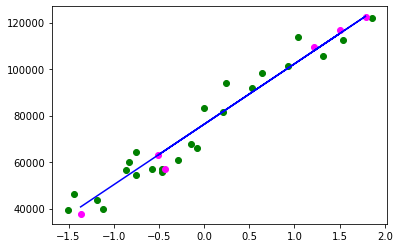

In [100]:
plt.scatter(xtrain,ytrain,color='green')
plt.scatter(xtest,ytest,color='magenta')
plt.plot(xtest,lr.predict(xtest),color='blue')
#x.index.values

array([[ 1.5363355 ],
       [-0.47069688],
       [-0.00477865],
       [ 0.92705781],
       [-0.86493538],
       [-0.07645838],
       [-0.75741579],
       [-0.29149756],
       [ 1.03457741],
       [ 0.53281931],
       [-1.43837321],
       [ 1.85889428],
       [-0.82909552],
       [-1.11581443],
       [ 0.21026054],
       [ 0.2461004 ],
       [-0.57821647],
       [-0.75741579],
       [ 1.32129632],
       [-1.18749416],
       [-1.51005294],
       [ 0.6403389 ],
       [-0.1481381 ],
       [-0.47069688]])

In [390]:
svl=SVR()
svl.fit(xtrain,ytrain)
svl.predict(xtest)

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([65232.99939874, 65244.74865927, 65236.15535271, 65235.29365035,
       65246.0272739 , 65247.07520779])

In [391]:
r2_score(svl.predict(xtest),ytest)

-44950319.99039295

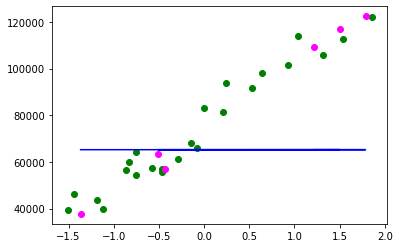

In [393]:
plt.scatter(xtrain,ytrain,color='green')
plt.scatter(xtest,ytest,color='magenta')
plt.plot(xtest,svl.predict(xtest),color='blue')#svm is poor for liniear data see r2 score is very poort

C:\Users\2112161\AppData\Local\Temp\6/ipykernel_15028/895834744.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfl.fit(xtrain,ytrain)


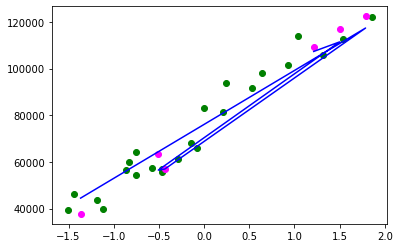

0.972070652320941


In [395]:
rfl=RandomForestRegressor()
rfl.fit(xtrain,ytrain)
plt.scatter(xtrain,ytrain,color='green')
plt.scatter(xtest,ytest,color='magenta')
plt.plot(xtest,rfl.predict(xtest),color='blue')
plt.show()
print(r2_score(rfl.predict(xtest),ytest))#high acc

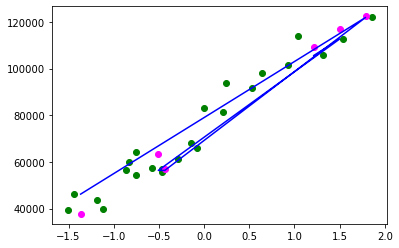

0.9730199429445994


In [397]:
dtl=DecisionTreeRegressor()
dtl.fit(xtrain,ytrain)
plt.scatter(xtrain,ytrain,color='green')
plt.scatter(xtest,ytest,color='magenta')
plt.plot(xtest,dtl.predict(xtest),color='blue')
plt.show()
print(r2_score(dtl.predict(xtest),ytest))#high acc

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


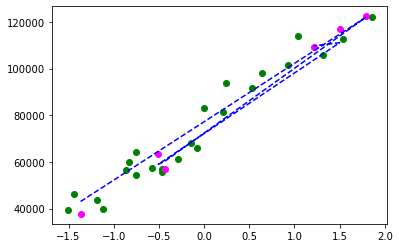

0.9839175841216908


In [399]:
adr=AdaBoostRegressor()
adr.fit(xtrain,ytrain)
plt.scatter(xtrain,ytrain,color='green')
plt.scatter(xtest,ytest,color='magenta')
plt.plot(xtest,adr.predict(xtest),color='blue',ls='dashed')
plt.show()
print(r2_score(adr.predict(xtest),ytest))#even high acc

#generally cv=10 is taken and grid is used for small dataset as its time taking but random is fast as it takes any random parameters from parameters given hence used ofr larget data sets but grid cv i s always best cuz it works on all combos
jus time taking

In [ ]:
#for cv=10

In [212]:
#another alogo is randomsearchCV
dtl3=DecisionTreeRegressor()
rcv=RandomizedSearchCV(dtl3,param_distributions=parameter,cv=10,scoring='r2')
rcv.fit(xtrain,ytrain)

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 351, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'splitter': ['best', 'random']},
                   scoring='r2')

In [213]:
rcv.best_params_

{'splitter': 'best',
 'max_features': 'sqrt',
 'max_depth': 15,
 'criterion': 'poisson'}

In [214]:
rcv.best_score_

-3.6124504085005227

In [215]:
r2_score(rcv.predict(xtest),ytest)#little increase compaare to grid cv so gridcv btr as data set is small

0.8138322128618347

In [219]:
rcv.cv_results_['mean_test_score']

array([         nan,  -3.61245041,  -8.25491131,          nan,
       -26.93955779,          nan,  -3.67221539,  -3.62146207,
        -3.62201647,  -5.97874894])

In [242]:
#tried to check if all values in training set are taken as 0 actually this data set is 65-35 split not big imbalance
dd=pd.read_csv('Social_Network_Ads.csv')
x=dd.drop(columns='Purchased')
y=dd.drop(columns=x.columns)
z=[]
for i in range(10000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=i)
    a=((ytrain.value_counts()[0])/400) *100
    z.append(a)
    

In [245]:
np.max(z)#max the 0's were there was 55%

55.50000000000001

import graphviz 
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

#simply trying play tennis decision tree

In [72]:
pt=pd.read_csv('PlayTennis.csv')
pt

outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no

In [160]:
x=pt.drop(columns='play')
y=pt[['play']]
ohe=OneHotEncoder(drop='first')
ynew=ohe.fit_transform(y)

xnew=x.copy()
ynew=ynew.toarray()
ynew

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]])

In [161]:
le=LabelEncoder()
xnew['outlook']=le.fit_transform(xnew['outlook'])
xnew['temp']=le.fit_transform(xnew['humidity'])
xnew['humidity']=le.fit_transform(xnew['humidity'])
xnew['windy']=le.fit_transform(xnew['windy'])
xnew

outlook  temp  humidity  windy
0         2     0         0      0
1         2     0         0      1
2         0     0         0      0
3         1     0         0      0
4         1     1         1      0
5         1     1         1      1
6         0     1         1      1
7         2     0         0      0
8         2     1         1      0
9         1     1         1      0
10        2     1         1      1
11        0     0         0      1
12        0     1         1      0
13        1     0         0      1

In [162]:

xtrain,xtest,ytrain,ytest=train_test_split(xnew,ynew,train_size=0.8,random_state=0)

In [163]:
ytest

array([[1.],
       [1.],
       [1.]])

In [165]:
dt3=DecisionTreeClassifier(max_depth=5,criterion='gini')
dt3.fit(xtrain,ytrain)
yt=dt3.predict(xtest)
print('accuracy is',accuracy_score(yt,ytest))#100% accuracy cuz data is not complex try with 70 30 split

accuracy is 1.0


In [170]:

xtrain,xtest,ytrain,ytest=train_test_split(xnew,ynew,train_size=0.8,random_state=0)
dt4=DecisionTreeClassifier(max_depth=5,criterion='entropy')
dt4.fit(xtrain,ytrain)
yt=dt4.predict(xtest)
print('accuracy is',accuracy_score(yt,ytest))#same

accuracy is 1.0


[Text(620.0, 2446.2, 'outlook <= 0.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]\nclass = 1'),
 Text(465.0, 1902.6, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = 1'),
 Text(775.0, 1902.6, 'humidity <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]\nclass = 0'),
 Text(465.0, 1359.0, 'outlook <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = 0'),
 Text(310.0, 815.3999999999999, 'windy <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(155.0, 271.7999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(465.0, 271.7999999999997, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(620.0, 815.3999999999999, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0'),
 Text(1085.0, 1359.0, 'outlook <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = 1'),
 Text(930.0, 815.3999999999999, 'windy <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(775.0, 271.7999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1

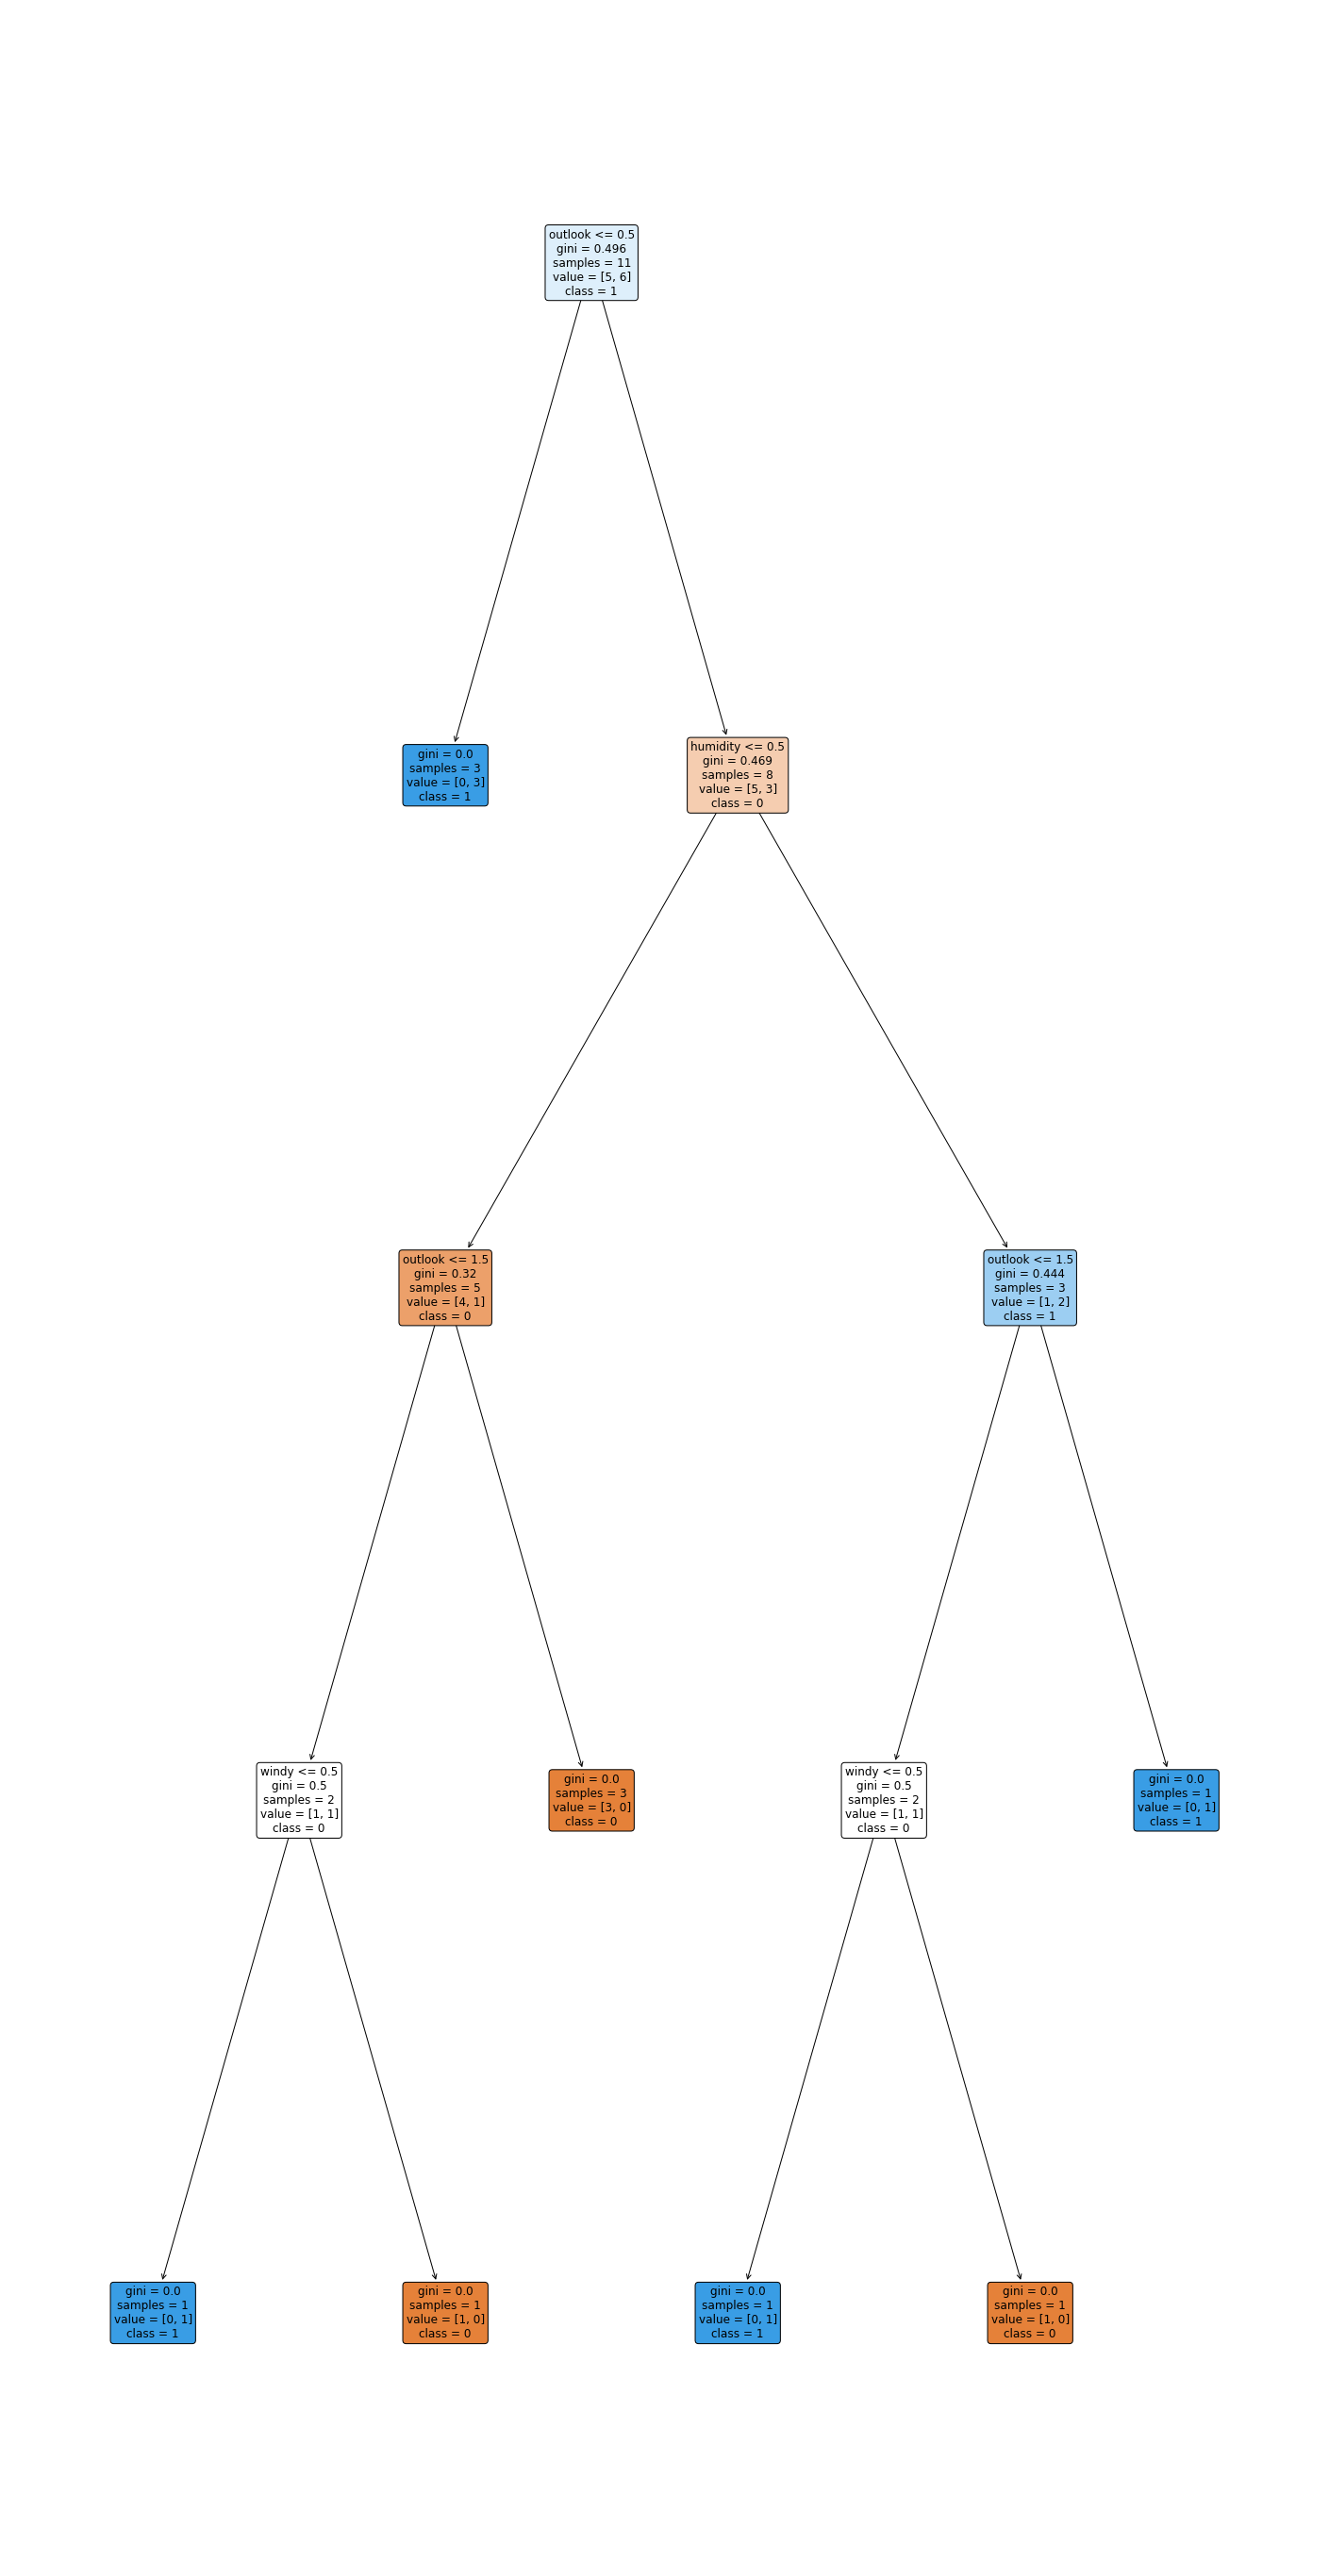

In [168]:
fig = plt.figure(figsize=(25,50))
from sklearn import tree
tree.plot_tree(dt3,filled=True,rounded=True,feature_names=xtrain.columns,class_names=['0','1'],fontsize=12)


In [5]:
from sklearn import datasets
datasets.load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [33]:
np.array(x.columns)

array(['Gender', 'Age', 'EstimatedSalary'], dtype=object)

In [ ]:
 feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True

336    1
64     0
55     0
106    0
300    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 320, dtype: int64

In [51]:
#to vary the threshold val
yprn=log.predict_proba(xtest)#this prob of 0or 1 for that particualr xtest
yprn#note here shape is 80,2 means 1st col has 0.82 and 2nd col 1st val is 0.17

array([[0.59313589, 0.40686411],
       [0.55177568, 0.44822432],
       [0.51584749, 0.48415251],
       [0.53867388, 0.46132612],
       [0.52463993, 0.47536007],
       [0.58118126, 0.41881874],
       [0.54217368, 0.45782632],
       [0.55351757, 0.44648243],
       [0.56567172, 0.43432828],
       [0.54654255, 0.45345745],
       [0.54566932, 0.45433068],
       [0.6282937 , 0.3717063 ],
       [0.5699942 , 0.4300058 ],
       [0.53341712, 0.46658288],
       [0.5699942 , 0.4300058 ],
       [0.56567172, 0.43432828],
       [0.55264679, 0.44735321],
       [0.60160874, 0.39839126],
       [0.56913054, 0.43086946],
       [0.6274706 , 0.3725294 ],
       [0.52288249, 0.47711751],
       [0.56480601, 0.43519399],
       [0.53779832, 0.46220168],
       [0.57602764, 0.42397236],
       [0.6282937 , 0.3717063 ],
       [0.5699942 , 0.4300058 ],
       [0.55612794, 0.44387206],
       [0.62417085, 0.37582915],
       [0.59822659, 0.40177341],
       [0.53779832, 0.46220168],
       [0.

In [53]:
th=0.4#changing threshold 
yprn=log.predict_proba(xtest)[:,1]
yprn#only second row val

array([0.40686411, 0.44822432, 0.48415251, 0.46132612, 0.47536007,
       0.41881874, 0.45782632, 0.44648243, 0.43432828, 0.45345745,
       0.45433068, 0.3717063 , 0.4300058 , 0.46658288, 0.4300058 ,
       0.43432828, 0.44735321, 0.39839126, 0.43086946, 0.3725294 ,
       0.47711751, 0.43519399, 0.46220168, 0.42397236, 0.3717063 ,
       0.4300058 , 0.44387206, 0.37582915, 0.40177341, 0.46220168,
       0.47009158, 0.47536007, 0.37335324, 0.48591236, 0.39081724,
       0.47711751, 0.39165628, 0.39839126, 0.45171187, 0.43432828,
       0.45433068, 0.43432828, 0.43346296, 0.48063405, 0.4377935 ,
       0.48679241, 0.40941706, 0.45345745, 0.38496229, 0.43692661,
       0.3967038 , 0.47009158, 0.43606011, 0.45258452, 0.48327274,
       0.48503239, 0.39417721, 0.4377935 , 0.47711751, 0.37582915,
       0.38080038, 0.47975472, 0.38412854, 0.44996748, 0.43173355,
       0.43259805, 0.48063405, 0.43952841, 0.42311224, 0.44648243,
       0.38830402, 0.44822432, 0.43086946, 0.38329547, 0.42741

In [54]:
yprn>=th


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True, False,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True])

In [55]:
yprn=yprn>th
yprn=yprn.astype('int')#to convert into 0 and 1
yprn

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [57]:
#now check accuracy
from sklearn.metrics import accuracy_score
r2=accuracy_score(ytest,yprn)
r2#accuracy went down also note r2 score is not alone for measuring accuracy of model ,we also use other ways see lect

0.1875

In [ ]:
#knn

In [27]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(xtrain,ytrain)
ykp=kn.predict(xtest)
ykp

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
r2k=accuracy_score(ytest,ykp)
r2k#so knn gave higher accuracy copared to log reg

0.8

In [2]:
#accuracy went down also note r2 score is not alone for measuring accuracy of logistic reg model ,we also use other ways see lect

decision tree
https://www.youtube.com/watch?v=ynTCUngbFHA
it create mutliple decision boudaries based on feature selection..feature selection is based on max info gain
whethere split will ocure whether is based on purity(pre or impure split) or gini coeff
both formulas are in video

overfitting and under fiitin https://www.youtube.com/watch?v=m5E6QxKFYlM

In [71]:
a=np.arange(1,20)
a=a.tolist()
a

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [76]:
a.append(-20)
a

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 80,
 90,
 -10,
 -20]

C:\Users\2112161\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

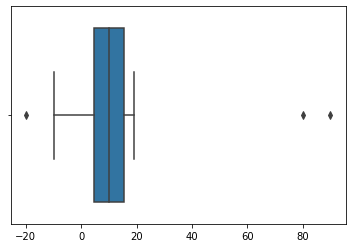

In [77]:
sb.boxplot(a)

In [9]:
x=[23,82]
print((''.join(list(map(str,x)))))

2382


In [10]:
''.join(list(map(str,x)))

'2382'

In [11]:
print('amb')

amb


In [13]:
list(map(str,x))

['23', '82']

In [14]:
7/3

2.3333333333333335

In [15]:
11/3

3.6666666666666665

In [27]:
a=np.array([[1,0,2],[3,0,4],[5,0,6]])
print(np.mean(a,axis=0))
print(np.mean(a,axis=1))
a

[3. 0. 4.]
[1.         2.33333333 3.66666667]


array([[1, 0, 2],
       [3, 0, 4],
       [5, 0, 6]])

In [19]:
t=[(2,1),(1,1),(2,4),(2,6),(7,5),(6,4)]
result={}
for i,j in t:
    result.setdefault(j,[]).append(i)
print(result)

{1: [2, 1], 4: [2, 6], 6: [2], 5: [7]}


In [20]:
print result

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(result)? (12/ipykernel_8340/2834153870.py, line 1)

In [22]:
t [0]

(2, 1)

In [23]:
a=b=7

In [24]:
A=np.array([[1,2,3],[4,5,6],[7,8,9]])
B=np.array([[9,8,7],[6,5,4],[3,2,1]])
M=A>=B
print(M*A)

[[0 0 0]
 [0 5 6]
 [7 8 9]]


In [ ]:
A=np.array([[1,2,3],[4,5,6],[7,8,9]])
B=np.array([[9,8,7],[6,5,4],[3,2,1]])
M=A>=B
print(M)
A
print(B)

In [263]:
t=pd.read_csv('train.csv')
t.Transported.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [426]:
t.isnull().mean()*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [316]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


AttributeError: 'NoneType' object has no attribute 'to_frame'

In [309]:
t.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

<AxesSubplot:>

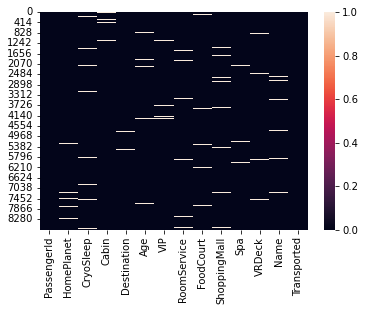

In [289]:
sns.heatmap(t.isnull())

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [3]:
df=pd.read_csv('Salary_Data.csv')
df

YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

In [18]:
df.isnull().sum()
x=df[['YearsExperience']]
y=df[['Salary']]
xtest,xtrain,ytest,ytrain=train_test_split(x,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(xtrain,ytrain)
r2_score(lr.predict(xtest),ytest)

0.9346872682042473

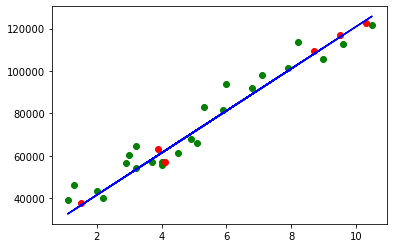

In [29]:
plt.scatter(xtest,ytest,color='green')
plt.scatter(xtrain,ytrain,color='red')
#plt.scatter(xtest,lr.predict(xtest))
plt.plot(xtest,lr.predict(xtest),color='blue')

In [6]:
df.isnull().sum()
x=df[['YearsExperience']]
y=df[['Salary']]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
xgr=XGBRegressor()
xgr.fit(xtrain,ytrain)
r2_score(xgr.predict(xtest),ytest)

0.9730217385998133

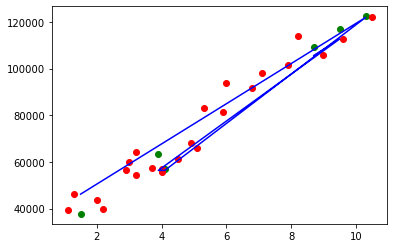

In [7]:
plt.scatter(xtest,ytest,color='green')
plt.scatter(xtrain,ytrain,color='red')
#plt.scatter(xtest,lr.predict(xtest))
plt.plot(xtest,xgr.predict(xtest),color='blue')